## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_Chroma_STFT.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 100)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [8]:
import gc
gc.collect()

0

In [9]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [10]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [11]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [12]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [13]:
# grid_search.fit(X,y)

In [14]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [8]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [9]:
times_svm

[1040.884355545044,
 1040.4541726112366,
 1033.888027191162,
 1037.2078800201416,
 1028.5246341228485,
 1045.5557870864868,
 1055.0352334976196,
 1034.5208880901337,
 1039.2979571819305,
 1027.8962516784668]

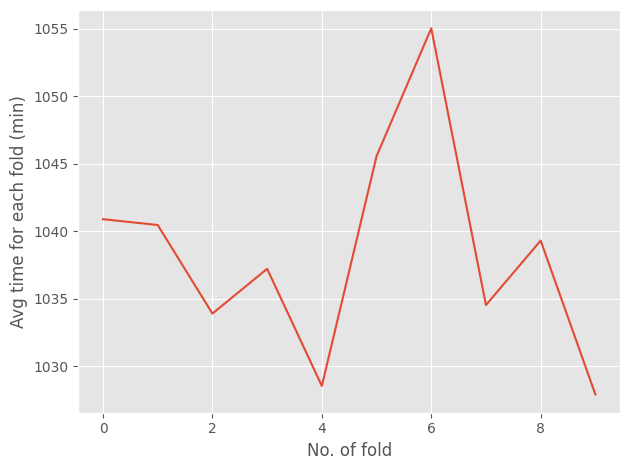

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [11]:
np.array(y_test_all).shape

(10, 302)

In [12]:
np.array(scores_svm).shape

(10, 302)

In [13]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [14]:
acc_scores_svm

[0.5099337748344371,
 0.4735099337748344,
 0.45695364238410596,
 0.4900662251655629,
 0.5364238410596026,
 0.4867549668874172,
 0.5165562913907285,
 0.49337748344370863,
 0.5231788079470199,
 0.4966887417218543]

In [15]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

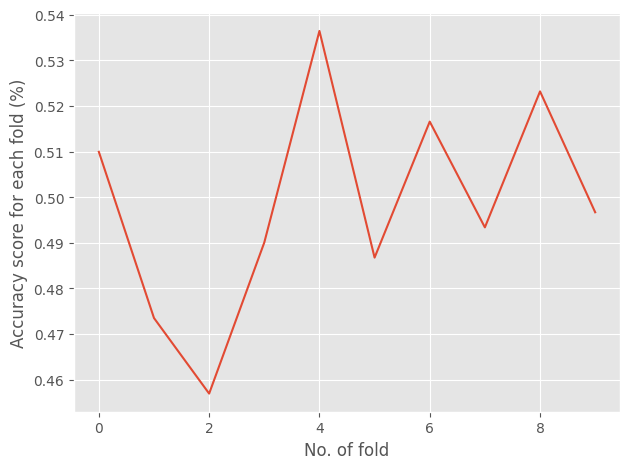

In [16]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [17]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.83%


In [19]:
import gc
gc.collect()

6928

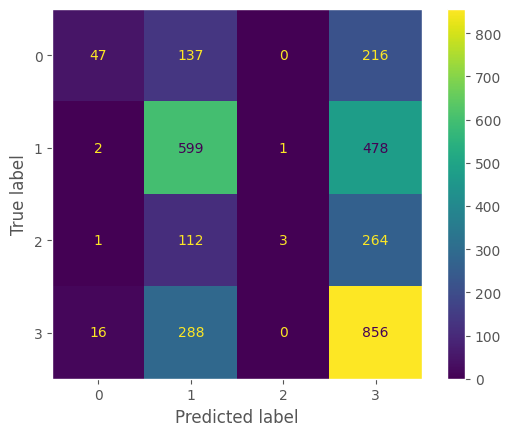

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [21]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.71      0.12      0.20       400
           1       0.53      0.55      0.54      1080
           2       0.75      0.01      0.02       380
           3       0.47      0.74      0.58      1160

    accuracy                           0.50      3020
   macro avg       0.62      0.35      0.33      3020
weighted avg       0.56      0.50      0.44      3020



## Decision Tree

In [22]:
import gc
gc.collect()

15

In [23]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [24]:
times_dtc

[42.09665012359619,
 46.059321880340576,
 51.10816168785095,
 44.34266972541809,
 47.90919852256775,
 48.89934229850769,
 44.280421018600464,
 46.383546590805054,
 52.659754276275635,
 48.24959206581116]

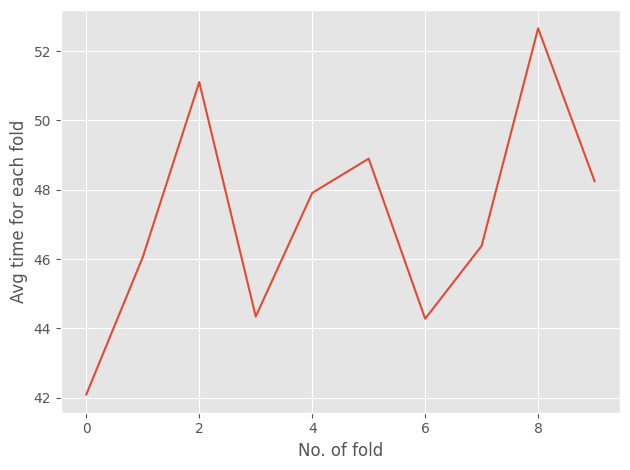

In [25]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [26]:
np.array(y_test_all).shape

(10, 302)

In [27]:
np.array(scores_dtc).shape

(10, 302)

In [28]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [29]:
acc_scores_dtc

[0.34105960264900664,
 0.3973509933774834,
 0.3344370860927152,
 0.32450331125827814,
 0.3675496688741722,
 0.3543046357615894,
 0.37748344370860926,
 0.36423841059602646,
 0.347682119205298,
 0.3741721854304636]

In [30]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

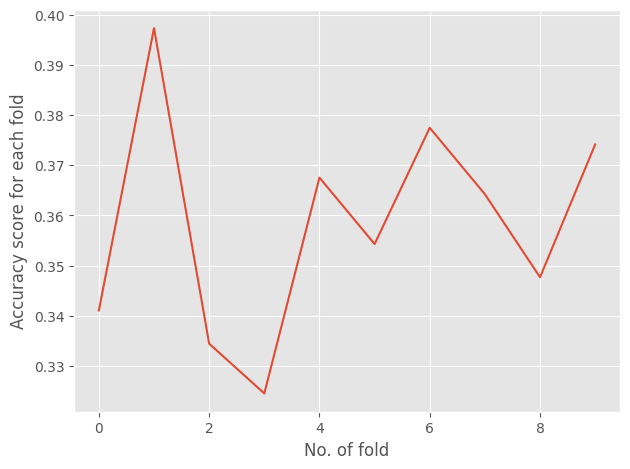

In [31]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [32]:
import gc
gc.collect()

3554

In [33]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.83%


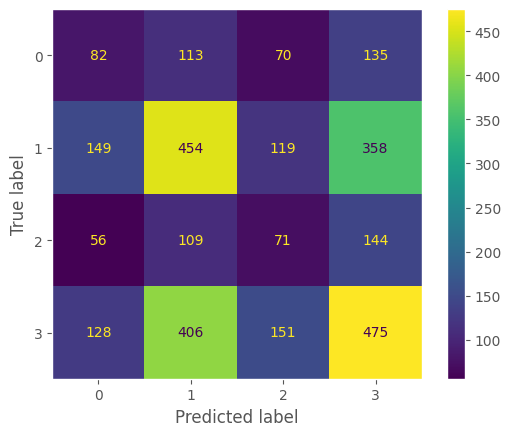

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [36]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.20      0.20      0.20       400
           1       0.42      0.42      0.42      1080
           2       0.17      0.19      0.18       380
           3       0.43      0.41      0.42      1160

    accuracy                           0.36      3020
   macro avg       0.30      0.31      0.30      3020
weighted avg       0.36      0.36      0.36      3020



In [37]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [38]:
# parameters

In [39]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [40]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [41]:
# grid_search_dtc.fit(X_train,y_train)

In [42]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [43]:
import gc
gc.collect()

6435

In [44]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [ ]:
times_rdf

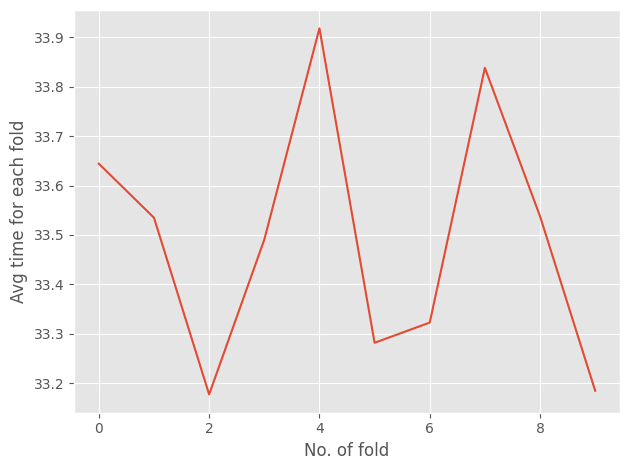

In [45]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [46]:
import gc
gc.collect()

3574

In [47]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [48]:
acc_scores_rdf

[0.45364238410596025,
 0.4470198675496689,
 0.423841059602649,
 0.4337748344370861,
 0.4602649006622517,
 0.46357615894039733,
 0.4900662251655629,
 0.4602649006622517,
 0.4503311258278146,
 0.45364238410596025]

In [49]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

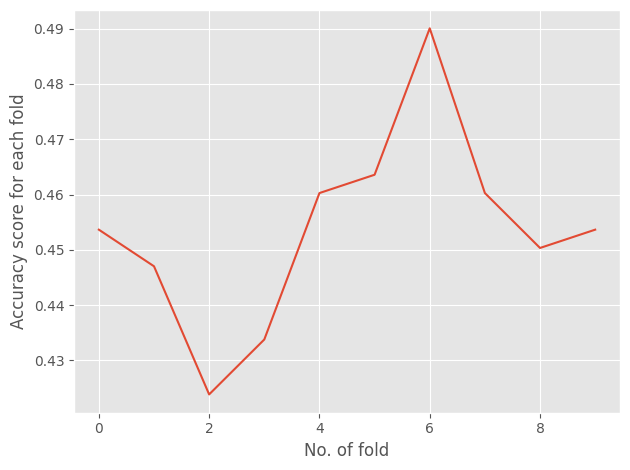

In [50]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [51]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.36%


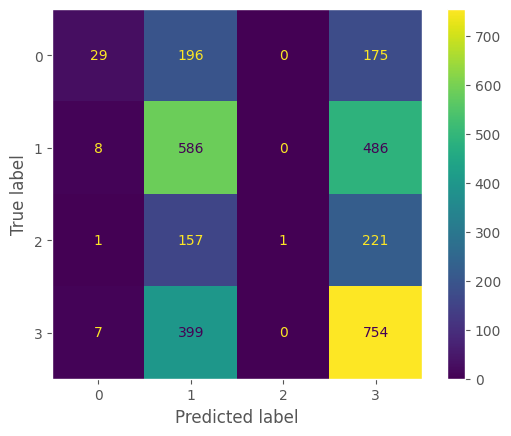

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [54]:
import gc
gc.collect()

6456

In [55]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.64      0.07      0.13       400
           1       0.44      0.54      0.48      1080
           2       1.00      0.00      0.01       380
           3       0.46      0.65      0.54      1160

    accuracy                           0.45      3020
   macro avg       0.64      0.32      0.29      3020
weighted avg       0.54      0.45      0.40      3020



In [56]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [57]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [58]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [59]:
# grid_search.fit(X_train,y_train)

In [60]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [61]:
import gc
gc.collect()

0

In [62]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [ ]:
times_knn

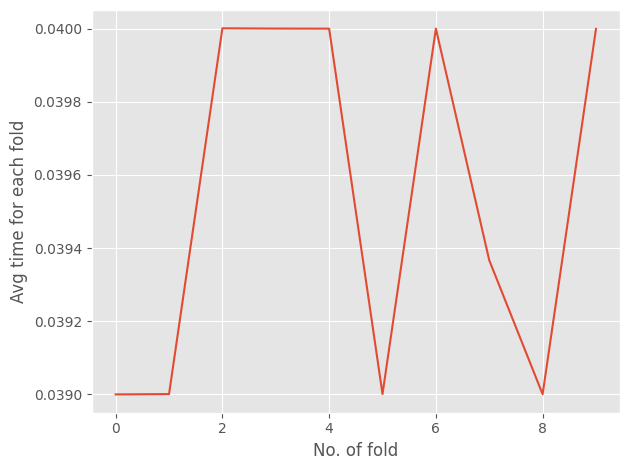

In [63]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [64]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [65]:
acc_scores_knn

[0.5033112582781457,
 0.4900662251655629,
 0.5231788079470199,
 0.5,
 0.4867549668874172,
 0.5033112582781457,
 0.48013245033112584,
 0.4966887417218543,
 0.47019867549668876,
 0.5066225165562914]

In [66]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

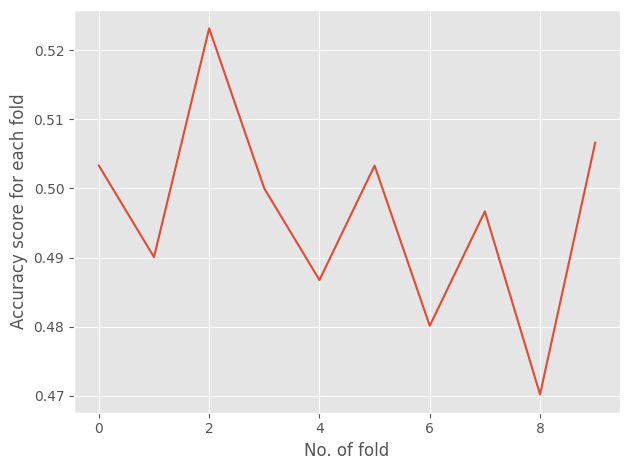

In [67]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [68]:
import gc
gc.collect()

3314

In [69]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [70]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.60%


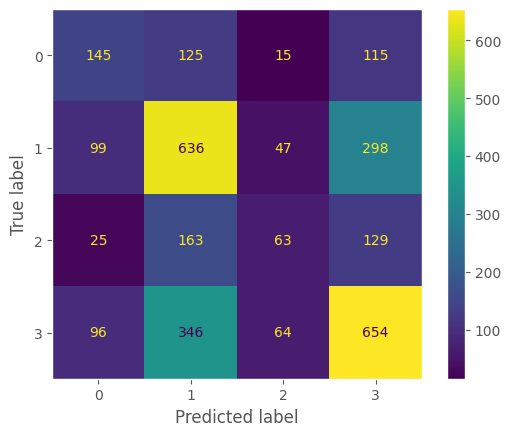

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [72]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.40      0.36      0.38       400
           1       0.50      0.59      0.54      1080
           2       0.33      0.17      0.22       380
           3       0.55      0.56      0.56      1160

    accuracy                           0.50      3020
   macro avg       0.44      0.42      0.42      3020
weighted avg       0.48      0.50      0.48      3020



In [73]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [74]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [75]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [76]:
# grid_search_knn.fit(X_train,y_train)

In [77]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [78]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [79]:
import gc
gc.collect()

6332

In [80]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [ ]:
times_nb

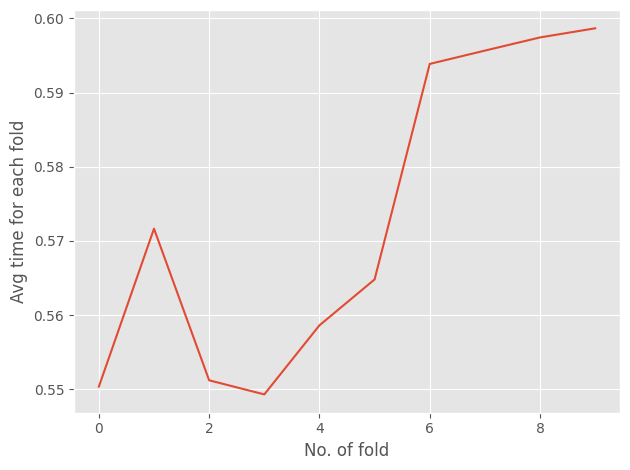

In [81]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [82]:
import gc
gc.collect()

3346

In [83]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [84]:
acc_scores_nb

[0.40397350993377484,
 0.3708609271523179,
 0.39072847682119205,
 0.41721854304635764,
 0.3741721854304636,
 0.3675496688741722,
 0.45364238410596025,
 0.3741721854304636,
 0.39072847682119205,
 0.39072847682119205]

In [85]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

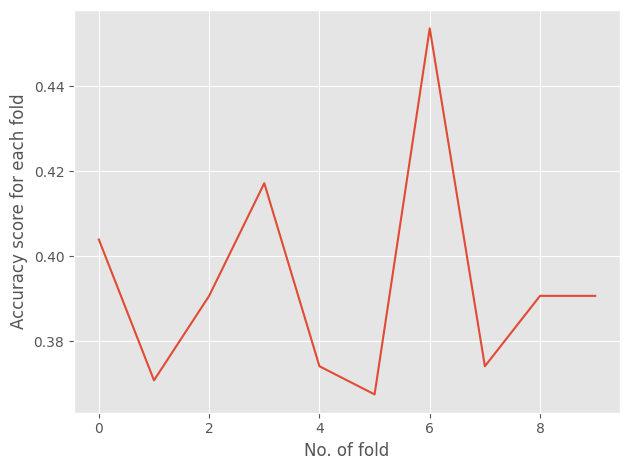

In [86]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [87]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [88]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.34%


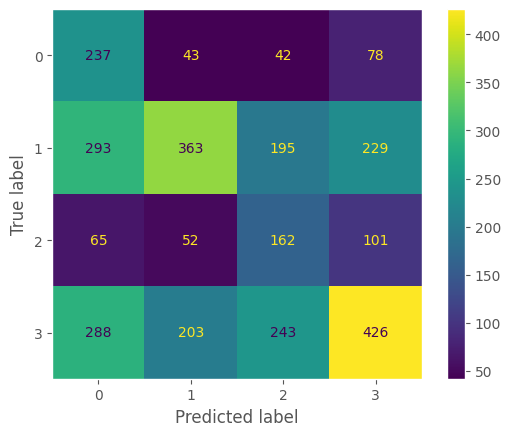

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [90]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.27      0.59      0.37       400
           1       0.55      0.34      0.42      1080
           2       0.25      0.43      0.32       380
           3       0.51      0.37      0.43      1160

    accuracy                           0.39      3020
   macro avg       0.40      0.43      0.38      3020
weighted avg       0.46      0.39      0.40      3020



In [91]:
import gc
gc.collect()

6245

In [92]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [93]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [94]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [95]:
# grid_search_nb.fit(X_train,y_train)

In [96]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [97]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [98]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [8]:
import gc
gc.collect()

0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [10]:
X,y = load_data(DATA_PATH)

Data succesfully loaded!


In [11]:
X.shape

(3020, 259, 100)

In [12]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [13]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [11]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [12]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 62ms/step - loss: 0.8511 - accuracy: 0.2596 - val_loss: 0.8467 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 0.8455 - accuracy: 0.2641 - val_loss: 0.8425 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8428 - accuracy: 0.2641 - val_loss: 0.8394 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8399 - accuracy: 0.2531 - val_loss: 0.8371 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8375 - accuracy: 0.2694 - val_loss: 0.8348 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8358 - accuracy: 0.2841 - val_loss: 0.8327 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 29/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8262 - accuracy: 0.2441 - val_loss: 0.8242 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 30/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8261 - accuracy: 0.2478 - val_loss: 0.8241 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 31/100
76/77 [============================>.] - ETA: 0s - loss: 0.8260 - accuracy: 0.2475
Epoch 31: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 31: 4.25 seconds
77/77 [==============================] - 4s 55ms/step - loss: 0.8259 - accuracy: 0.2478 - val_loss: 0.8239 - val_accuracy: 0.2757 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8260 - accuracy: 0.2580 - val_loss: 0.8240 - val_accuracy: 0.2757 - lr: 3.2000e-07
Epoch 33/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8263 - accuracy: 0.2531 - val_loss: 0.8234 - val_accuracy: 0.2757 - lr: 3.2000e-07
Ep

Epoch 57/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8261 - accuracy: 0.2531 - val_loss: 0.8239 - val_accuracy: 0.2721 - lr: 1.0240e-10
Epoch 58/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8259 - accuracy: 0.2490 - val_loss: 0.8236 - val_accuracy: 0.2757 - lr: 1.0240e-10
Epoch 59/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8261 - accuracy: 0.2596 - val_loss: 0.8242 - val_accuracy: 0.2757 - lr: 1.0240e-10
Epoch 60/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8261 - accuracy: 0.2445 - val_loss: 0.8234 - val_accuracy: 0.2757 - lr: 1.0240e-10
Epoch 61/100
76/77 [============================>.] - ETA: 0s - loss: 0.8260 - accuracy: 0.2467
Epoch 61: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 61: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8262 - accuracy: 0.2465 - val_loss: 0.8239 - val_accuracy: 0.2721 - lr: 1.0240e-10
E

Epoch 85/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8262 - accuracy: 0.2502 - val_loss: 0.8234 - val_accuracy: 0.2757 - lr: 3.2768e-14
Epoch 86/100
76/77 [============================>.] - ETA: 0s - loss: 0.8256 - accuracy: 0.2484
Epoch 86: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 86: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8256 - accuracy: 0.2494 - val_loss: 0.8240 - val_accuracy: 0.2757 - lr: 3.2768e-14
Epoch 87/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8261 - accuracy: 0.2555 - val_loss: 0.8240 - val_accuracy: 0.2757 - lr: 6.5536e-15
Epoch 88/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8259 - accuracy: 0.2461 - val_loss: 0.8234 - val_accuracy: 0.2757 - lr: 6.5536e-15
Epoch 89/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8262 - accuracy: 0.2502 - val_loss: 0.8238 - val_accuracy: 0.2721 - lr: 6.5536e-15
Ep

Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8343 - accuracy: 0.2535 - val_loss: 0.8413 - val_accuracy: 0.2684 - lr: 4.0000e-05
Epoch 13/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8344 - accuracy: 0.2625 - val_loss: 0.8409 - val_accuracy: 0.2721 - lr: 4.0000e-05
Epoch 14/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8340 - accuracy: 0.2621 - val_loss: 0.8411 - val_accuracy: 0.2684 - lr: 4.0000e-05
Epoch 15/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8343 - accuracy: 0.2678 - val_loss: 0.8397 - val_accuracy: 0.2647 - lr: 4.0000e-05
Epoch 16/100
76/77 [============================>.] - ETA: 0s - loss: 0.8341 - accuracy: 0.2714
Epoch 16: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 16: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8342 - accuracy: 0.2715 - val_loss: 0.8405 - val_accuracy: 0.2684 - lr: 4.0000e-05
Ep

Epoch 40/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8337 - accuracy: 0.2649 - val_loss: 0.8409 - val_accuracy: 0.2684 - lr: 1.2800e-08
Epoch 41/100
76/77 [============================>.] - ETA: 0s - loss: 0.8340 - accuracy: 0.2689
Epoch 41: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 41: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8340 - accuracy: 0.2698 - val_loss: 0.8408 - val_accuracy: 0.2684 - lr: 1.2800e-08
Epoch 42/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8342 - accuracy: 0.2608 - val_loss: 0.8412 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 43/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8342 - accuracy: 0.2559 - val_loss: 0.8408 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 44/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8338 - accuracy: 0.2625 - val_loss: 0.8413 - val_accuracy: 0.2684 - lr: 2.5600e-09
E

Epoch 68/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8338 - accuracy: 0.2690 - val_loss: 0.8400 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 69/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8340 - accuracy: 0.2559 - val_loss: 0.8410 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 70/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8342 - accuracy: 0.2756 - val_loss: 0.8403 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 0.8342 - accuracy: 0.2685
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 71: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8343 - accuracy: 0.2682 - val_loss: 0.8404 - val_accuracy: 0.2684 - lr: 8.1920e-13
Epoch 72/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8341 - accuracy: 0.2645 - val_loss: 0.8398 - val_accuracy: 0.2721 - lr: 1.6384e-13
E

Epoch 96/100
76/77 [============================>.] - ETA: 0s - loss: 0.8340 - accuracy: 0.2623
Epoch 96: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 96: 4.28 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8342 - accuracy: 0.2625 - val_loss: 0.8406 - val_accuracy: 0.2684 - lr: 2.6214e-16
Epoch 97/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8342 - accuracy: 0.2706 - val_loss: 0.8407 - val_accuracy: 0.2684 - lr: 5.2429e-17
Epoch 98/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8340 - accuracy: 0.2657 - val_loss: 0.8406 - val_accuracy: 0.2684 - lr: 5.2429e-17
Epoch 99/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8344 - accuracy: 0.2731 - val_loss: 0.8399 - val_accuracy: 0.2684 - lr: 5.2429e-17
Epoch 100/100
10/10 [==============================] - 0s 11ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 57ms/step - 

Epoch 23/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8273 - accuracy: 0.1643 - val_loss: 0.8312 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 24/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8274 - accuracy: 0.1631 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 25/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8273 - accuracy: 0.1607 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 26/100
76/77 [============================>.] - ETA: 0s - loss: 0.8272 - accuracy: 0.1641
Epoch 26: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 26: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8270 - accuracy: 0.1639 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 27/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8272 - accuracy: 0.1619 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 3.2000e-07
Ep

Epoch 51/100
76/77 [============================>.] - ETA: 0s - loss: 0.8271 - accuracy: 0.1665
Epoch 51: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 51: 4.28 seconds
77/77 [==============================] - 4s 55ms/step - loss: 0.8271 - accuracy: 0.1672 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 5.1200e-10
Epoch 52/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8270 - accuracy: 0.1545 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 1.0240e-10
Epoch 53/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8273 - accuracy: 0.1639 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 1.0240e-10
Epoch 54/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8270 - accuracy: 0.1623 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 1.0240e-10
Epoch 55/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8272 - accuracy: 0.1643 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 1.0240e-10
E

Epoch 79/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8272 - accuracy: 0.1648 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 3.2768e-14
Epoch 80/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8271 - accuracy: 0.1549 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 3.2768e-14
Epoch 81/100
76/77 [============================>.] - ETA: 0s - loss: 0.8274 - accuracy: 0.1517
Epoch 81: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 81: 4.30 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8273 - accuracy: 0.1509 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 3.2768e-14
Epoch 82/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8272 - accuracy: 0.1603 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 6.5536e-15
Epoch 83/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8275 - accuracy: 0.1594 - val_loss: 0.8316 - val_accuracy: 0.1654 - lr: 6.5536e-15
Ep

76/77 [============================>.] - ETA: 0s - loss: 0.8235 - accuracy: 0.2981
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 4.28 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8234 - accuracy: 0.2984 - val_loss: 0.8166 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8220 - accuracy: 0.3115 - val_loss: 0.8163 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 8/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8221 - accuracy: 0.3005 - val_loss: 0.8160 - val_accuracy: 0.4081 - lr: 2.0000e-04
Epoch 9/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8217 - accuracy: 0.2931 - val_loss: 0.8156 - val_accuracy: 0.3824 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8214 - accuracy: 0.2956 - val_loss: 0.8155 - val_accuracy: 0.3235 - lr: 2.0000e-04
Epoch 11/100
76/77 [===

Epoch 34/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8209 - accuracy: 0.2874 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 6.4000e-08
Epoch 35/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8204 - accuracy: 0.2911 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 6.4000e-08
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 0.8207 - accuracy: 0.2817
Epoch 36: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 36: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8207 - accuracy: 0.2813 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 6.4000e-08
Epoch 37/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8210 - accuracy: 0.2899 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 1.2800e-08
Epoch 38/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8211 - accuracy: 0.2948 - val_loss: 0.8148 - val_accuracy: 0.3199 - lr: 1.2800e-08
E

Epoch 62/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8210 - accuracy: 0.2862 - val_loss: 0.8146 - val_accuracy: 0.3199 - lr: 4.0960e-12
Epoch 63/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8210 - accuracy: 0.2882 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 4.0960e-12
Epoch 64/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8208 - accuracy: 0.2927 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 4.0960e-12
Epoch 65/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8208 - accuracy: 0.2813 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 4.0960e-12
Epoch 66/100
77/77 [==============================] - ETA: 0s - loss: 0.8209 - accuracy: 0.2829
Epoch 66: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 66: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8209 - accuracy: 0.2829 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 4.0960e-12
Ep

Epoch 90/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8210 - accuracy: 0.2903 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 1.3107e-15
Epoch 91/100
76/77 [============================>.] - ETA: 0s - loss: 0.8207 - accuracy: 0.2817
Epoch 91: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 91: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8206 - accuracy: 0.2813 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 1.3107e-15
Epoch 92/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8209 - accuracy: 0.2923 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 2.6214e-16
Epoch 93/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8209 - accuracy: 0.2854 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 2.6214e-16
Epoch 94/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8210 - accuracy: 0.2895 - val_loss: 0.8150 - val_accuracy: 0.3199 - lr: 2.6214e-16
E

Epoch 17/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8355 - accuracy: 0.1983 - val_loss: 0.8334 - val_accuracy: 0.2684 - lr: 8.0000e-06
Epoch 18/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8355 - accuracy: 0.1868 - val_loss: 0.8331 - val_accuracy: 0.2684 - lr: 8.0000e-06
Epoch 19/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8354 - accuracy: 0.1946 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 8.0000e-06
Epoch 20/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8353 - accuracy: 0.1971 - val_loss: 0.8326 - val_accuracy: 0.2684 - lr: 8.0000e-06
Epoch 21/100
76/77 [============================>.] - ETA: 0s - loss: 0.8353 - accuracy: 0.1879
Epoch 21: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 21: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8352 - accuracy: 0.1877 - val_loss: 0.8335 - val_accuracy: 0.2684 - lr: 8.0000e-06
E

Epoch 45/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8354 - accuracy: 0.1897 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 46/100
76/77 [============================>.] - ETA: 0s - loss: 0.8354 - accuracy: 0.1883
Epoch 46: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 46: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8353 - accuracy: 0.1901 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 47/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8354 - accuracy: 0.1872 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 5.1200e-10
Epoch 48/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8355 - accuracy: 0.1881 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 5.1200e-10
Epoch 49/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8349 - accuracy: 0.1987 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 5.1200e-10
Epoc

Epoch 73/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8353 - accuracy: 0.1954 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 1.6384e-13
Epoch 74/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8350 - accuracy: 0.1938 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 1.6384e-13
Epoch 75/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8350 - accuracy: 0.1848 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 1.6384e-13
Epoch 76/100
76/77 [============================>.] - ETA: 0s - loss: 0.8353 - accuracy: 0.1912
Epoch 76: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 76: 4.28 seconds
77/77 [==============================] - 4s 55ms/step - loss: 0.8352 - accuracy: 0.1905 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 1.6384e-13
Epoch 77/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8354 - accuracy: 0.1881 - val_loss: 0.8336 - val_accuracy: 0.2684 - lr: 3.2768e-14
E

10/10 [==============================] - 0s 11ms/step
Training on fold 6/10...
Epoch 1/100
77/77 [==============================] - 5s 57ms/step - loss: 0.8456 - accuracy: 0.2612 - val_loss: 0.8438 - val_accuracy: 0.1581 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8436 - accuracy: 0.3078 - val_loss: 0.8395 - val_accuracy: 0.3051 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8405 - accuracy: 0.3115 - val_loss: 0.8323 - val_accuracy: 0.2610 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8376 - accuracy: 0.2948 - val_loss: 0.8342 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8352 - accuracy: 0.2735 - val_loss: 0.8323 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8337 - accuracy: 0.3066 - val_loss: 0.8306 - val_accuracy: 0.3897 - lr

Epoch 56/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8270 - accuracy: 0.2224 - val_loss: 0.8233 - val_accuracy: 0.2684 - lr: 1.0240e-10
Epoch 57/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8269 - accuracy: 0.2298 - val_loss: 0.8242 - val_accuracy: 0.2684 - lr: 1.0240e-10
Epoch 58/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8266 - accuracy: 0.2240 - val_loss: 0.8243 - val_accuracy: 0.2684 - lr: 1.0240e-10
Epoch 59/100
76/77 [============================>.] - ETA: 0s - loss: 0.8269 - accuracy: 0.2118
Epoch 59: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 59: 4.30 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8268 - accuracy: 0.2122 - val_loss: 0.8232 - val_accuracy: 0.2684 - lr: 1.0240e-10
Epoch 60/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8270 - accuracy: 0.2200 - val_loss: 0.8236 - val_accuracy: 0.2684 - lr: 2.0480e-11
E

Epoch 84/100
76/77 [============================>.] - ETA: 0s - loss: 0.8265 - accuracy: 0.2303
Epoch 84: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 84: 4.28 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8268 - accuracy: 0.2298 - val_loss: 0.8229 - val_accuracy: 0.2647 - lr: 3.2768e-14
Epoch 85/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8269 - accuracy: 0.2183 - val_loss: 0.8240 - val_accuracy: 0.2684 - lr: 6.5536e-15
Epoch 86/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8271 - accuracy: 0.2224 - val_loss: 0.8242 - val_accuracy: 0.2684 - lr: 6.5536e-15
Epoch 87/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8269 - accuracy: 0.2224 - val_loss: 0.8243 - val_accuracy: 0.2684 - lr: 6.5536e-15
Epoch 88/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8269 - accuracy: 0.2069 - val_loss: 0.8233 - val_accuracy: 0.2684 - lr: 6.5536e-15
Ep

Epoch 11/100
76/77 [============================>.] - ETA: 0s - loss: 0.8320 - accuracy: 0.1896
Epoch 11: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 11: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8320 - accuracy: 0.1889 - val_loss: 0.8334 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8316 - accuracy: 0.2036 - val_loss: 0.8337 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 13/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8319 - accuracy: 0.1962 - val_loss: 0.8337 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 14/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8316 - accuracy: 0.1962 - val_loss: 0.8341 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 15/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8317 - accuracy: 0.1926 - val_loss: 0.8338 - val_accuracy: 0.1507 - lr: 4.0000e-05
E

Epoch 39/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8315 - accuracy: 0.1922 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 40/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8315 - accuracy: 0.1909 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 41/100
76/77 [============================>.] - ETA: 0s - loss: 0.8318 - accuracy: 0.1953
Epoch 41: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 41: 4.30 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8317 - accuracy: 0.1942 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 1.2800e-08
Epoch 42/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8318 - accuracy: 0.1922 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 43/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8315 - accuracy: 0.1893 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 2.5600e-09
E

Epoch 67/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8318 - accuracy: 0.1930 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 68/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8316 - accuracy: 0.2007 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 69/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8319 - accuracy: 0.1958 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 70/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8317 - accuracy: 0.1922 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 8.1920e-13
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 0.8316 - accuracy: 0.1883
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 71: 4.30 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8316 - accuracy: 0.1885 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 8.1920e-13
E

Epoch 95/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8318 - accuracy: 0.1983 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 2.6214e-16
Epoch 96/100
76/77 [============================>.] - ETA: 0s - loss: 0.8315 - accuracy: 0.1863
Epoch 96: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 96: 4.28 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8316 - accuracy: 0.1860 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 2.6214e-16
Epoch 97/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8314 - accuracy: 0.1946 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 5.2429e-17
Epoch 98/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8316 - accuracy: 0.1917 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 5.2429e-17
Epoch 99/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8316 - accuracy: 0.1971 - val_loss: 0.8339 - val_accuracy: 0.1507 - lr: 5.2429e-17
E

Epoch 50/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8274 - accuracy: 0.2723 - val_loss: 0.8247 - val_accuracy: 0.2831 - lr: 2.5600e-09
Epoch 51/100
77/77 [==============================] - ETA: 0s - loss: 0.8276 - accuracy: 0.2690
Epoch 51: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 51: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8276 - accuracy: 0.2690 - val_loss: 0.8248 - val_accuracy: 0.2831 - lr: 2.5600e-09
Epoch 52/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8274 - accuracy: 0.2543 - val_loss: 0.8252 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 53/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8275 - accuracy: 0.2723 - val_loss: 0.8247 - val_accuracy: 0.2831 - lr: 5.1200e-10
Epoch 54/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8271 - accuracy: 0.2682 - val_loss: 0.8250 - val_accuracy: 0.2794 - lr: 5.1200e-10
Epoc

Epoch 78/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8272 - accuracy: 0.2649 - val_loss: 0.8247 - val_accuracy: 0.2831 - lr: 1.6384e-13
Epoch 79/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8272 - accuracy: 0.2600 - val_loss: 0.8253 - val_accuracy: 0.2831 - lr: 1.6384e-13
Epoch 80/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8276 - accuracy: 0.2633 - val_loss: 0.8248 - val_accuracy: 0.2831 - lr: 1.6384e-13
Epoch 81/100
77/77 [==============================] - ETA: 0s - loss: 0.8274 - accuracy: 0.2698
Epoch 81: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 81: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8274 - accuracy: 0.2698 - val_loss: 0.8247 - val_accuracy: 0.2831 - lr: 1.6384e-13
Epoch 82/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8274 - accuracy: 0.2625 - val_loss: 0.8253 - val_accuracy: 0.2831 - lr: 3.2768e-14
E

77/77 [==============================] - 4s 56ms/step - loss: 0.8357 - accuracy: 0.2821 - val_loss: 0.8316 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - ETA: 0s - loss: 0.8329 - accuracy: 0.2813
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8329 - accuracy: 0.2813 - val_loss: 0.8295 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8319 - accuracy: 0.2805 - val_loss: 0.8290 - val_accuracy: 0.3493 - lr: 2.0000e-04
Epoch 8/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8316 - accuracy: 0.2903 - val_loss: 0.8287 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 9/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8313 - accuracy: 0.2792 - val_loss: 0.8280 - val_accuracy: 0.3346 - lr: 2.0000e-04
Epoch 10/100
77/77 [========

Epoch 33/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8296 - accuracy: 0.2952 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 6.4000e-08
Epoch 34/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8300 - accuracy: 0.2976 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 6.4000e-08
Epoch 35/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8297 - accuracy: 0.2956 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 6.4000e-08
Epoch 36/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8298 - accuracy: 0.2915 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 6.4000e-08
Epoch 37/100
77/77 [==============================] - ETA: 0s - loss: 0.8301 - accuracy: 0.2915
Epoch 37: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 37: 4.32 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8301 - accuracy: 0.2915 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 6.4000e-08
E

Epoch 61/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8295 - accuracy: 0.2964 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 2.0480e-11
Epoch 62/100
77/77 [==============================] - ETA: 0s - loss: 0.8297 - accuracy: 0.2923
Epoch 62: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 62: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8297 - accuracy: 0.2923 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 2.0480e-11
Epoch 63/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8298 - accuracy: 0.2989 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 4.0960e-12
Epoch 64/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8299 - accuracy: 0.2984 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 4.0960e-12
Epoch 65/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8297 - accuracy: 0.2935 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 4.0960e-12
Ep

Epoch 89/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8298 - accuracy: 0.2960 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 1.3107e-15
Epoch 90/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8299 - accuracy: 0.3038 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 1.3107e-15
Epoch 91/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8296 - accuracy: 0.3005 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 1.3107e-15
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 0.8297 - accuracy: 0.2907
Epoch 92: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 92: 4.29 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8297 - accuracy: 0.2907 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 1.3107e-15
Epoch 93/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8300 - accuracy: 0.2993 - val_loss: 0.8271 - val_accuracy: 0.3346 - lr: 2.6214e-16
E

Epoch 18/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8295 - accuracy: 0.2588 - val_loss: 0.8326 - val_accuracy: 0.2500 - lr: 2.0000e-04
Epoch 19/100
76/77 [============================>.] - ETA: 0s - loss: 0.8290 - accuracy: 0.2677
Epoch 19: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 19: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8291 - accuracy: 0.2674 - val_loss: 0.8324 - val_accuracy: 0.2647 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8287 - accuracy: 0.2547 - val_loss: 0.8324 - val_accuracy: 0.2537 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8291 - accuracy: 0.2592 - val_loss: 0.8324 - val_accuracy: 0.2390 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8292 - accuracy: 0.2694 - val_loss: 0.8320 - val_accuracy: 0.2426 - lr: 4.0000e-05
E

Epoch 46/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8290 - accuracy: 0.2629 - val_loss: 0.8319 - val_accuracy: 0.2353 - lr: 1.2800e-08
Epoch 47/100
77/77 [==============================] - 4s 55ms/step - loss: 0.8289 - accuracy: 0.2625 - val_loss: 0.8319 - val_accuracy: 0.2390 - lr: 1.2800e-08
Epoch 48/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8290 - accuracy: 0.2576 - val_loss: 0.8319 - val_accuracy: 0.2390 - lr: 1.2800e-08
Epoch 49/100
76/77 [============================>.] - ETA: 0s - loss: 0.8289 - accuracy: 0.2701
Epoch 49: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 49: 4.32 seconds
77/77 [==============================] - 4s 56ms/step - loss: 0.8290 - accuracy: 0.2698 - val_loss: 0.8320 - val_accuracy: 0.2390 - lr: 1.2800e-08
Epoch 50/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8286 - accuracy: 0.2547 - val_loss: 0.8320 - val_accuracy: 0.2353 - lr: 2.5600e-09
E

Epoch 74/100
76/77 [============================>.] - ETA: 0s - loss: 0.8289 - accuracy: 0.2636
Epoch 74: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 74: 4.28 seconds
77/77 [==============================] - 4s 55ms/step - loss: 0.8288 - accuracy: 0.2637 - val_loss: 0.8317 - val_accuracy: 0.2390 - lr: 4.0960e-12
Epoch 75/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8288 - accuracy: 0.2666 - val_loss: 0.8319 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 76/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8289 - accuracy: 0.2686 - val_loss: 0.8318 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 77/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8287 - accuracy: 0.2600 - val_loss: 0.8318 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 78/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8288 - accuracy: 0.2580 - val_loss: 0.8320 - val_accuracy: 0.2390 - lr: 8.1920e-13
Ep

In [13]:
import gc
gc.collect()

0

In [14]:
np.array(y_test_all).shape

(10, 302)

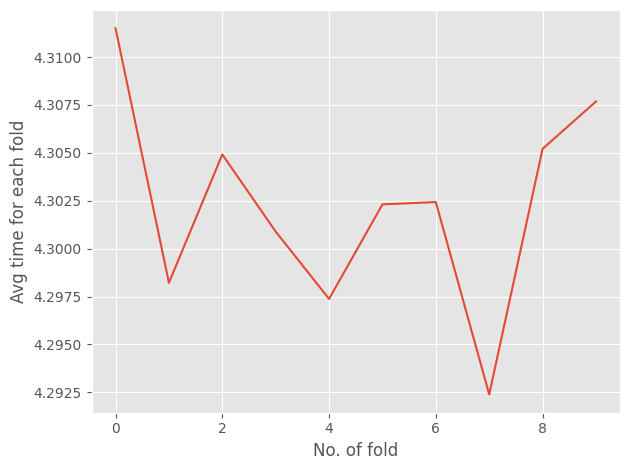

In [15]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [16]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [17]:
train_acc_cnn_svm_n.shape

(100,)

In [18]:
train_acc_cnn_svm_n.shape

(100,)

In [19]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

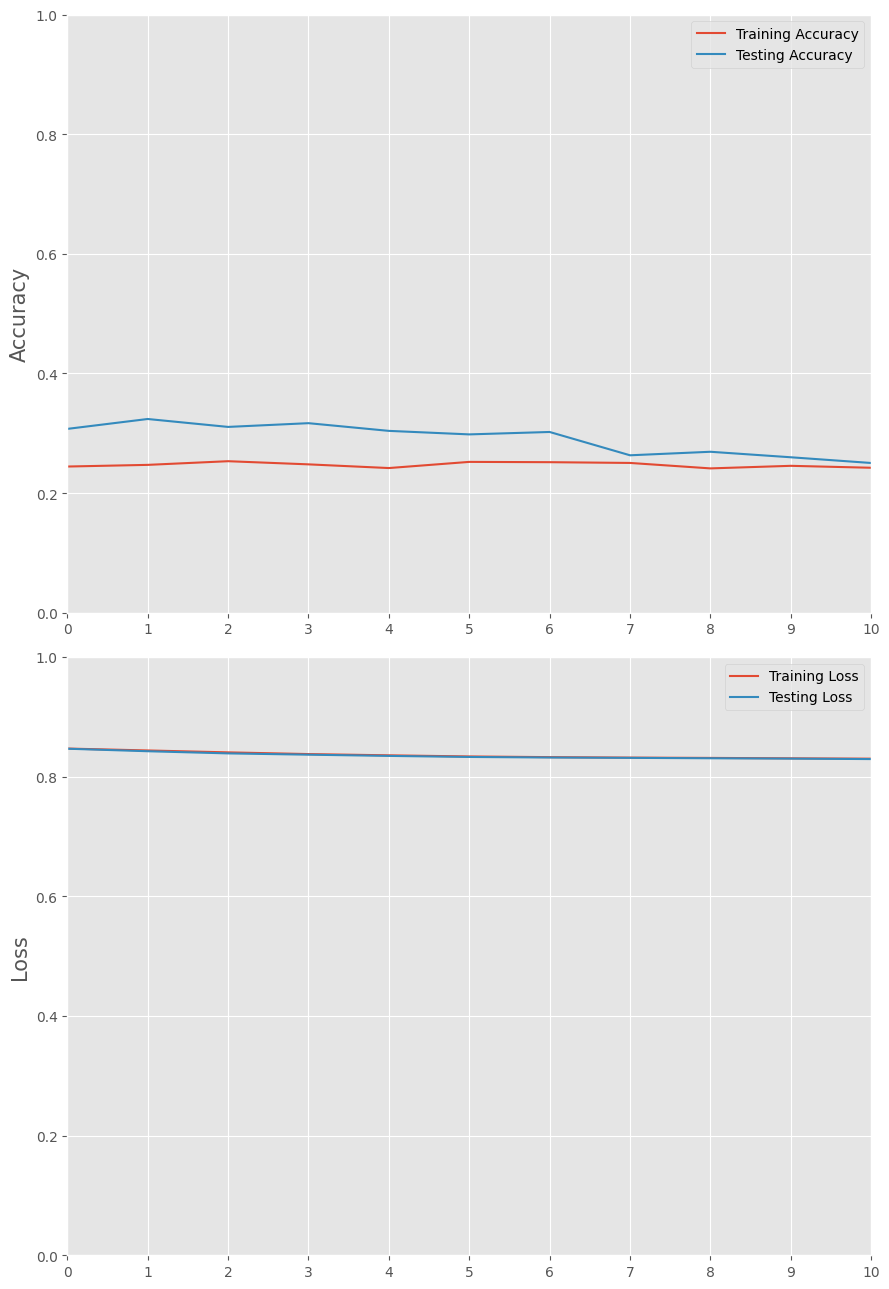

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [21]:
np.array(scores_cnn_svm).shape

(10, 302, 4)

In [22]:
np.array(y_test_all).shape

(10, 302)

In [23]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [24]:
y_pred_cnn_svm.shape

(10, 302)

In [25]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_cnn_svm[i]))

In [26]:
import gc
gc.collect()

90

In [27]:
acc_scores_cnn_svm

[0.2913907284768212,
 0.2947019867549669,
 0.1423841059602649,
 0.2980132450331126,
 0.25165562913907286,
 0.23841059602649006,
 0.16556291390728478,
 0.30132450331125826,
 0.3443708609271523,
 0.2152317880794702]

In [28]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [29]:
y_test_all_n = np.array(y_test_all)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

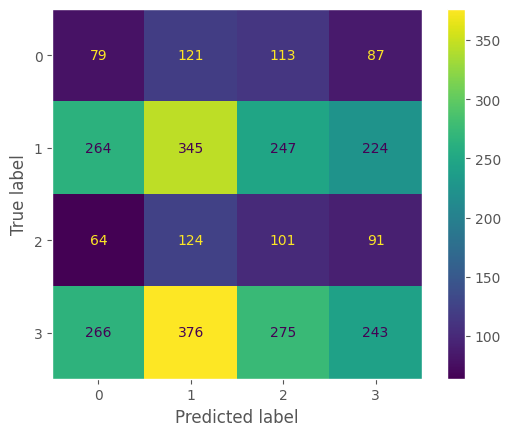

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [31]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.20      0.15       400
           1       0.36      0.32      0.34      1080
           2       0.14      0.27      0.18       380
           3       0.38      0.21      0.27      1160

    accuracy                           0.25      3020
   macro avg       0.25      0.25      0.23      3020
weighted avg       0.31      0.25      0.27      3020



## CNN + SVM (hyper-para-tuning)

In [ ]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# X,y = load_data(DATA_PATH)

In [ ]:
# X = X / 255.0

In [ ]:
# X.shape

In [ ]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [ ]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [ ]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [ ]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [ ]:
# tuner_search.results_summary()

In [ ]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [ ]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [101]:
import gc
gc.collect()

0

In [102]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [103]:
times_xg

[290.51328015327454,
 291.91802620887756,
 293.5842788219452,
 288.3977963924408,
 290.0562901496887,
 292.8270673751831,
 292.3319797515869,
 291.58594846725464,
 293.5189702510834,
 293.0504858493805]

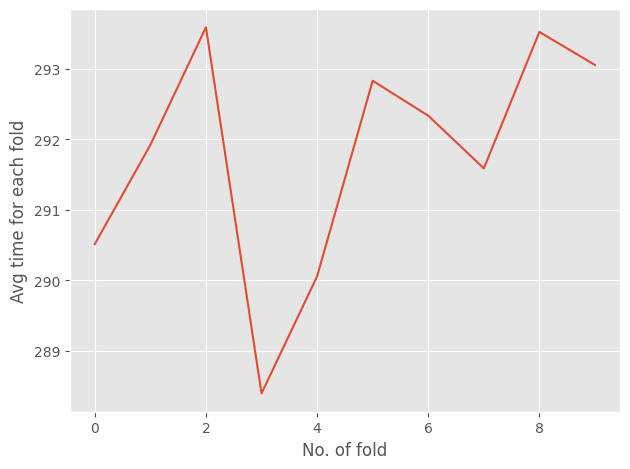

In [104]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [105]:
import gc
gc.collect()

3225

In [106]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [107]:
acc_scores_xg

[0.5132450331125827,
 0.4470198675496689,
 0.4470198675496689,
 0.49337748344370863,
 0.49337748344370863,
 0.49337748344370863,
 0.44039735099337746,
 0.48013245033112584,
 0.48344370860927155,
 0.48344370860927155]

In [108]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

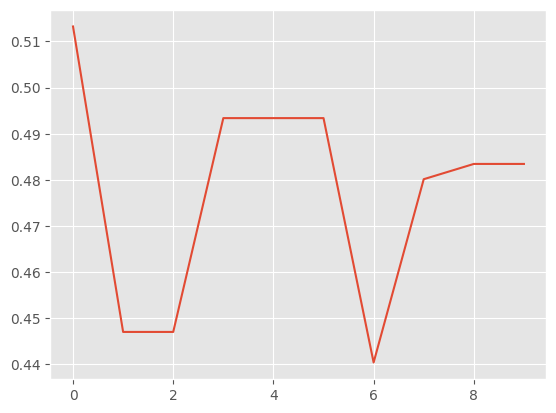

In [109]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [110]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [111]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.75%


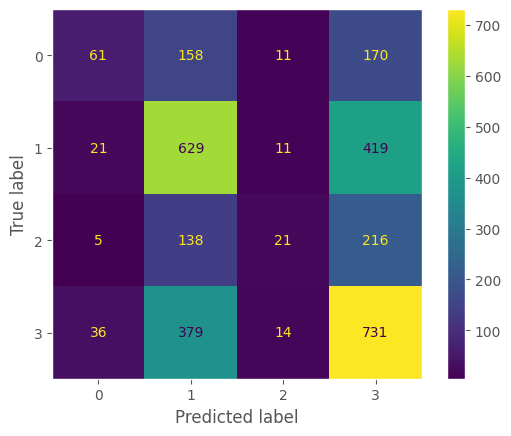

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [113]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.50      0.15      0.23       400
           1       0.48      0.58      0.53      1080
           2       0.37      0.06      0.10       380
           3       0.48      0.63      0.54      1160

    accuracy                           0.48      3020
   macro avg       0.46      0.36      0.35      3020
weighted avg       0.47      0.48      0.44      3020



# Catboost

In [114]:
import gc
gc.collect()

6456

In [115]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2857069	total: 3.01s	remaining: 4m 57s
1:	learn: 1.2388318	total: 5.52s	remaining: 4m 30s
2:	learn: 1.2083643	total: 8.06s	remaining: 4m 20s
3:	learn: 1.1799078	total: 10.7s	remaining: 4m 15s
4:	learn: 1.1552284	total: 13.2s	remaining: 4m 11s
5:	learn: 1.1325439	total: 15.8s	remaining: 4m 7s
6:	learn: 1.1164162	total: 18.3s	remaining: 4m 3s
7:	learn: 1.0964289	total: 20.8s	remaining: 3m 59s
8:	learn: 1.0768913	total: 23.3s	remaining: 3m 55s
9:	learn: 1.0586817	total: 25.9s	remaining: 3m 52s
10:	learn: 1.0466507	total: 28.4s	remaining: 3m 50s
11:	learn: 1.0310211	total: 31s	remaining: 3m 47s
12:	learn: 1.0114265	total: 33.5s	remaining: 3m 44s
13:	learn: 0.9947165	total: 36s	remaining: 3m 41s
14:	learn: 0.9785430	total: 38.5s	remaining: 3m 38s
15:	learn: 0.9593637	total: 41.1s	remaining: 3m 35s
16:	learn: 0.9387717	total: 43.6s	remaining: 3m 33s
17:	learn: 0.9226298	total: 46.2s	remaining: 3m 30s
18:	learn: 0.9068856	total: 48

56:	learn: 0.4548737	total: 2m 24s	remaining: 1m 49s
57:	learn: 0.4484358	total: 2m 27s	remaining: 1m 46s
58:	learn: 0.4433547	total: 2m 29s	remaining: 1m 44s
59:	learn: 0.4350143	total: 2m 32s	remaining: 1m 41s
60:	learn: 0.4280297	total: 2m 34s	remaining: 1m 38s
61:	learn: 0.4206530	total: 2m 37s	remaining: 1m 36s
62:	learn: 0.4117567	total: 2m 39s	remaining: 1m 33s
63:	learn: 0.4029058	total: 2m 42s	remaining: 1m 31s
64:	learn: 0.3977487	total: 2m 45s	remaining: 1m 28s
65:	learn: 0.3935810	total: 2m 47s	remaining: 1m 26s
66:	learn: 0.3867031	total: 2m 50s	remaining: 1m 23s
67:	learn: 0.3778782	total: 2m 52s	remaining: 1m 21s
68:	learn: 0.3746617	total: 2m 55s	remaining: 1m 18s
69:	learn: 0.3676739	total: 2m 57s	remaining: 1m 16s
70:	learn: 0.3631044	total: 3m	remaining: 1m 13s
71:	learn: 0.3581246	total: 3m 2s	remaining: 1m 11s
72:	learn: 0.3522197	total: 3m 5s	remaining: 1m 8s
73:	learn: 0.3483663	total: 3m 7s	remaining: 1m 5s
74:	learn: 0.3446190	total: 3m 10s	remaining: 1m 3s
75:

13:	learn: 1.0104086	total: 35.6s	remaining: 3m 38s
14:	learn: 0.9929576	total: 38.1s	remaining: 3m 36s
15:	learn: 0.9754082	total: 40.7s	remaining: 3m 33s
16:	learn: 0.9490123	total: 43.2s	remaining: 3m 30s
17:	learn: 0.9259942	total: 45.8s	remaining: 3m 28s
18:	learn: 0.9084375	total: 48.3s	remaining: 3m 25s
19:	learn: 0.8935756	total: 50.8s	remaining: 3m 23s
20:	learn: 0.8788081	total: 53.2s	remaining: 3m 20s
21:	learn: 0.8551043	total: 55.8s	remaining: 3m 17s
22:	learn: 0.8382164	total: 58.3s	remaining: 3m 15s
23:	learn: 0.8215394	total: 1m	remaining: 3m 12s
24:	learn: 0.8038764	total: 1m 3s	remaining: 3m 10s
25:	learn: 0.7816709	total: 1m 5s	remaining: 3m 7s
26:	learn: 0.7662219	total: 1m 8s	remaining: 3m 5s
27:	learn: 0.7507881	total: 1m 11s	remaining: 3m 2s
28:	learn: 0.7395496	total: 1m 13s	remaining: 3m
29:	learn: 0.7260393	total: 1m 16s	remaining: 2m 57s
30:	learn: 0.7085752	total: 1m 18s	remaining: 2m 55s
31:	learn: 0.6886876	total: 1m 21s	remaining: 2m 52s
32:	learn: 0.6745

70:	learn: 0.3503298	total: 3m	remaining: 1m 13s
71:	learn: 0.3454370	total: 3m 2s	remaining: 1m 11s
72:	learn: 0.3388782	total: 3m 5s	remaining: 1m 8s
73:	learn: 0.3344676	total: 3m 7s	remaining: 1m 5s
74:	learn: 0.3297814	total: 3m 10s	remaining: 1m 3s
75:	learn: 0.3260644	total: 3m 12s	remaining: 1m
76:	learn: 0.3213827	total: 3m 15s	remaining: 58.3s
77:	learn: 0.3188211	total: 3m 17s	remaining: 55.8s
78:	learn: 0.3138822	total: 3m 20s	remaining: 53.3s
79:	learn: 0.3098136	total: 3m 22s	remaining: 50.7s
80:	learn: 0.3056843	total: 3m 25s	remaining: 48.2s
81:	learn: 0.3015234	total: 3m 28s	remaining: 45.7s
82:	learn: 0.2978849	total: 3m 30s	remaining: 43.1s
83:	learn: 0.2934925	total: 3m 33s	remaining: 40.6s
84:	learn: 0.2889231	total: 3m 35s	remaining: 38.1s
85:	learn: 0.2845782	total: 3m 38s	remaining: 35.5s
86:	learn: 0.2815061	total: 3m 40s	remaining: 33s
87:	learn: 0.2779359	total: 3m 43s	remaining: 30.4s
88:	learn: 0.2741590	total: 3m 45s	remaining: 27.9s
89:	learn: 0.2693513	t

27:	learn: 0.7321712	total: 1m 11s	remaining: 3m 3s
28:	learn: 0.7186286	total: 1m 14s	remaining: 3m 1s
29:	learn: 0.7059406	total: 1m 16s	remaining: 2m 58s
30:	learn: 0.6888114	total: 1m 19s	remaining: 2m 56s
31:	learn: 0.6773734	total: 1m 21s	remaining: 2m 53s
32:	learn: 0.6656232	total: 1m 24s	remaining: 2m 50s
33:	learn: 0.6555219	total: 1m 26s	remaining: 2m 48s
34:	learn: 0.6451895	total: 1m 29s	remaining: 2m 45s
35:	learn: 0.6354988	total: 1m 31s	remaining: 2m 43s
36:	learn: 0.6257405	total: 1m 34s	remaining: 2m 40s
37:	learn: 0.6141731	total: 1m 36s	remaining: 2m 38s
38:	learn: 0.6038617	total: 1m 39s	remaining: 2m 35s
39:	learn: 0.5936550	total: 1m 41s	remaining: 2m 32s
40:	learn: 0.5846240	total: 1m 44s	remaining: 2m 30s
41:	learn: 0.5720849	total: 1m 46s	remaining: 2m 27s
42:	learn: 0.5643620	total: 1m 49s	remaining: 2m 25s
43:	learn: 0.5538195	total: 1m 51s	remaining: 2m 22s
44:	learn: 0.5426252	total: 1m 54s	remaining: 2m 20s
45:	learn: 0.5321508	total: 1m 57s	remaining: 2m

84:	learn: 0.2857019	total: 3m 35s	remaining: 38.1s
85:	learn: 0.2819904	total: 3m 38s	remaining: 35.5s
86:	learn: 0.2790532	total: 3m 40s	remaining: 33s
87:	learn: 0.2759153	total: 3m 43s	remaining: 30.5s
88:	learn: 0.2724351	total: 3m 45s	remaining: 27.9s
89:	learn: 0.2654054	total: 3m 48s	remaining: 25.4s
90:	learn: 0.2608582	total: 3m 51s	remaining: 22.9s
91:	learn: 0.2566600	total: 3m 53s	remaining: 20.3s
92:	learn: 0.2536041	total: 3m 56s	remaining: 17.8s
93:	learn: 0.2496953	total: 3m 58s	remaining: 15.2s
94:	learn: 0.2481483	total: 4m 1s	remaining: 12.7s
95:	learn: 0.2440976	total: 4m 3s	remaining: 10.2s
96:	learn: 0.2390156	total: 4m 6s	remaining: 7.62s
97:	learn: 0.2359973	total: 4m 8s	remaining: 5.08s
98:	learn: 0.2330680	total: 4m 11s	remaining: 2.54s
99:	learn: 0.2305488	total: 4m 13s	remaining: 0us
Training on fold 9/10...
Learning rate set to 0.5
0:	learn: 1.2871345	total: 2.72s	remaining: 4m 29s
1:	learn: 1.2392066	total: 5.28s	remaining: 4m 18s
2:	learn: 1.2142836	tota

41:	learn: 0.5694143	total: 1m 46s	remaining: 2m 26s
42:	learn: 0.5559207	total: 1m 49s	remaining: 2m 24s
43:	learn: 0.5441186	total: 1m 51s	remaining: 2m 21s
44:	learn: 0.5369784	total: 1m 54s	remaining: 2m 19s
45:	learn: 0.5285788	total: 1m 56s	remaining: 2m 16s
46:	learn: 0.5174969	total: 1m 59s	remaining: 2m 14s
47:	learn: 0.5055760	total: 2m 1s	remaining: 2m 11s
48:	learn: 0.4984720	total: 2m 4s	remaining: 2m 9s
49:	learn: 0.4858637	total: 2m 6s	remaining: 2m 6s
50:	learn: 0.4775820	total: 2m 9s	remaining: 2m 4s
51:	learn: 0.4693384	total: 2m 11s	remaining: 2m 1s
52:	learn: 0.4639506	total: 2m 14s	remaining: 1m 59s
53:	learn: 0.4565383	total: 2m 16s	remaining: 1m 56s
54:	learn: 0.4494719	total: 2m 19s	remaining: 1m 54s
55:	learn: 0.4414748	total: 2m 22s	remaining: 1m 51s
56:	learn: 0.4280219	total: 2m 24s	remaining: 1m 49s
57:	learn: 0.4237220	total: 2m 27s	remaining: 1m 46s
58:	learn: 0.4182671	total: 2m 29s	remaining: 1m 43s
59:	learn: 0.4129456	total: 2m 32s	remaining: 1m 41s
6

In [ ]:
times_cb

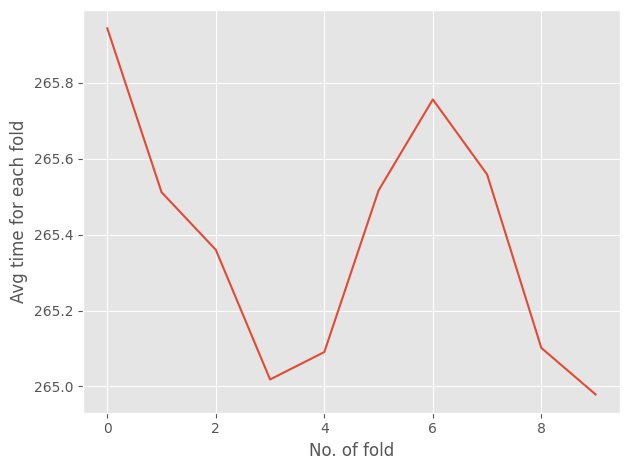

In [116]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [117]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [118]:
acc_scores_cb

[0.4337748344370861,
 0.44039735099337746,
 0.47019867549668876,
 0.44370860927152317,
 0.41721854304635764,
 0.40397350993377484,
 0.4735099337748344,
 0.46357615894039733,
 0.4602649006622517,
 0.41721854304635764]

In [119]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

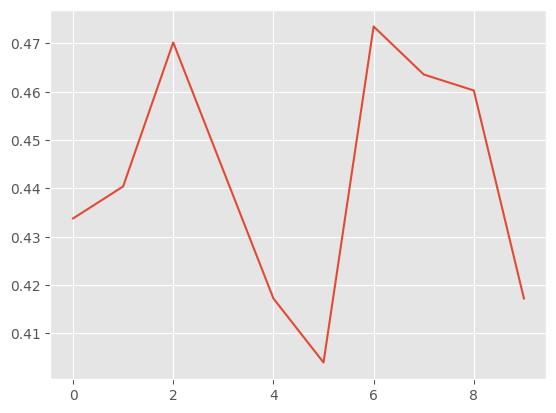

In [120]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [121]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [122]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.24%


In [123]:
import gc
gc.collect()

3430

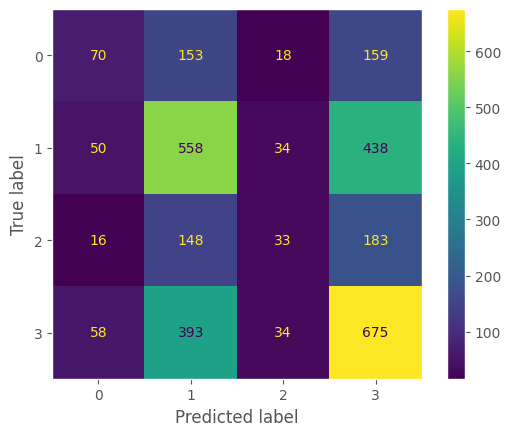

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [125]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.36      0.17      0.24       400
           1       0.45      0.52      0.48      1080
           2       0.28      0.09      0.13       380
           3       0.46      0.58      0.52      1160

    accuracy                           0.44      3020
   macro avg       0.39      0.34      0.34      3020
weighted avg       0.42      0.44      0.42      3020



In [126]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

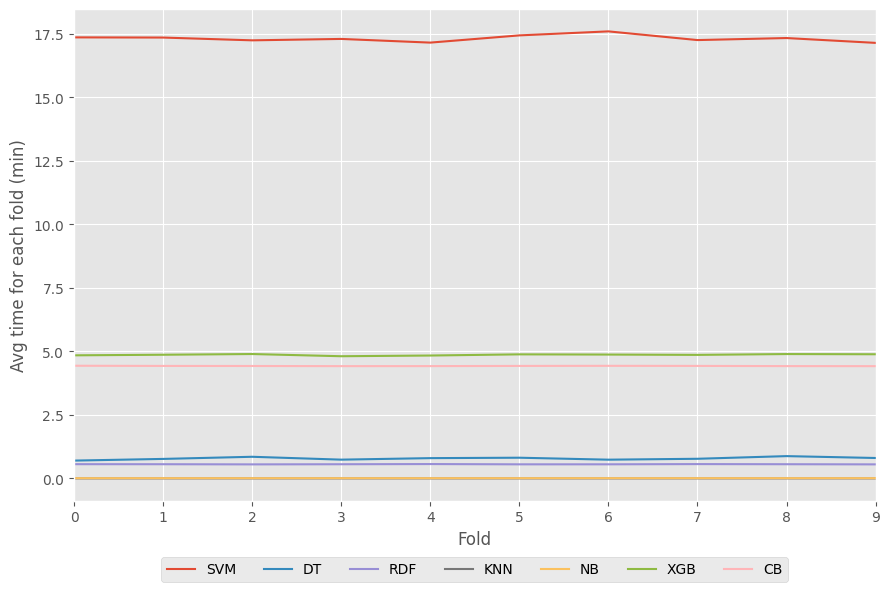

In [128]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [129]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

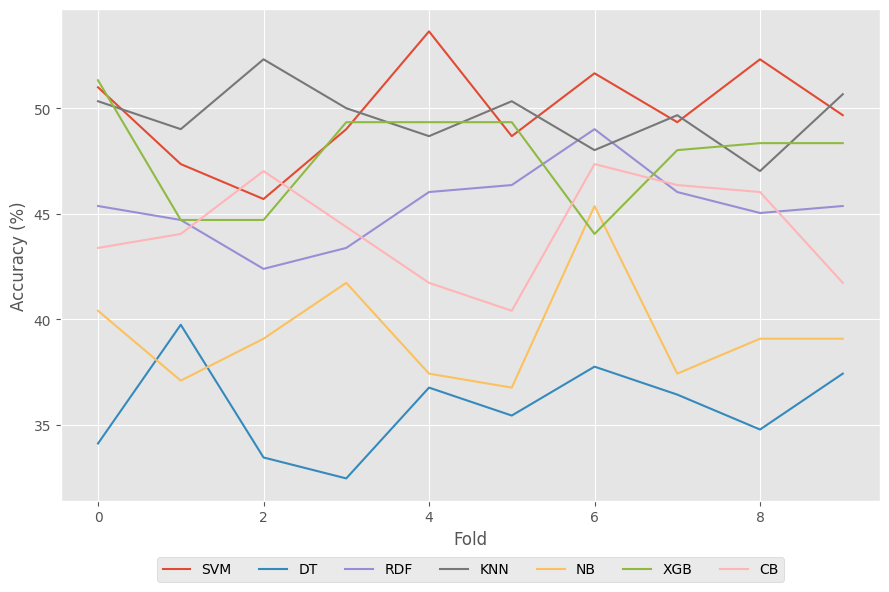

In [130]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [32]:
import gc
gc.collect()

15

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [36]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [37]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 56ms/step - loss: 1.2789 - accuracy: 0.3765 - val_loss: 1.3450 - val_accuracy: 0.3272 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 50ms/step - loss: 1.2606 - accuracy: 0.3986 - val_loss: 1.2708 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 53ms/step - loss: 1.2475 - accuracy: 0.4096 - val_loss: 1.2610 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 52ms/step - loss: 1.2300 - accuracy: 0.4464 - val_loss: 1.2510 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 51ms/step - loss: 1.2186 - accuracy: 0.4518 - val_loss: 1.2448 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 1.2028 - accuracy: 0.4616 - val_loss: 1.2719 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 7/100
77/77 [==========================

77/77 [==============================] - 3s 41ms/step - loss: 0.0787 - accuracy: 0.9800 - val_loss: 2.3516 - val_accuracy: 0.5846 - lr: 4.0000e-05
Epoch 60/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0822 - accuracy: 0.9763 - val_loss: 2.3549 - val_accuracy: 0.5846 - lr: 4.0000e-05
Epoch 61/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0785 - accuracy: 0.9800 - val_loss: 2.3764 - val_accuracy: 0.5846 - lr: 4.0000e-05
Epoch 62/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0760 - accuracy: 0.9804 - val_loss: 2.3707 - val_accuracy: 0.5846 - lr: 4.0000e-05
Epoch 63/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 2.3794 - val_accuracy: 0.5846 - lr: 4.0000e-05
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 0.0676 - accuracy: 0.9832
Epoch 64: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 64: 3.16 seconds
77

Epoch 88/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0633 - accuracy: 0.9845 - val_loss: 2.4296 - val_accuracy: 0.5809 - lr: 3.2000e-07
Epoch 89/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0580 - accuracy: 0.9853 - val_loss: 2.4294 - val_accuracy: 0.5809 - lr: 3.2000e-07
Epoch 90/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0602 - accuracy: 0.9836 - val_loss: 2.4297 - val_accuracy: 0.5809 - lr: 3.2000e-07
Epoch 91/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0608 - accuracy: 0.9832 - val_loss: 2.4299 - val_accuracy: 0.5809 - lr: 3.2000e-07
Epoch 92/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0588 - accuracy: 0.9849 - val_loss: 2.4303 - val_accuracy: 0.5809 - lr: 3.2000e-07
Epoch 93/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0597 - accuracy: 0.9857 - val_loss: 2.4303 - val_accuracy: 0.5772 - lr: 3.2000e-07
Epoch 94/100
76/77 [====================

Epoch 17/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1004 - accuracy: 0.5282 - val_loss: 1.1420 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 3s 41ms/step - loss: 1.0703 - accuracy: 0.5335 - val_loss: 1.1529 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 3s 41ms/step - loss: 1.0412 - accuracy: 0.5630 - val_loss: 1.0828 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 3s 41ms/step - loss: 1.0206 - accuracy: 0.5662 - val_loss: 1.1226 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 3s 41ms/step - loss: 0.9940 - accuracy: 0.5781 - val_loss: 1.1098 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 3s 41ms/step - loss: 1.0060 - accuracy: 0.5740 - val_loss: 1.1263 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 3s 42ms/st

Epoch 47/100
77/77 [==============================] - 3s 42ms/step - loss: 0.3130 - accuracy: 0.8872 - val_loss: 1.4772 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 48/100
77/77 [==============================] - 3s 41ms/step - loss: 0.3325 - accuracy: 0.8782 - val_loss: 1.4300 - val_accuracy: 0.5735 - lr: 0.0010
Epoch 49/100
77/77 [==============================] - 3s 41ms/step - loss: 0.2871 - accuracy: 0.8986 - val_loss: 1.4743 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 50/100
77/77 [==============================] - 3s 41ms/step - loss: 0.2720 - accuracy: 0.8937 - val_loss: 1.4786 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 51/100
77/77 [==============================] - ETA: 0s - loss: 0.2233 - accuracy: 0.9166
Epoch 51: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 51: 3.22 seconds
77/77 [==============================] - 3s 42ms/step - loss: 0.2233 - accuracy: 0.9166 - val_loss: 1.5915 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 52/100
77/77 [=

Epoch 76/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 2.3020 - val_accuracy: 0.6140 - lr: 4.0000e-05
Epoch 77/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0107 - accuracy: 0.9984 - val_loss: 2.3097 - val_accuracy: 0.6140 - lr: 4.0000e-05
Epoch 78/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0094 - accuracy: 0.9984 - val_loss: 2.3097 - val_accuracy: 0.6213 - lr: 4.0000e-05
Epoch 79/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 2.3210 - val_accuracy: 0.6140 - lr: 4.0000e-05
Epoch 80/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 2.3273 - val_accuracy: 0.6103 - lr: 4.0000e-05
Epoch 81/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0080 - accuracy: 0.9988 - val_loss: 2.3238 - val_accuracy: 0.6213 - lr: 4.0000e-05
Epoch 82/100
76/77 [====================

Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 1.2016 - accuracy: 0.4648 - val_loss: 1.2346 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 42ms/step - loss: 1.2135 - accuracy: 0.4534 - val_loss: 1.2425 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1961 - accuracy: 0.4730 - val_loss: 1.1925 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1590 - accuracy: 0.5020 - val_loss: 1.1978 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1793 - accuracy: 0.4726 - val_loss: 1.1743 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1469 - accuracy: 0.4902 - val_loss: 1.1954 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 3s 42ms/step - 

77/77 [==============================] - ETA: 0s - loss: 0.1925 - accuracy: 0.9395
Epoch 63: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 63: 3.20 seconds
77/77 [==============================] - 3s 42ms/step - loss: 0.1925 - accuracy: 0.9395 - val_loss: 1.8278 - val_accuracy: 0.5368 - lr: 4.0000e-05
Epoch 64/100
77/77 [==============================] - 3s 42ms/step - loss: 0.1814 - accuracy: 0.9448 - val_loss: 1.8385 - val_accuracy: 0.5331 - lr: 8.0000e-06
Epoch 65/100
77/77 [==============================] - 3s 42ms/step - loss: 0.1843 - accuracy: 0.9448 - val_loss: 1.8410 - val_accuracy: 0.5404 - lr: 8.0000e-06
Epoch 66/100
77/77 [==============================] - 3s 41ms/step - loss: 0.1767 - accuracy: 0.9473 - val_loss: 1.8499 - val_accuracy: 0.5294 - lr: 8.0000e-06
Epoch 67/100
77/77 [==============================] - 3s 42ms/step - loss: 0.1759 - accuracy: 0.9464 - val_loss: 1.8454 - val_accuracy: 0.5404 - lr: 8.0000e-06
Epoch 68/100
77

Epoch 92/100
77/77 [==============================] - 3s 41ms/step - loss: 0.1634 - accuracy: 0.9522 - val_loss: 1.8644 - val_accuracy: 0.5368 - lr: 3.2000e-07
Epoch 93/100
76/77 [============================>.] - ETA: 0s - loss: 0.1684 - accuracy: 0.9507
Epoch 93: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 93: 3.21 seconds
77/77 [==============================] - 3s 42ms/step - loss: 0.1693 - accuracy: 0.9497 - val_loss: 1.8649 - val_accuracy: 0.5368 - lr: 3.2000e-07
Epoch 94/100
77/77 [==============================] - 3s 42ms/step - loss: 0.1637 - accuracy: 0.9501 - val_loss: 1.8650 - val_accuracy: 0.5368 - lr: 6.4000e-08
Epoch 95/100
77/77 [==============================] - 3s 42ms/step - loss: 0.1632 - accuracy: 0.9526 - val_loss: 1.8650 - val_accuracy: 0.5368 - lr: 6.4000e-08
Epoch 96/100
77/77 [==============================] - 3s 42ms/step - loss: 0.1631 - accuracy: 0.9518 - val_loss: 1.8651 - val_accuracy: 0.5368 - lr: 6.4000e-08
Ep

77/77 [==============================] - 3s 41ms/step - loss: 0.8772 - accuracy: 0.6517 - val_loss: 1.1624 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 3s 41ms/step - loss: 0.8091 - accuracy: 0.6803 - val_loss: 1.1938 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7884 - accuracy: 0.6860 - val_loss: 1.0989 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7268 - accuracy: 0.7220 - val_loss: 1.2072 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7108 - accuracy: 0.7253 - val_loss: 1.1805 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 26/100
77/77 [==============================] - 3s 42ms/step - loss: 0.7031 - accuracy: 0.7249 - val_loss: 1.0956 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 27/100
77/77 [==============================] - 3s 41ms/step - loss: 0.

Epoch 50/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0447 - accuracy: 0.9914 - val_loss: 2.1461 - val_accuracy: 0.5515 - lr: 4.0000e-05
Epoch 51/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0371 - accuracy: 0.9939 - val_loss: 2.1646 - val_accuracy: 0.5551 - lr: 4.0000e-05
Epoch 52/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0400 - accuracy: 0.9935 - val_loss: 2.1968 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 53/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0337 - accuracy: 0.9939 - val_loss: 2.2174 - val_accuracy: 0.5515 - lr: 4.0000e-05
Epoch 54/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0401 - accuracy: 0.9922 - val_loss: 2.2522 - val_accuracy: 0.5551 - lr: 4.0000e-05
Epoch 55/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0356 - accuracy: 0.9930 - val_loss: 2.2570 - val_accuracy: 0.5551 - lr: 4.0000e-05
Epoch 56/100
77/77 [====================

Epoch 79/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0273 - accuracy: 0.9955 - val_loss: 2.3310 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 80/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0281 - accuracy: 0.9959 - val_loss: 2.3313 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 81/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0289 - accuracy: 0.9951 - val_loss: 2.3314 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 82/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0289 - accuracy: 0.9955 - val_loss: 2.3315 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 83/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0281 - accuracy: 0.9955 - val_loss: 2.3316 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 84/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0254 - accuracy: 0.9959 - val_loss: 2.3319 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 85/100
77/77 [====================

Epoch 8/100
77/77 [==============================] - 3s 41ms/step - loss: 1.2143 - accuracy: 0.4342 - val_loss: 1.1970 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 42ms/step - loss: 1.1614 - accuracy: 0.4775 - val_loss: 1.1535 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1279 - accuracy: 0.5029 - val_loss: 1.1566 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 3s 42ms/step - loss: 1.1890 - accuracy: 0.4624 - val_loss: 1.2585 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 3s 40ms/step - loss: 1.2814 - accuracy: 0.3712 - val_loss: 1.2431 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 3s 41ms/step - loss: 1.2648 - accuracy: 0.3761 - val_loss: 1.2376 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 3s 41ms/step

Epoch 37/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7882 - accuracy: 0.6746 - val_loss: 1.0304 - val_accuracy: 0.5588 - lr: 4.0000e-05
Epoch 38/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7779 - accuracy: 0.6774 - val_loss: 1.0398 - val_accuracy: 0.5404 - lr: 4.0000e-05
Epoch 39/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7682 - accuracy: 0.6852 - val_loss: 1.0524 - val_accuracy: 0.5515 - lr: 4.0000e-05
Epoch 40/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7618 - accuracy: 0.6897 - val_loss: 1.0615 - val_accuracy: 0.5515 - lr: 4.0000e-05
Epoch 41/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7564 - accuracy: 0.6905 - val_loss: 1.0661 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 42/100
77/77 [==============================] - 3s 42ms/step - loss: 0.7438 - accuracy: 0.6962 - val_loss: 1.0676 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 43/100
77/77 [====================

Epoch 66/100
77/77 [==============================] - 3s 41ms/step - loss: 0.6957 - accuracy: 0.7191 - val_loss: 1.0893 - val_accuracy: 0.5478 - lr: 3.2000e-07
Epoch 67/100
77/77 [==============================] - 3s 41ms/step - loss: 0.6953 - accuracy: 0.7163 - val_loss: 1.0892 - val_accuracy: 0.5478 - lr: 3.2000e-07
Epoch 68/100
77/77 [==============================] - 3s 41ms/step - loss: 0.6983 - accuracy: 0.7273 - val_loss: 1.0892 - val_accuracy: 0.5478 - lr: 3.2000e-07
Epoch 69/100
77/77 [==============================] - 3s 42ms/step - loss: 0.6973 - accuracy: 0.7081 - val_loss: 1.0891 - val_accuracy: 0.5478 - lr: 3.2000e-07
Epoch 70/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7028 - accuracy: 0.7171 - val_loss: 1.0891 - val_accuracy: 0.5478 - lr: 3.2000e-07
Epoch 71/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7038 - accuracy: 0.7183 - val_loss: 1.0891 - val_accuracy: 0.5478 - lr: 3.2000e-07
Epoch 72/100
77/77 [====================

Epoch 95/100
76/77 [============================>.] - ETA: 0s - loss: 0.6975 - accuracy: 0.7167
Epoch 95: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 95: 3.19 seconds
77/77 [==============================] - 3s 41ms/step - loss: 0.6966 - accuracy: 0.7167 - val_loss: 1.0895 - val_accuracy: 0.5478 - lr: 1.2800e-08
Epoch 96/100
77/77 [==============================] - 3s 42ms/step - loss: 0.6956 - accuracy: 0.7195 - val_loss: 1.0895 - val_accuracy: 0.5478 - lr: 2.5600e-09
Epoch 97/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7020 - accuracy: 0.7150 - val_loss: 1.0895 - val_accuracy: 0.5478 - lr: 2.5600e-09
Epoch 98/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7001 - accuracy: 0.7130 - val_loss: 1.0895 - val_accuracy: 0.5478 - lr: 2.5600e-09
Epoch 99/100
77/77 [==============================] - 3s 41ms/step - loss: 0.6969 - accuracy: 0.7277 - val_loss: 1.0895 - val_accuracy: 0.5478 - lr: 2.5600e-09
E

Epoch 24/100
77/77 [==============================] - 3s 44ms/step - loss: 0.9815 - accuracy: 0.5854 - val_loss: 1.1928 - val_accuracy: 0.4375 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 3s 42ms/step - loss: 1.0652 - accuracy: 0.5335 - val_loss: 1.2049 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 3s 41ms/step - loss: 0.9863 - accuracy: 0.5785 - val_loss: 1.1672 - val_accuracy: 0.4632 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 3s 41ms/step - loss: 0.9398 - accuracy: 0.6067 - val_loss: 1.1502 - val_accuracy: 0.4816 - lr: 2.0000e-04
Epoch 28/100
76/77 [============================>.] - ETA: 0s - loss: 0.9027 - accuracy: 0.6254
Epoch 28: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 28: 3.17 seconds
77/77 [==============================] - 3s 41ms/step - loss: 0.9036 - accuracy: 0.6259 - val_loss: 1.1951 - val_accuracy: 0.4779 - lr: 2.0000e-04
E

Epoch 53/100
77/77 [==============================] - 3s 44ms/step - loss: 0.7202 - accuracy: 0.7212 - val_loss: 1.2425 - val_accuracy: 0.4816 - lr: 1.6000e-06
Epoch 54/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7193 - accuracy: 0.7183 - val_loss: 1.2422 - val_accuracy: 0.4816 - lr: 1.6000e-06
Epoch 55/100
77/77 [==============================] - 3s 42ms/step - loss: 0.7134 - accuracy: 0.7212 - val_loss: 1.2438 - val_accuracy: 0.4816 - lr: 1.6000e-06
Epoch 56/100
77/77 [==============================] - 4s 52ms/step - loss: 0.7176 - accuracy: 0.7179 - val_loss: 1.2441 - val_accuracy: 0.4816 - lr: 1.6000e-06
Epoch 57/100
77/77 [==============================] - 4s 52ms/step - loss: 0.7186 - accuracy: 0.7269 - val_loss: 1.2438 - val_accuracy: 0.4816 - lr: 1.6000e-06
Epoch 58/100
77/77 [==============================] - ETA: 0s - loss: 0.7151 - accuracy: 0.7187
Epoch 58: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 58: 3.

Epoch 82/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7180 - accuracy: 0.7204 - val_loss: 1.2434 - val_accuracy: 0.4816 - lr: 1.2800e-08
Epoch 83/100
77/77 [==============================] - 3s 41ms/step - loss: 0.7159 - accuracy: 0.7306 - val_loss: 1.2434 - val_accuracy: 0.4816 - lr: 1.2800e-08
Epoch 84/100
77/77 [==============================] - 3s 42ms/step - loss: 0.7187 - accuracy: 0.7261 - val_loss: 1.2434 - val_accuracy: 0.4816 - lr: 1.2800e-08
Epoch 85/100
77/77 [==============================] - 3s 44ms/step - loss: 0.7135 - accuracy: 0.7163 - val_loss: 1.2434 - val_accuracy: 0.4816 - lr: 1.2800e-08
Epoch 86/100
77/77 [==============================] - 3s 42ms/step - loss: 0.7202 - accuracy: 0.7159 - val_loss: 1.2434 - val_accuracy: 0.4816 - lr: 1.2800e-08
Epoch 87/100
77/77 [==============================] - 4s 50ms/step - loss: 0.7145 - accuracy: 0.7253 - val_loss: 1.2434 - val_accuracy: 0.4816 - lr: 1.2800e-08
Epoch 88/100
77/77 [====================

Epoch 11/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1460 - accuracy: 0.4992 - val_loss: 1.2012 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1229 - accuracy: 0.5209 - val_loss: 1.1276 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 3s 42ms/step - loss: 1.1003 - accuracy: 0.5172 - val_loss: 1.1134 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 3s 41ms/step - loss: 1.0802 - accuracy: 0.5421 - val_loss: 1.1636 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 3s 41ms/step - loss: 1.0743 - accuracy: 0.5519 - val_loss: 1.0763 - val_accuracy: 0.5478 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 3s 41ms/step - loss: 1.0368 - accuracy: 0.5679 - val_loss: 1.0877 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 3s 41ms/st

Epoch 41/100
77/77 [==============================] - 3s 41ms/step - loss: 0.3952 - accuracy: 0.8577 - val_loss: 1.1238 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 42/100
77/77 [==============================] - 3s 41ms/step - loss: 0.3246 - accuracy: 0.8749 - val_loss: 1.2928 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 43/100
77/77 [==============================] - 3s 41ms/step - loss: 0.2660 - accuracy: 0.9011 - val_loss: 1.5452 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 44/100
77/77 [==============================] - 3s 41ms/step - loss: 0.4214 - accuracy: 0.8393 - val_loss: 1.1737 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 45/100
77/77 [==============================] - 3s 41ms/step - loss: 0.3450 - accuracy: 0.8708 - val_loss: 1.1898 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 46/100
77/77 [==============================] - 3s 41ms/step - loss: 0.2451 - accuracy: 0.9117 - val_loss: 1.3011 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 47/100
77/77 [==============================] - 3s 42ms/st

Epoch 70/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 2.1195 - val_accuracy: 0.6507 - lr: 4.0000e-05
Epoch 71/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 2.1198 - val_accuracy: 0.6507 - lr: 4.0000e-05
Epoch 72/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.1235 - val_accuracy: 0.6507 - lr: 4.0000e-05
Epoch 73/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.1166 - val_accuracy: 0.6507 - lr: 4.0000e-05
Epoch 74/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.1206 - val_accuracy: 0.6544 - lr: 4.0000e-05
Epoch 75/100
77/77 [==============================] - 4s 48ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.1307 - val_accuracy: 0.6471 - lr: 4.0000e-05
Epoch 76/100
77/77 [====================

Epoch 99/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.1742 - val_accuracy: 0.6434 - lr: 3.2000e-07
Epoch 100/100
10/10 [==============================] - 1s 24ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 5s 48ms/step - loss: 1.2695 - accuracy: 0.3827 - val_loss: 1.3337 - val_accuracy: 0.3235 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 43ms/step - loss: 1.2377 - accuracy: 0.4084 - val_loss: 1.3114 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 42ms/step - loss: 1.2272 - accuracy: 0.4264 - val_loss: 1.2960 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 1.2066 - accuracy: 0.4452 - val_loss: 1.3160 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1978 - accuracy: 0.4558 - val_loss: 1.3134 - val_ac

Epoch 29/100
77/77 [==============================] - 3s 41ms/step - loss: 0.9671 - accuracy: 0.6026 - val_loss: 1.1345 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 30/100
77/77 [==============================] - 3s 42ms/step - loss: 1.0354 - accuracy: 0.5503 - val_loss: 1.1089 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 31/100
77/77 [==============================] - 3s 42ms/step - loss: 0.9457 - accuracy: 0.6120 - val_loss: 1.1670 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 3s 41ms/step - loss: 0.9527 - accuracy: 0.6059 - val_loss: 1.2287 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 3s 42ms/step - loss: 0.9225 - accuracy: 0.6092 - val_loss: 1.2426 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 34/100
77/77 [==============================] - 3s 42ms/step - loss: 0.9053 - accuracy: 0.6239 - val_loss: 1.1251 - val_accuracy: 0.4926 - lr: 0.0010
Epoch 35/100
77/77 [==============================] - 3s 42ms/st

Epoch 59/100
77/77 [==============================] - 3s 41ms/step - loss: 0.3851 - accuracy: 0.8610 - val_loss: 1.2346 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 60/100
77/77 [==============================] - 3s 41ms/step - loss: 0.3605 - accuracy: 0.8590 - val_loss: 1.4603 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 61/100
77/77 [==============================] - 3s 42ms/step - loss: 0.3232 - accuracy: 0.8798 - val_loss: 1.5651 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 62/100
77/77 [==============================] - 3s 41ms/step - loss: 0.2697 - accuracy: 0.9031 - val_loss: 1.5041 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 63/100
77/77 [==============================] - 3s 42ms/step - loss: 0.3865 - accuracy: 0.8581 - val_loss: 1.3744 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 64/100
77/77 [==============================] - 3s 41ms/step - loss: 0.3722 - accuracy: 0.8639 - val_loss: 1.5511 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 65/100
77/77 [==============================] - 3s 42ms/st

Epoch 88/100
77/77 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9930
Epoch 88: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 88: 3.23 seconds
77/77 [==============================] - 3s 42ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 2.3173 - val_accuracy: 0.5919 - lr: 4.0000e-05
Epoch 89/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 2.3193 - val_accuracy: 0.5882 - lr: 8.0000e-06
Epoch 90/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0224 - accuracy: 0.9951 - val_loss: 2.3243 - val_accuracy: 0.5846 - lr: 8.0000e-06
Epoch 91/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0212 - accuracy: 0.9955 - val_loss: 2.3320 - val_accuracy: 0.5882 - lr: 8.0000e-06
Epoch 92/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0202 - accuracy: 0.9951 - val_loss: 2.3321 - val_accuracy: 0.5882 - lr: 8.0000e-06
Ep

Epoch 17/100
77/77 [==============================] - 3s 42ms/step - loss: 1.1081 - accuracy: 0.5294 - val_loss: 1.2015 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1031 - accuracy: 0.5348 - val_loss: 1.1765 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 3s 42ms/step - loss: 1.0627 - accuracy: 0.5491 - val_loss: 1.1324 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 3s 42ms/step - loss: 1.0225 - accuracy: 0.5703 - val_loss: 1.1002 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 3s 42ms/step - loss: 0.9790 - accuracy: 0.5854 - val_loss: 1.1191 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 3s 42ms/step - loss: 0.9736 - accuracy: 0.5977 - val_loss: 1.2106 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 3s 41ms/st

Epoch 75/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0231 - accuracy: 0.9943 - val_loss: 2.2714 - val_accuracy: 0.5809 - lr: 1.6000e-06
Epoch 76/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0237 - accuracy: 0.9947 - val_loss: 2.2725 - val_accuracy: 0.5809 - lr: 1.6000e-06
Epoch 77/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0212 - accuracy: 0.9947 - val_loss: 2.2733 - val_accuracy: 0.5809 - lr: 1.6000e-06
Epoch 78/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0227 - accuracy: 0.9955 - val_loss: 2.2720 - val_accuracy: 0.5809 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0219 - accuracy: 0.9955 - val_loss: 2.2738 - val_accuracy: 0.5809 - lr: 1.6000e-06
Epoch 80/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0218 - accuracy: 0.9955 - val_loss: 2.2741 - val_accuracy: 0.5809 - lr: 1.6000e-06
Epoch 81/100
77/77 [====================

Epoch 4/100
77/77 [==============================] - 3s 42ms/step - loss: 1.2176 - accuracy: 0.4415 - val_loss: 1.2409 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 42ms/step - loss: 1.2040 - accuracy: 0.4554 - val_loss: 1.2513 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1901 - accuracy: 0.4693 - val_loss: 1.3020 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1745 - accuracy: 0.4890 - val_loss: 1.2507 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 3s 42ms/step - loss: 1.1785 - accuracy: 0.4767 - val_loss: 1.2244 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 41ms/step - loss: 1.1610 - accuracy: 0.5037 - val_loss: 1.2041 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 3s 41ms/step - l

Epoch 62/100
77/77 [==============================] - 3s 42ms/step - loss: 0.5281 - accuracy: 0.8054 - val_loss: 1.3475 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 63/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5335 - accuracy: 0.8034 - val_loss: 1.3470 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 64/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5298 - accuracy: 0.8050 - val_loss: 1.3481 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 65/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5347 - accuracy: 0.8054 - val_loss: 1.3482 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 66/100
77/77 [==============================] - 3s 42ms/step - loss: 0.5337 - accuracy: 0.8066 - val_loss: 1.3485 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 67/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5245 - accuracy: 0.8083 - val_loss: 1.3481 - val_accuracy: 0.5294 - lr: 1.6000e-06
Epoch 68/100
77/77 [====================

Epoch 91/100
77/77 [==============================] - 3s 42ms/step - loss: 0.5347 - accuracy: 0.8054 - val_loss: 1.3501 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 92/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5267 - accuracy: 0.8050 - val_loss: 1.3501 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 93/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5243 - accuracy: 0.8107 - val_loss: 1.3501 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 94/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5311 - accuracy: 0.8083 - val_loss: 1.3501 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 95/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5295 - accuracy: 0.8066 - val_loss: 1.3501 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 96/100
77/77 [==============================] - 3s 41ms/step - loss: 0.5293 - accuracy: 0.8083 - val_loss: 1.3501 - val_accuracy: 0.5331 - lr: 1.2800e-08
Epoch 97/100
77/77 [====================

In [38]:
import gc
gc.collect()

0

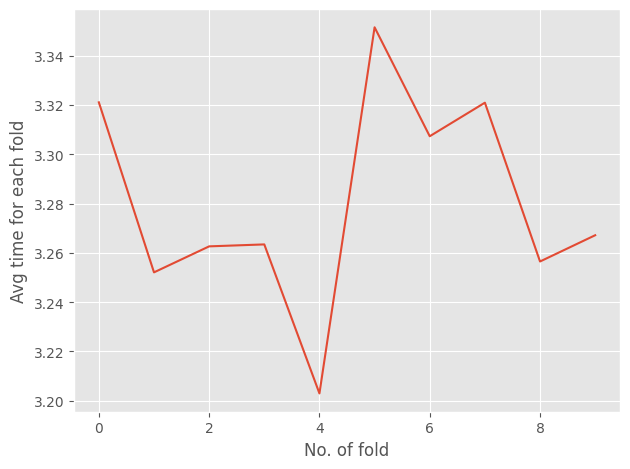

In [39]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [40]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [41]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

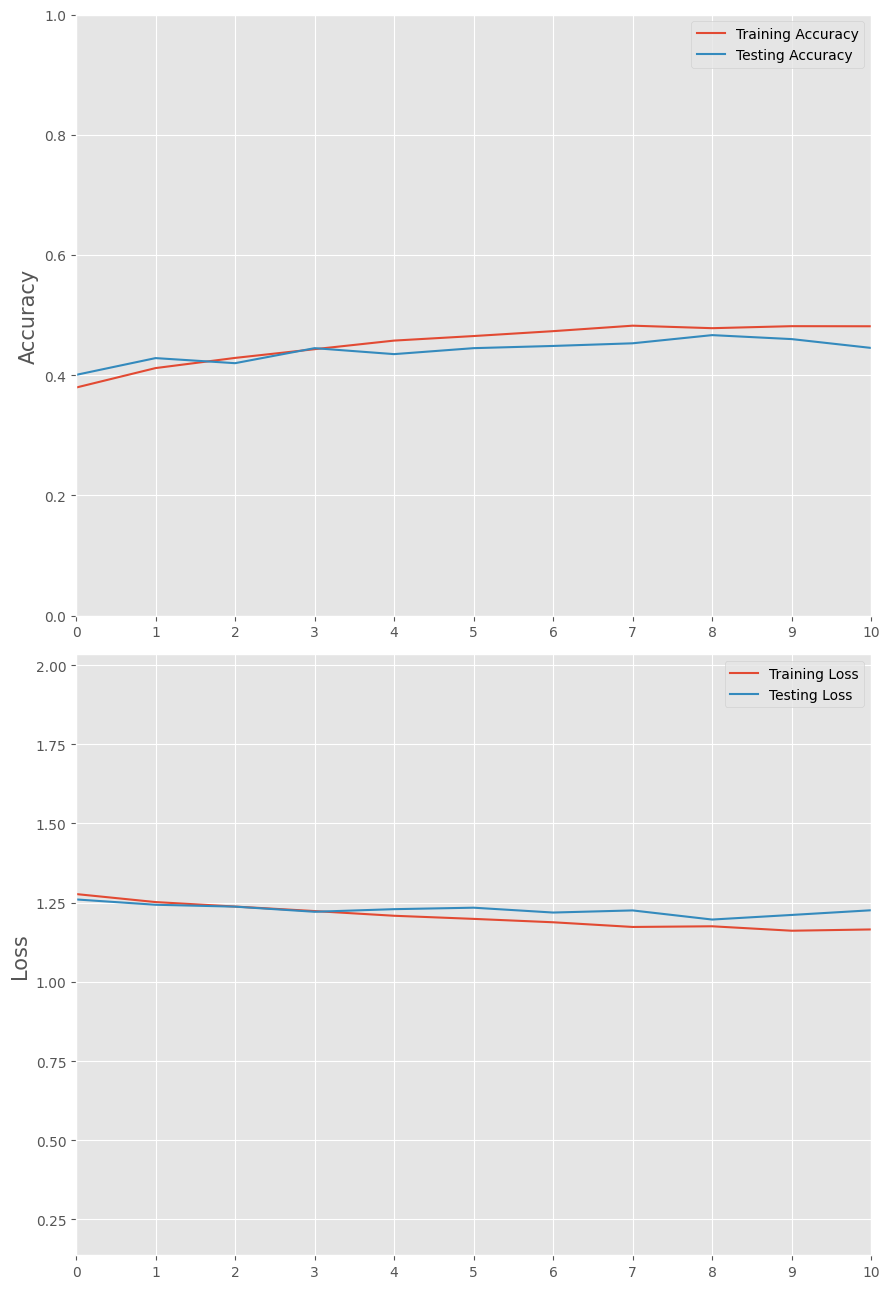

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [43]:
np.array(scores_lstm).shape

(10, 302, 4)

In [44]:
np.array(y_test_all).shape

(10, 302)

In [45]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [46]:
y_pred_lstm.shape

(10, 302)

In [47]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_lstm[i]))

In [48]:
acc_scores_lstm

[0.5596026490066225,
 0.652317880794702,
 0.6026490066225165,
 0.5695364238410596,
 0.5066225165562914,
 0.5198675496688742,
 0.5794701986754967,
 0.5927152317880795,
 0.5662251655629139,
 0.5629139072847682]

In [49]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [50]:
y_test_all_n = np.array(y_test_all)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

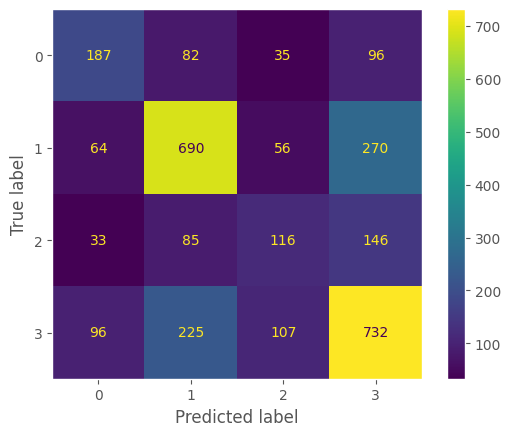

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [52]:
import gc
gc.collect()

29795

In [53]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       400
           1       0.64      0.64      0.64      1080
           2       0.37      0.31      0.33       380
           3       0.59      0.63      0.61      1160

    accuracy                           0.57      3020
   macro avg       0.52      0.51      0.52      3020
weighted avg       0.57      0.57      0.57      3020



# BISLTM

In [54]:
import gc
gc.collect()

0

In [55]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [56]:
from keras.layers import LSTM

In [57]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [58]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 9s 127ms/step - loss: 1.2686 - accuracy: 0.4023 - val_loss: 1.2685 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 92ms/step - loss: 1.2256 - accuracy: 0.4330 - val_loss: 1.2901 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 4s 95ms/step - loss: 1.1989 - accuracy: 0.4567 - val_loss: 1.1716 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 4s 95ms/step - loss: 1.1515 - accuracy: 0.4918 - val_loss: 1.1648 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 4s 92ms/step - loss: 1.1425 - accuracy: 0.4935 - val_loss: 1.1954 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 4s 93ms/step - loss: 1.1210 - accuracy: 0.5086 - val_loss: 1.2084 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 7/100
39/39 [=========================

Epoch 59/100
39/39 [==============================] - 3s 89ms/step - loss: 0.1621 - accuracy: 0.9513 - val_loss: 1.3155 - val_accuracy: 0.6434 - lr: 1.6000e-06
Epoch 60/100
39/39 [==============================] - 4s 91ms/step - loss: 0.1592 - accuracy: 0.9550 - val_loss: 1.3170 - val_accuracy: 0.6434 - lr: 1.6000e-06
Epoch 61/100
39/39 [==============================] - 4s 91ms/step - loss: 0.1616 - accuracy: 0.9513 - val_loss: 1.3157 - val_accuracy: 0.6434 - lr: 1.6000e-06
Epoch 62/100
39/39 [==============================] - 3s 89ms/step - loss: 0.1537 - accuracy: 0.9591 - val_loss: 1.3169 - val_accuracy: 0.6397 - lr: 1.6000e-06
Epoch 63/100
39/39 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 0.9546
Epoch 63: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 63: 3.47 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.1489 - accuracy: 0.9546 - val_loss: 1.3157 - val_accuracy: 0.6434 - lr: 1.6000e-06
Ep

Epoch 87/100
39/39 [==============================] - 3s 89ms/step - loss: 0.1564 - accuracy: 0.9554 - val_loss: 1.3167 - val_accuracy: 0.6434 - lr: 5.1200e-10
Epoch 88/100
39/39 [==============================] - ETA: 0s - loss: 0.1479 - accuracy: 0.9579
Epoch 88: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 88: 3.54 seconds
39/39 [==============================] - 4s 91ms/step - loss: 0.1479 - accuracy: 0.9579 - val_loss: 1.3167 - val_accuracy: 0.6434 - lr: 5.1200e-10
Epoch 89/100
39/39 [==============================] - 3s 89ms/step - loss: 0.1576 - accuracy: 0.9518 - val_loss: 1.3167 - val_accuracy: 0.6434 - lr: 1.0240e-10
Epoch 90/100
39/39 [==============================] - 3s 89ms/step - loss: 0.1600 - accuracy: 0.9497 - val_loss: 1.3167 - val_accuracy: 0.6434 - lr: 1.0240e-10
Epoch 91/100
39/39 [==============================] - 3s 89ms/step - loss: 0.1577 - accuracy: 0.9501 - val_loss: 1.3167 - val_accuracy: 0.6434 - lr: 1.0240e-10
E

39/39 [==============================] - 4s 91ms/step - loss: 0.4294 - accuracy: 0.8463 - val_loss: 1.1744 - val_accuracy: 0.5588 - lr: 3.2000e-07
Epoch 44/100
39/39 [==============================] - 3s 90ms/step - loss: 0.4332 - accuracy: 0.8389 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 3.2000e-07
Epoch 45/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4187 - accuracy: 0.8500 - val_loss: 1.1744 - val_accuracy: 0.5588 - lr: 3.2000e-07
Epoch 46/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4380 - accuracy: 0.8365 - val_loss: 1.1742 - val_accuracy: 0.5588 - lr: 3.2000e-07
Epoch 47/100
39/39 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.8475
Epoch 47: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 47: 3.51 seconds
39/39 [==============================] - 4s 90ms/step - loss: 0.4251 - accuracy: 0.8475 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 3.2000e-07
Epoch 48/100
39

Epoch 71/100
39/39 [==============================] - 4s 90ms/step - loss: 0.4239 - accuracy: 0.8434 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 1.0240e-10
Epoch 72/100
39/39 [==============================] - ETA: 0s - loss: 0.4279 - accuracy: 0.8401
Epoch 72: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 72: 3.46 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.4279 - accuracy: 0.8401 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 1.0240e-10
Epoch 73/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4337 - accuracy: 0.8352 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 2.0480e-11
Epoch 74/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4283 - accuracy: 0.8467 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 2.0480e-11
Epoch 75/100
39/39 [==============================] - 4s 91ms/step - loss: 0.4314 - accuracy: 0.8377 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 2.0480e-11
E

Epoch 99/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4301 - accuracy: 0.8434 - val_loss: 1.1743 - val_accuracy: 0.5588 - lr: 6.5536e-15
Epoch 100/100
10/10 [==============================] - 1s 34ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 8s 122ms/step - loss: 1.2759 - accuracy: 0.3998 - val_loss: 1.2245 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 113ms/step - loss: 1.2253 - accuracy: 0.4407 - val_loss: 1.1749 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 4s 108ms/step - loss: 1.1709 - accuracy: 0.4751 - val_loss: 1.1333 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 4s 99ms/step - loss: 1.1855 - accuracy: 0.4755 - val_loss: 1.1352 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 4s 95ms/step - loss: 1.1382 - accuracy: 0.4996 - val_loss: 1.1368 - val

Epoch 28/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5322 - accuracy: 0.8005 - val_loss: 1.0170 - val_accuracy: 0.6360 - lr: 4.0000e-05
Epoch 29/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5238 - accuracy: 0.8070 - val_loss: 1.0023 - val_accuracy: 0.6397 - lr: 4.0000e-05
Epoch 30/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5141 - accuracy: 0.8091 - val_loss: 1.0007 - val_accuracy: 0.6360 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 4s 90ms/step - loss: 0.5098 - accuracy: 0.8119 - val_loss: 1.0140 - val_accuracy: 0.6360 - lr: 4.0000e-05
Epoch 32/100
39/39 [==============================] - 3s 90ms/step - loss: 0.4997 - accuracy: 0.8168 - val_loss: 0.9995 - val_accuracy: 0.6287 - lr: 4.0000e-05
Epoch 33/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4913 - accuracy: 0.8197 - val_loss: 1.0339 - val_accuracy: 0.6397 - lr: 4.0000e-05
Epoch 34/100
39/39 [====================

Epoch 56/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4586 - accuracy: 0.8291 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 1.2800e-08
Epoch 57/100
39/39 [==============================] - 4s 90ms/step - loss: 0.4621 - accuracy: 0.8340 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 1.2800e-08
Epoch 58/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4694 - accuracy: 0.8295 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 1.2800e-08
Epoch 59/100
39/39 [==============================] - ETA: 0s - loss: 0.4639 - accuracy: 0.8336
Epoch 59: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 59: 3.53 seconds
39/39 [==============================] - 4s 91ms/step - loss: 0.4639 - accuracy: 0.8336 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 1.2800e-08
Epoch 60/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4657 - accuracy: 0.8267 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 2.5600e-09
E

Epoch 84/100
39/39 [==============================] - ETA: 0s - loss: 0.4712 - accuracy: 0.8287
Epoch 84: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 84: 3.48 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.4712 - accuracy: 0.8287 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 4.0960e-12
Epoch 85/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4713 - accuracy: 0.8246 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 8.1920e-13
Epoch 86/100
39/39 [==============================] - 4s 92ms/step - loss: 0.4686 - accuracy: 0.8316 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 8.1920e-13
Epoch 87/100
39/39 [==============================] - 3s 88ms/step - loss: 0.4659 - accuracy: 0.8328 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 8.1920e-13
Epoch 88/100
39/39 [==============================] - 3s 88ms/step - loss: 0.4566 - accuracy: 0.8373 - val_loss: 1.0376 - val_accuracy: 0.6140 - lr: 8.1920e-13
Ep

Epoch 12/100
39/39 [==============================] - 3s 89ms/step - loss: 0.9381 - accuracy: 0.6116 - val_loss: 1.1740 - val_accuracy: 0.4890 - lr: 2.0000e-04
Epoch 13/100
39/39 [==============================] - 3s 89ms/step - loss: 0.9037 - accuracy: 0.6382 - val_loss: 1.1758 - val_accuracy: 0.5257 - lr: 2.0000e-04
Epoch 14/100
39/39 [==============================] - 3s 89ms/step - loss: 0.8676 - accuracy: 0.6468 - val_loss: 1.1879 - val_accuracy: 0.5221 - lr: 2.0000e-04
Epoch 15/100
39/39 [==============================] - 4s 91ms/step - loss: 0.8541 - accuracy: 0.6402 - val_loss: 1.1762 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 16/100
39/39 [==============================] - 3s 89ms/step - loss: 0.8130 - accuracy: 0.6778 - val_loss: 1.2241 - val_accuracy: 0.4963 - lr: 2.0000e-04
Epoch 17/100
39/39 [==============================] - 3s 89ms/step - loss: 0.7771 - accuracy: 0.6905 - val_loss: 1.2039 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 18/100
39/39 [====================

Epoch 41/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2861 - accuracy: 0.9068 - val_loss: 1.4883 - val_accuracy: 0.5478 - lr: 8.0000e-06
Epoch 42/100
39/39 [==============================] - 4s 91ms/step - loss: 0.2936 - accuracy: 0.9064 - val_loss: 1.4921 - val_accuracy: 0.5478 - lr: 8.0000e-06
Epoch 43/100
39/39 [==============================] - ETA: 0s - loss: 0.2855 - accuracy: 0.9060
Epoch 43: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 43: 3.51 seconds
39/39 [==============================] - 4s 90ms/step - loss: 0.2855 - accuracy: 0.9060 - val_loss: 1.4887 - val_accuracy: 0.5478 - lr: 8.0000e-06
Epoch 44/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2896 - accuracy: 0.8990 - val_loss: 1.4881 - val_accuracy: 0.5515 - lr: 1.6000e-06
Epoch 45/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2808 - accuracy: 0.9060 - val_loss: 1.4913 - val_accuracy: 0.5478 - lr: 1.6000e-06
E

Epoch 69/100
39/39 [==============================] - 4s 90ms/step - loss: 0.2874 - accuracy: 0.9035 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 5.1200e-10
Epoch 70/100
39/39 [==============================] - 4s 92ms/step - loss: 0.2844 - accuracy: 0.9043 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 5.1200e-10
Epoch 71/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2925 - accuracy: 0.8994 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 5.1200e-10
Epoch 72/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2863 - accuracy: 0.9068 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 5.1200e-10
Epoch 73/100
39/39 [==============================] - ETA: 0s - loss: 0.2801 - accuracy: 0.9105
Epoch 73: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 73: 3.48 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.2801 - accuracy: 0.9105 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 5.1200e-10
E

Epoch 97/100
39/39 [==============================] - 4s 93ms/step - loss: 0.2836 - accuracy: 0.9031 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 1.6384e-13
Epoch 98/100
39/39 [==============================] - ETA: 0s - loss: 0.2833 - accuracy: 0.9027
Epoch 98: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 98: 3.48 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.2833 - accuracy: 0.9027 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 1.6384e-13
Epoch 99/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2854 - accuracy: 0.9088 - val_loss: 1.4933 - val_accuracy: 0.5478 - lr: 3.2768e-14
Epoch 100/100
10/10 [==============================] - 1s 30ms/step
Training on fold 5/10...
Epoch 1/100
39/39 [==============================] - 8s 121ms/step - loss: 1.2731 - accuracy: 0.3986 - val_loss: 1.2881 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 116ms/step - los

Epoch 26/100
39/39 [==============================] - 4s 90ms/step - loss: 0.3711 - accuracy: 0.8655 - val_loss: 1.2270 - val_accuracy: 0.5846 - lr: 2.0000e-04
Epoch 27/100
39/39 [==============================] - ETA: 0s - loss: 0.3620 - accuracy: 0.8778
Epoch 27: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 27: 3.46 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.3620 - accuracy: 0.8778 - val_loss: 1.3122 - val_accuracy: 0.5882 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - 4s 91ms/step - loss: 0.3007 - accuracy: 0.8982 - val_loss: 1.3117 - val_accuracy: 0.5956 - lr: 4.0000e-05
Epoch 29/100
39/39 [==============================] - 4s 91ms/step - loss: 0.2949 - accuracy: 0.8957 - val_loss: 1.3166 - val_accuracy: 0.5993 - lr: 4.0000e-05
Epoch 30/100
39/39 [==============================] - 4s 91ms/step - loss: 0.2805 - accuracy: 0.9064 - val_loss: 1.2977 - val_accuracy: 0.6103 - lr: 4.0000e-05
E

Epoch 82/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2231 - accuracy: 0.9346 - val_loss: 1.3094 - val_accuracy: 0.6176 - lr: 2.0480e-11
Epoch 83/100
39/39 [==============================] - 3s 89ms/step - loss: 0.2274 - accuracy: 0.9301 - val_loss: 1.3094 - val_accuracy: 0.6176 - lr: 2.0480e-11
Epoch 84/100
39/39 [==============================] - 3s 88ms/step - loss: 0.2159 - accuracy: 0.9366 - val_loss: 1.3094 - val_accuracy: 0.6176 - lr: 2.0480e-11
Epoch 85/100
39/39 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9321
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.51 seconds
39/39 [==============================] - 4s 90ms/step - loss: 0.2247 - accuracy: 0.9321 - val_loss: 1.3094 - val_accuracy: 0.6176 - lr: 2.0480e-11
Epoch 86/100
39/39 [==============================] - 3s 88ms/step - loss: 0.2187 - accuracy: 0.9391 - val_loss: 1.3094 - val_accuracy: 0.6176 - lr: 4.0960e-12
Ep

Epoch 10/100
39/39 [==============================] - ETA: 0s - loss: 1.0132 - accuracy: 0.5756
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 10: 4.65 seconds
39/39 [==============================] - 5s 119ms/step - loss: 1.0132 - accuracy: 0.5756 - val_loss: 1.0934 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 4s 107ms/step - loss: 0.9247 - accuracy: 0.6255 - val_loss: 1.1101 - val_accuracy: 0.5221 - lr: 2.0000e-04
Epoch 12/100
39/39 [==============================] - 4s 90ms/step - loss: 0.8741 - accuracy: 0.6447 - val_loss: 1.1152 - val_accuracy: 0.5441 - lr: 2.0000e-04
Epoch 13/100
39/39 [==============================] - 3s 89ms/step - loss: 0.8314 - accuracy: 0.6594 - val_loss: 1.1092 - val_accuracy: 0.5809 - lr: 2.0000e-04
Epoch 14/100
39/39 [==============================] - 3s 89ms/step - loss: 0.7978 - accuracy: 0.6795 - val_loss: 1.1165 - val_accuracy: 0.5919 - lr: 2.0000e-04
Epo

Epoch 38/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5361 - accuracy: 0.8001 - val_loss: 1.1903 - val_accuracy: 0.5919 - lr: 3.2000e-07
Epoch 39/100
39/39 [==============================] - 4s 92ms/step - loss: 0.5234 - accuracy: 0.8029 - val_loss: 1.1903 - val_accuracy: 0.5919 - lr: 3.2000e-07
Epoch 40/100
39/39 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.7935
Epoch 40: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 40: 3.45 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.5347 - accuracy: 0.7935 - val_loss: 1.1904 - val_accuracy: 0.5882 - lr: 3.2000e-07
Epoch 41/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5251 - accuracy: 0.8034 - val_loss: 1.1904 - val_accuracy: 0.5882 - lr: 6.4000e-08
Epoch 42/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5333 - accuracy: 0.8009 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 6.4000e-08
Ep

Epoch 66/100
39/39 [==============================] - 4s 90ms/step - loss: 0.5296 - accuracy: 0.8058 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 2.0480e-11
Epoch 67/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5263 - accuracy: 0.8066 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 2.0480e-11
Epoch 68/100
39/39 [==============================] - 3s 88ms/step - loss: 0.5325 - accuracy: 0.7968 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 2.0480e-11
Epoch 69/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5398 - accuracy: 0.7960 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 2.0480e-11
Epoch 70/100
39/39 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.7993
Epoch 70: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 70: 3.43 seconds
39/39 [==============================] - 3s 88ms/step - loss: 0.5349 - accuracy: 0.7993 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 2.0480e-11
Ep

Epoch 94/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5313 - accuracy: 0.8009 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 6.5536e-15
Epoch 95/100
39/39 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.8132
Epoch 95: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 95: 3.47 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.5244 - accuracy: 0.8132 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 6.5536e-15
Epoch 96/100
39/39 [==============================] - 4s 114ms/step - loss: 0.5244 - accuracy: 0.8042 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 1.3107e-15
Epoch 97/100
39/39 [==============================] - 4s 91ms/step - loss: 0.5272 - accuracy: 0.8034 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 1.3107e-15
Epoch 98/100
39/39 [==============================] - 3s 88ms/step - loss: 0.5335 - accuracy: 0.7976 - val_loss: 1.1903 - val_accuracy: 0.5882 - lr: 1.3107e-15


Epoch 50/100
39/39 [==============================] - 3s 88ms/step - loss: 0.3880 - accuracy: 0.8614 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 1.2800e-08
Epoch 51/100
39/39 [==============================] - 3s 89ms/step - loss: 0.3932 - accuracy: 0.8577 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 1.2800e-08
Epoch 52/100
39/39 [==============================] - 4s 91ms/step - loss: 0.3897 - accuracy: 0.8610 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 1.2800e-08
Epoch 53/100
39/39 [==============================] - 3s 90ms/step - loss: 0.3865 - accuracy: 0.8651 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 1.2800e-08
Epoch 54/100
39/39 [==============================] - ETA: 0s - loss: 0.3886 - accuracy: 0.8679
Epoch 54: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 54: 3.48 seconds
39/39 [==============================] - 3s 89ms/step - loss: 0.3886 - accuracy: 0.8679 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 1.2800e-08
E

Epoch 78/100
39/39 [==============================] - 4s 90ms/step - loss: 0.3937 - accuracy: 0.8553 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 4.0960e-12
Epoch 79/100
39/39 [==============================] - ETA: 0s - loss: 0.3849 - accuracy: 0.8655
Epoch 79: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 79: 3.54 seconds
39/39 [==============================] - 4s 91ms/step - loss: 0.3849 - accuracy: 0.8655 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 4.0960e-12
Epoch 80/100
39/39 [==============================] - 3s 89ms/step - loss: 0.3891 - accuracy: 0.8635 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 8.1920e-13
Epoch 81/100
39/39 [==============================] - 4s 101ms/step - loss: 0.3916 - accuracy: 0.8639 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 8.1920e-13
Epoch 82/100
39/39 [==============================] - 3s 88ms/step - loss: 0.3896 - accuracy: 0.8590 - val_loss: 1.0709 - val_accuracy: 0.6029 - lr: 8.1920e-13
E

Epoch 6/100
39/39 [==============================] - 3s 89ms/step - loss: 1.1310 - accuracy: 0.5029 - val_loss: 1.1327 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 3s 88ms/step - loss: 1.1172 - accuracy: 0.5147 - val_loss: 1.1207 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 8/100
39/39 [==============================] - 4s 90ms/step - loss: 1.0915 - accuracy: 0.5323 - val_loss: 1.1114 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 9/100
39/39 [==============================] - 3s 89ms/step - loss: 1.0948 - accuracy: 0.5188 - val_loss: 1.1797 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 3s 89ms/step - loss: 1.0619 - accuracy: 0.5421 - val_loss: 1.1654 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - ETA: 0s - loss: 1.0450 - accuracy: 0.5568
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 11: 3.43 seconds
39/39 [=====

Epoch 62/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5626 - accuracy: 0.7878 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 5.1200e-10
Epoch 63/100
39/39 [==============================] - ETA: 0s - loss: 0.5589 - accuracy: 0.7923
Epoch 63: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 63: 3.55 seconds
39/39 [==============================] - 4s 91ms/step - loss: 0.5589 - accuracy: 0.7923 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 5.1200e-10
Epoch 64/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5608 - accuracy: 0.7899 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 1.0240e-10
Epoch 65/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5616 - accuracy: 0.7854 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 1.0240e-10
Epoch 66/100
39/39 [==============================] - 3s 89ms/step - loss: 0.5583 - accuracy: 0.7890 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 1.0240e-10
E

Epoch 90/100
39/39 [==============================] - 4s 99ms/step - loss: 0.5562 - accuracy: 0.7862 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 3.2768e-14
Epoch 91/100
39/39 [==============================] - 4s 111ms/step - loss: 0.5580 - accuracy: 0.7948 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 3.2768e-14
Epoch 92/100
39/39 [==============================] - 4s 115ms/step - loss: 0.5580 - accuracy: 0.7899 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 3.2768e-14
Epoch 93/100
39/39 [==============================] - ETA: 0s - loss: 0.5639 - accuracy: 0.7944
Epoch 93: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 93: 4.27 seconds
39/39 [==============================] - 4s 109ms/step - loss: 0.5639 - accuracy: 0.7944 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 3.2768e-14
Epoch 94/100
39/39 [==============================] - 4s 106ms/step - loss: 0.5558 - accuracy: 0.7890 - val_loss: 1.1394 - val_accuracy: 0.6066 - lr: 6.5536e-1

Epoch 46/100
39/39 [==============================] - 3s 88ms/step - loss: 0.4391 - accuracy: 0.8451 - val_loss: 1.2312 - val_accuracy: 0.5147 - lr: 6.4000e-08
Epoch 47/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4413 - accuracy: 0.8381 - val_loss: 1.2312 - val_accuracy: 0.5147 - lr: 6.4000e-08
Epoch 48/100
39/39 [==============================] - 3s 88ms/step - loss: 0.4414 - accuracy: 0.8463 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 6.4000e-08
Epoch 49/100
39/39 [==============================] - 4s 91ms/step - loss: 0.4464 - accuracy: 0.8320 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 6.4000e-08
Epoch 50/100
39/39 [==============================] - ETA: 0s - loss: 0.4449 - accuracy: 0.8320
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 3.43 seconds
39/39 [==============================] - 3s 88ms/step - loss: 0.4449 - accuracy: 0.8320 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 6.4000e-08
E

Epoch 74/100
39/39 [==============================] - 3s 88ms/step - loss: 0.4416 - accuracy: 0.8389 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 2.0480e-11
Epoch 75/100
39/39 [==============================] - ETA: 0s - loss: 0.4489 - accuracy: 0.8455
Epoch 75: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 75: 3.42 seconds
39/39 [==============================] - 3s 88ms/step - loss: 0.4489 - accuracy: 0.8455 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 2.0480e-11
Epoch 76/100
39/39 [==============================] - 3s 89ms/step - loss: 0.4393 - accuracy: 0.8422 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 4.0960e-12
Epoch 77/100
39/39 [==============================] - 4s 90ms/step - loss: 0.4512 - accuracy: 0.8414 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 4.0960e-12
Epoch 78/100
39/39 [==============================] - 3s 88ms/step - loss: 0.4467 - accuracy: 0.8336 - val_loss: 1.2313 - val_accuracy: 0.5147 - lr: 4.0960e-12
Ep

Epoch 30/100
39/39 [==============================] - ETA: 0s - loss: 0.6552 - accuracy: 0.7437
Epoch 30: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 30: 3.47 seconds
39/39 [==============================] - 3s 88ms/step - loss: 0.6552 - accuracy: 0.7437 - val_loss: 1.1956 - val_accuracy: 0.5184 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 3s 90ms/step - loss: 0.6510 - accuracy: 0.7522 - val_loss: 1.1934 - val_accuracy: 0.5331 - lr: 8.0000e-06
Epoch 32/100
39/39 [==============================] - 3s 89ms/step - loss: 0.6423 - accuracy: 0.7567 - val_loss: 1.1971 - val_accuracy: 0.5331 - lr: 8.0000e-06
Epoch 33/100
39/39 [==============================] - 4s 90ms/step - loss: 0.6337 - accuracy: 0.7633 - val_loss: 1.1962 - val_accuracy: 0.5368 - lr: 8.0000e-06
Epoch 34/100
39/39 [==============================] - 3s 90ms/step - loss: 0.6340 - accuracy: 0.7547 - val_loss: 1.1998 - val_accuracy: 0.5368 - lr: 8.0000e-06
Ep

Epoch 58/100
39/39 [==============================] - 4s 90ms/step - loss: 0.6373 - accuracy: 0.7592 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 2.5600e-09
Epoch 59/100
39/39 [==============================] - 4s 98ms/step - loss: 0.6331 - accuracy: 0.7572 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 2.5600e-09
Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 0.6273 - accuracy: 0.7686
Epoch 60: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 60: 3.49 seconds
39/39 [==============================] - 3s 90ms/step - loss: 0.6273 - accuracy: 0.7686 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 4s 92ms/step - loss: 0.6308 - accuracy: 0.7621 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 5.1200e-10
Epoch 62/100
39/39 [==============================] - 3s 88ms/step - loss: 0.6387 - accuracy: 0.7539 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 5.1200e-10
Epoc

Epoch 86/100
39/39 [==============================] - 3s 89ms/step - loss: 0.6271 - accuracy: 0.7563 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 1.6384e-13
Epoch 87/100
39/39 [==============================] - 3s 89ms/step - loss: 0.6363 - accuracy: 0.7555 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 1.6384e-13
Epoch 88/100
39/39 [==============================] - 4s 90ms/step - loss: 0.6212 - accuracy: 0.7629 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 1.6384e-13
Epoch 89/100
39/39 [==============================] - 4s 91ms/step - loss: 0.6351 - accuracy: 0.7629 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 1.6384e-13
Epoch 90/100
39/39 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.7686
Epoch 90: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 90: 4.29 seconds
39/39 [==============================] - 4s 110ms/step - loss: 0.6289 - accuracy: 0.7686 - val_loss: 1.2033 - val_accuracy: 0.5368 - lr: 1.6384e-13


In [59]:
import gc
gc.collect()

0

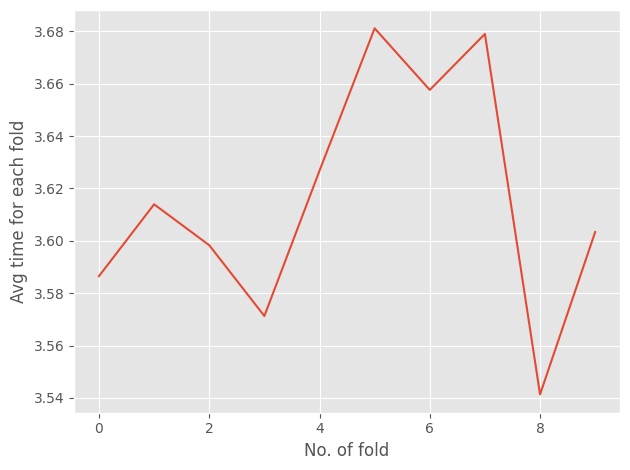

In [60]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [61]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [62]:
train_acc_bilstm_n

array([0.39934587, 0.44349959, 0.46676206, 0.48237939, 0.50171709,
       0.51148815, 0.51888799, 0.53785772, 0.54885527, 0.55789044,
       0.58139821, 0.60175797, 0.62313982, 0.63887981, 0.65805396,
       0.67179068, 0.68724449, 0.70486509, 0.71030253, 0.72497957,
       0.7451758 , 0.75731806, 0.76602616, 0.77649223, 0.78266558,
       0.79116925, 0.7995503 , 0.80707277, 0.81124284, 0.81251022,
       0.81937858, 0.82146361, 0.82322159, 0.82853638, 0.83139821,
       0.83364678, 0.83569093, 0.83883892, 0.84239575, 0.84039248,
       0.84194604, 0.84452167, 0.84897792, 0.84476697, 0.84779232,
       0.84816025, 0.84746525, 0.84926411, 0.84738349, 0.84832379,
       0.85183973, 0.85249387, 0.84987735, 0.85339329, 0.85089943,
       0.85327064, 0.8514309 , 0.85061324, 0.84893704, 0.85376123,
       0.85388389, 0.8497547 , 0.85183974, 0.85294358, 0.85139003,
       0.85163532, 0.85106296, 0.8512265 , 0.84914145, 0.8509812 ,
       0.8507359 , 0.85044971, 0.8526574 , 0.85126737, 0.85065

In [63]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [64]:
train_acc_bilstm_n

0     0.399346
1     0.443500
2     0.466762
3     0.482379
4     0.501717
        ...   
95    0.852984
96    0.850123
97    0.850245
98    0.853434
99    0.851840
Name: 0, Length: 100, dtype: float64

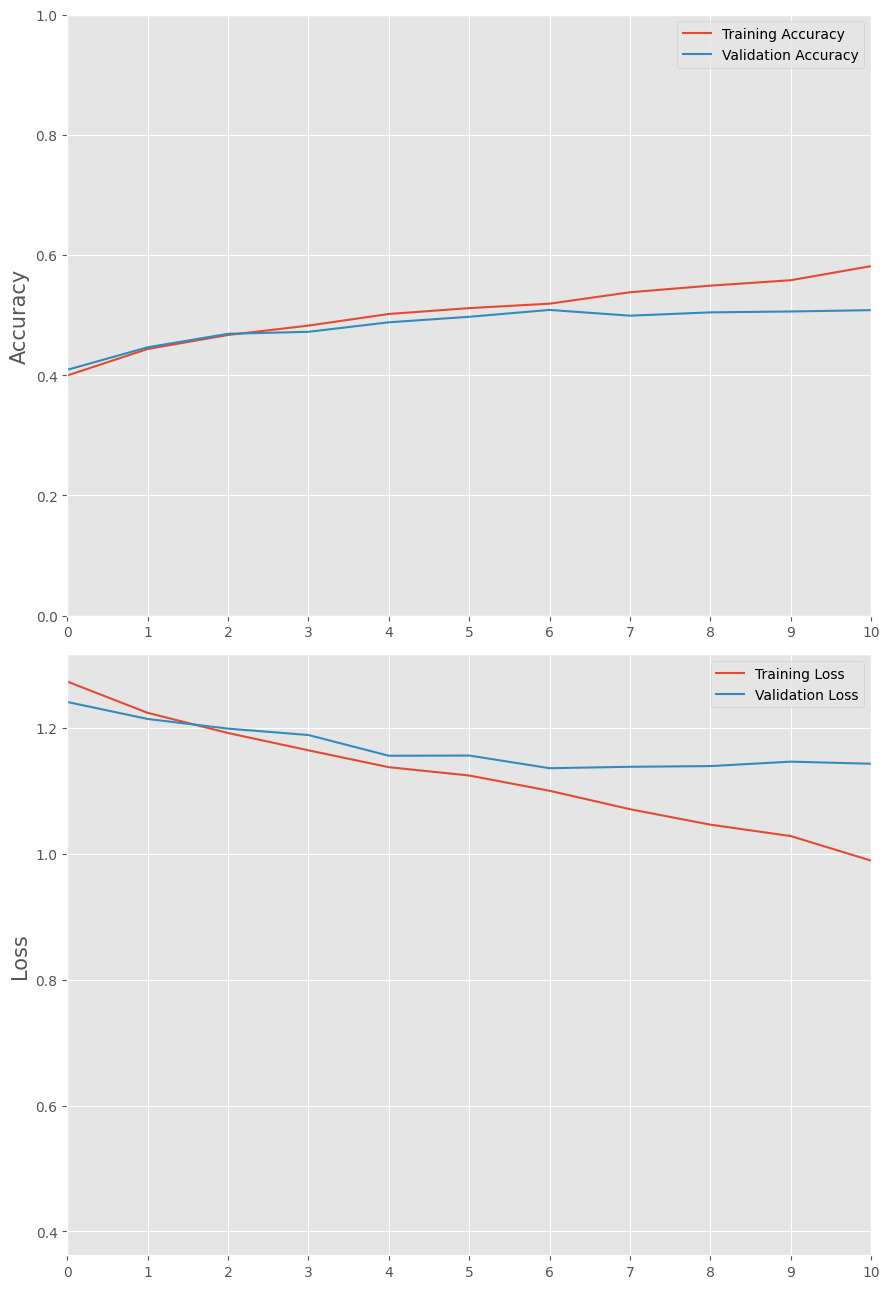

In [65]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [66]:
np.array(scores_bilstm).shape

(10, 302, 4)

In [67]:
np.array(y_test_all).shape

(10, 302)

In [68]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [69]:
y_pred_bilstm.shape

(10, 302)

In [70]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_bilstm[i]))

In [71]:
acc_scores_bilstm

[0.5894039735099338,
 0.5993377483443708,
 0.5463576158940397,
 0.5496688741721855,
 0.6125827814569537,
 0.5728476821192053,
 0.5728476821192053,
 0.543046357615894,
 0.5894039735099338,
 0.5728476821192053]

In [72]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [73]:
y_test_all_n = np.array(y_test_all)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

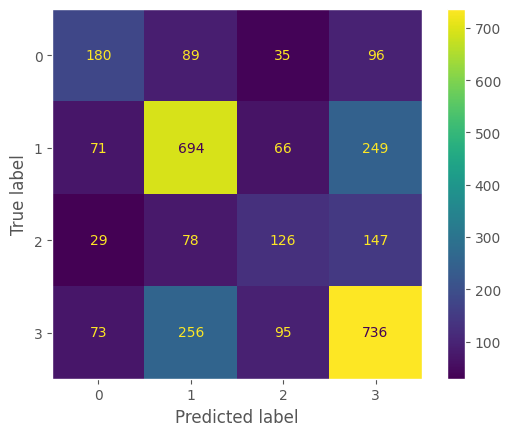

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [75]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.51      0.45      0.48       400
           1       0.62      0.64      0.63      1080
           2       0.39      0.33      0.36       380
           3       0.60      0.63      0.62      1160

    accuracy                           0.57      3020
   macro avg       0.53      0.51      0.52      3020
weighted avg       0.57      0.57      0.57      3020



# BRNN

In [76]:
import gc
gc.collect()

30293

In [77]:
# X,y = load_data(DATA_PATH)

In [78]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [79]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [80]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [81]:
import gc
gc.collect()

5

In [82]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 27s 638ms/step - loss: 1.7310 - accuracy: 0.3410 - val_loss: 1.3599 - val_accuracy: 0.3676 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 25s 629ms/step - loss: 1.6709 - accuracy: 0.3275 - val_loss: 1.2562 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 25s 628ms/step - loss: 1.6123 - accuracy: 0.3267 - val_loss: 1.2763 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 24s 614ms/step - loss: 1.5652 - accuracy: 0.3471 - val_loss: 1.3445 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 24s 624ms/step - loss: 1.5164 - accuracy: 0.3430 - val_loss: 1.2489 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 24s 623ms/step - loss: 1.4718 - accuracy: 0.3545 - val_loss: 1.2647 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 7/100
39/39 [==============

Epoch 30/100
39/39 [==============================] - 25s 643ms/step - loss: 1.2788 - accuracy: 0.3741 - val_loss: 1.2267 - val_accuracy: 0.4485 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - ETA: 0s - loss: 1.2835 - accuracy: 0.3741
Epoch 31: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 31: 24.80 seconds
39/39 [==============================] - 25s 634ms/step - loss: 1.2835 - accuracy: 0.3741 - val_loss: 1.2307 - val_accuracy: 0.4154 - lr: 4.0000e-05
Epoch 32/100
39/39 [==============================] - 24s 626ms/step - loss: 1.2772 - accuracy: 0.3876 - val_loss: 1.2279 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 33/100
39/39 [==============================] - 25s 643ms/step - loss: 1.2775 - accuracy: 0.3900 - val_loss: 1.2355 - val_accuracy: 0.4154 - lr: 8.0000e-06
Epoch 34/100
39/39 [==============================] - 25s 633ms/step - loss: 1.2775 - accuracy: 0.3810 - val_loss: 1.2280 - val_accuracy: 0.4191 - lr: 8.

Epoch 85/100
39/39 [==============================] - 27s 698ms/step - loss: 1.2834 - accuracy: 0.3655 - val_loss: 1.2331 - val_accuracy: 0.4081 - lr: 8.1920e-13
Epoch 86/100
39/39 [==============================] - ETA: 0s - loss: 1.2699 - accuracy: 0.3774
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 86: 24.31 seconds
39/39 [==============================] - 24s 619ms/step - loss: 1.2699 - accuracy: 0.3774 - val_loss: 1.2331 - val_accuracy: 0.4081 - lr: 8.1920e-13
Epoch 87/100
39/39 [==============================] - 24s 625ms/step - loss: 1.2724 - accuracy: 0.3925 - val_loss: 1.2331 - val_accuracy: 0.4081 - lr: 1.6384e-13
Epoch 88/100
39/39 [==============================] - 24s 616ms/step - loss: 1.2750 - accuracy: 0.3692 - val_loss: 1.2331 - val_accuracy: 0.4081 - lr: 1.6384e-13
Epoch 89/100
39/39 [==============================] - 24s 616ms/step - loss: 1.2788 - accuracy: 0.3786 - val_loss: 1.2331 - val_accuracy: 0.4081 - lr: 1

Epoch 41/100
39/39 [==============================] - 24s 607ms/step - loss: 1.2611 - accuracy: 0.3802 - val_loss: 1.2981 - val_accuracy: 0.3787 - lr: 3.2000e-07
Epoch 42/100
39/39 [==============================] - 28s 706ms/step - loss: 1.2740 - accuracy: 0.3884 - val_loss: 1.2980 - val_accuracy: 0.3787 - lr: 3.2000e-07
Epoch 43/100
39/39 [==============================] - 28s 699ms/step - loss: 1.2663 - accuracy: 0.3978 - val_loss: 1.2980 - val_accuracy: 0.3787 - lr: 3.2000e-07
Epoch 44/100
39/39 [==============================] - ETA: 0s - loss: 1.2687 - accuracy: 0.3868
Epoch 44: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 44: 27.93 seconds
39/39 [==============================] - 28s 718ms/step - loss: 1.2687 - accuracy: 0.3868 - val_loss: 1.2980 - val_accuracy: 0.3787 - lr: 3.2000e-07
Epoch 45/100
39/39 [==============================] - 25s 623ms/step - loss: 1.2541 - accuracy: 0.3982 - val_loss: 1.2980 - val_accuracy: 0.3787 - lr: 6.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



39/39 [==============================] - ETA: 0s - loss: 1.3223 - accuracy: 0.3573
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 11: 23.51 seconds
39/39 [==============================] - 24s 604ms/step - loss: 1.3223 - accuracy: 0.3573 - val_loss: 1.3237 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 23s 602ms/step - loss: 1.3220 - accuracy: 0.3651 - val_loss: 1.3277 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 13/100
39/39 [==============================] - 23s 593ms/step - loss: 1.3175 - accuracy: 0.3761 - val_loss: 1.3272 - val_accuracy: 0.3750 - lr: 2.0000e-04
Epoch 14/100
39/39 [==============================] - 23s 600ms/step - loss: 1.3020 - accuracy: 0.3872 - val_loss: 1.3290 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 15/100
39/39 [==============================] - 26s 663ms/step - loss: 1.3018 - accuracy: 0.3729 - val_loss: 1.3329 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 1

Epoch 39/100
39/39 [==============================] - 23s 591ms/step - loss: 1.2784 - accuracy: 0.3794 - val_loss: 1.3275 - val_accuracy: 0.3934 - lr: 3.2000e-07
Epoch 40/100
39/39 [==============================] - 23s 598ms/step - loss: 1.2907 - accuracy: 0.3794 - val_loss: 1.3273 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 41/100
39/39 [==============================] - 23s 600ms/step - loss: 1.2703 - accuracy: 0.4002 - val_loss: 1.3272 - val_accuracy: 0.3934 - lr: 3.2000e-07
Epoch 42/100
39/39 [==============================] - 23s 597ms/step - loss: 1.2790 - accuracy: 0.3962 - val_loss: 1.3275 - val_accuracy: 0.3934 - lr: 3.2000e-07
Epoch 43/100
39/39 [==============================] - ETA: 0s - loss: 1.2830 - accuracy: 0.3876
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 23.24 seconds
39/39 [==============================] - 23s 596ms/step - loss: 1.2830 - accuracy: 0.3876 - val_loss: 1.3276 - val_accuracy: 0.3934 - lr: 3.

Epoch 67/100
39/39 [==============================] - 24s 613ms/step - loss: 1.2976 - accuracy: 0.3769 - val_loss: 1.3276 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 68/100
39/39 [==============================] - ETA: 0s - loss: 1.2911 - accuracy: 0.3720
Epoch 68: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 68: 24.31 seconds
39/39 [==============================] - 24s 622ms/step - loss: 1.2911 - accuracy: 0.3720 - val_loss: 1.3276 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 69/100
39/39 [==============================] - 24s 612ms/step - loss: 1.2830 - accuracy: 0.3794 - val_loss: 1.3276 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 70/100
39/39 [==============================] - 24s 615ms/step - loss: 1.2766 - accuracy: 0.3917 - val_loss: 1.3276 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 71/100
39/39 [==============================] - 24s 607ms/step - loss: 1.2973 - accuracy: 0.3876 - val_loss: 1.3276 - val_accuracy: 0.3934 - lr: 2

Epoch 22/100
39/39 [==============================] - ETA: 0s - loss: 1.3765 - accuracy: 0.3655
Epoch 22: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 22: 24.64 seconds
39/39 [==============================] - 25s 633ms/step - loss: 1.3765 - accuracy: 0.3655 - val_loss: 1.3390 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 23/100
39/39 [==============================] - 25s 643ms/step - loss: 1.3707 - accuracy: 0.3761 - val_loss: 1.3311 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 24/100
39/39 [==============================] - 25s 639ms/step - loss: 1.3459 - accuracy: 0.3769 - val_loss: 1.3311 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 25/100
39/39 [==============================] - 25s 628ms/step - loss: 1.3692 - accuracy: 0.3630 - val_loss: 1.3287 - val_accuracy: 0.3493 - lr: 1.6000e-06
Epoch 26/100
39/39 [==============================] - 24s 622ms/step - loss: 1.3699 - accuracy: 0.3590 - val_loss: 1.3178 - val_accuracy: 0.3419 - lr: 1

Epoch 77/100
39/39 [==============================] - ETA: 0s - loss: 1.3471 - accuracy: 0.3708
Epoch 77: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 77: 27.66 seconds
39/39 [==============================] - 28s 700ms/step - loss: 1.3471 - accuracy: 0.3708 - val_loss: 1.3276 - val_accuracy: 0.3456 - lr: 1.6384e-13
Epoch 78/100
39/39 [==============================] - 25s 631ms/step - loss: 1.3628 - accuracy: 0.3590 - val_loss: 1.3276 - val_accuracy: 0.3456 - lr: 3.2768e-14
Epoch 79/100
39/39 [==============================] - 26s 661ms/step - loss: 1.3728 - accuracy: 0.3602 - val_loss: 1.3276 - val_accuracy: 0.3456 - lr: 3.2768e-14
Epoch 80/100
39/39 [==============================] - 25s 638ms/step - loss: 1.3708 - accuracy: 0.3561 - val_loss: 1.3276 - val_accuracy: 0.3456 - lr: 3.2768e-14
Epoch 81/100
39/39 [==============================] - 25s 647ms/step - loss: 1.3554 - accuracy: 0.3639 - val_loss: 1.3276 - val_accuracy: 0.3456 - lr: 3

39/39 [==============================] - 27s 688ms/step - loss: 1.2672 - accuracy: 0.3982 - val_loss: 1.2417 - val_accuracy: 0.4485 - lr: 8.0000e-06
Epoch 33/100
39/39 [==============================] - 28s 715ms/step - loss: 1.2735 - accuracy: 0.3859 - val_loss: 1.2424 - val_accuracy: 0.4449 - lr: 8.0000e-06
Epoch 34/100
39/39 [==============================] - 24s 626ms/step - loss: 1.2604 - accuracy: 0.3982 - val_loss: 1.2429 - val_accuracy: 0.4412 - lr: 8.0000e-06
Epoch 35/100
39/39 [==============================] - 26s 666ms/step - loss: 1.2732 - accuracy: 0.3917 - val_loss: 1.2430 - val_accuracy: 0.4449 - lr: 8.0000e-06
Epoch 36/100
39/39 [==============================] - ETA: 0s - loss: 1.2690 - accuracy: 0.3900
Epoch 36: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 36: 24.60 seconds
39/39 [==============================] - 25s 624ms/step - loss: 1.2690 - accuracy: 0.3900 - val_loss: 1.2428 - val_accuracy: 0.4412 - lr: 8.0000e-06
Epo

Epoch 60/100
39/39 [==============================] - 27s 695ms/step - loss: 1.2666 - accuracy: 0.3957 - val_loss: 1.2430 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - ETA: 0s - loss: 1.2778 - accuracy: 0.3888
Epoch 61: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 61: 24.67 seconds
39/39 [==============================] - 25s 630ms/step - loss: 1.2778 - accuracy: 0.3888 - val_loss: 1.2430 - val_accuracy: 0.4449 - lr: 2.5600e-09
Epoch 62/100
39/39 [==============================] - 27s 674ms/step - loss: 1.2644 - accuracy: 0.3863 - val_loss: 1.2430 - val_accuracy: 0.4449 - lr: 5.1200e-10
Epoch 63/100
39/39 [==============================] - 25s 655ms/step - loss: 1.2697 - accuracy: 0.3913 - val_loss: 1.2430 - val_accuracy: 0.4449 - lr: 5.1200e-10
Epoch 64/100
39/39 [==============================] - 26s 668ms/step - loss: 1.2756 - accuracy: 0.3782 - val_loss: 1.2430 - val_accuracy: 0.4449 - lr: 5.12

Epoch 15/100
39/39 [==============================] - 24s 610ms/step - loss: 1.3390 - accuracy: 0.3635 - val_loss: 1.2143 - val_accuracy: 0.4338 - lr: 4.0000e-05
Epoch 16/100
39/39 [==============================] - 24s 610ms/step - loss: 1.3414 - accuracy: 0.3814 - val_loss: 1.2183 - val_accuracy: 0.4449 - lr: 4.0000e-05
Epoch 17/100
39/39 [==============================] - 24s 622ms/step - loss: 1.3440 - accuracy: 0.3487 - val_loss: 1.2167 - val_accuracy: 0.4485 - lr: 4.0000e-05
Epoch 18/100
39/39 [==============================] - ETA: 0s - loss: 1.3303 - accuracy: 0.3626
Epoch 18: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 18: 25.89 seconds
39/39 [==============================] - 26s 660ms/step - loss: 1.3303 - accuracy: 0.3626 - val_loss: 1.2161 - val_accuracy: 0.4375 - lr: 4.0000e-05
Epoch 19/100
39/39 [==============================] - 24s 627ms/step - loss: 1.3236 - accuracy: 0.3737 - val_loss: 1.2164 - val_accuracy: 0.4338 - lr: 8.

Epoch 43/100
39/39 [==============================] - ETA: 0s - loss: 1.3434 - accuracy: 0.3569
Epoch 43: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 43: 24.34 seconds
39/39 [==============================] - 24s 623ms/step - loss: 1.3434 - accuracy: 0.3569 - val_loss: 1.2147 - val_accuracy: 0.4412 - lr: 1.2800e-08
Epoch 44/100
39/39 [==============================] - 25s 647ms/step - loss: 1.3252 - accuracy: 0.3757 - val_loss: 1.2146 - val_accuracy: 0.4412 - lr: 2.5600e-09
Epoch 45/100
39/39 [==============================] - 28s 715ms/step - loss: 1.3363 - accuracy: 0.3778 - val_loss: 1.2147 - val_accuracy: 0.4412 - lr: 2.5600e-09
Epoch 46/100
39/39 [==============================] - 27s 707ms/step - loss: 1.3234 - accuracy: 0.3782 - val_loss: 1.2147 - val_accuracy: 0.4412 - lr: 2.5600e-09
Epoch 47/100
39/39 [==============================] - 28s 726ms/step - loss: 1.3240 - accuracy: 0.3610 - val_loss: 1.2147 - val_accuracy: 0.4412 - lr: 2

Epoch 98/100
39/39 [==============================] - ETA: 0s - loss: 1.3202 - accuracy: 0.3810
Epoch 98: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 98: 23.95 seconds
39/39 [==============================] - 24s 614ms/step - loss: 1.3202 - accuracy: 0.3810 - val_loss: 1.2147 - val_accuracy: 0.4412 - lr: 2.6214e-16
Epoch 99/100
39/39 [==============================] - 25s 631ms/step - loss: 1.3429 - accuracy: 0.3761 - val_loss: 1.2147 - val_accuracy: 0.4412 - lr: 5.2429e-17
Epoch 100/100
10/10 [==============================] - 2s 184ms/step
Training on fold 7/10...
Epoch 1/100
39/39 [==============================] - 25s 617ms/step - loss: 1.7774 - accuracy: 0.3361 - val_loss: 1.3516 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 24s 618ms/step - loss: 1.6772 - accuracy: 0.3385 - val_loss: 1.4318 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 27s 697ms/step 

Epoch 54/100
39/39 [==============================] - ETA: 0s - loss: 1.2682 - accuracy: 0.3925
Epoch 54: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 54: 23.47 seconds
39/39 [==============================] - 23s 602ms/step - loss: 1.2682 - accuracy: 0.3925 - val_loss: 1.2499 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 55/100
39/39 [==============================] - 24s 615ms/step - loss: 1.2664 - accuracy: 0.3921 - val_loss: 1.2499 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 56/100
39/39 [==============================] - 24s 608ms/step - loss: 1.2732 - accuracy: 0.4056 - val_loss: 1.2499 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 57/100
39/39 [==============================] - 25s 627ms/step - loss: 1.2618 - accuracy: 0.3921 - val_loss: 1.2499 - val_accuracy: 0.4154 - lr: 2.5600e-09
Epoch 58/100
39/39 [==============================] - 26s 673ms/step - loss: 1.2742 - accuracy: 0.3994 - val_loss: 1.2499 - val_accuracy: 0.4154 - lr: 2

Epoch 9/100
39/39 [==============================] - 24s 628ms/step - loss: 1.3913 - accuracy: 0.3377 - val_loss: 1.2493 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 10/100
39/39 [==============================] - 24s 622ms/step - loss: 1.3408 - accuracy: 0.3524 - val_loss: 1.2654 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 24s 615ms/step - loss: 1.3457 - accuracy: 0.3549 - val_loss: 1.2514 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 24s 606ms/step - loss: 1.3329 - accuracy: 0.3692 - val_loss: 1.2507 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - 24s 621ms/step - loss: 1.3155 - accuracy: 0.3626 - val_loss: 1.2271 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 14/100
39/39 [==============================] - 24s 611ms/step - loss: 1.3045 - accuracy: 0.3769 - val_loss: 1.2291 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 15/100
39/39 [==============================] -

Epoch 37/100
39/39 [==============================] - ETA: 0s - loss: 1.2796 - accuracy: 0.3794
Epoch 37: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 37: 23.64 seconds
39/39 [==============================] - 24s 602ms/step - loss: 1.2796 - accuracy: 0.3794 - val_loss: 1.2262 - val_accuracy: 0.4154 - lr: 1.6000e-06
Epoch 38/100
39/39 [==============================] - 23s 597ms/step - loss: 1.2744 - accuracy: 0.3827 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 3.2000e-07
Epoch 39/100
39/39 [==============================] - 23s 595ms/step - loss: 1.2730 - accuracy: 0.3769 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 3.2000e-07
Epoch 40/100
39/39 [==============================] - 23s 592ms/step - loss: 1.2839 - accuracy: 0.3778 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 3.2000e-07
Epoch 41/100
39/39 [==============================] - 23s 599ms/step - loss: 1.2763 - accuracy: 0.3778 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 3.

Epoch 92/100
39/39 [==============================] - ETA: 0s - loss: 1.2723 - accuracy: 0.3790
Epoch 92: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 92: 23.74 seconds
39/39 [==============================] - 24s 608ms/step - loss: 1.2723 - accuracy: 0.3790 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 3.2768e-14
Epoch 93/100
39/39 [==============================] - 23s 595ms/step - loss: 1.2757 - accuracy: 0.3753 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 6.5536e-15
Epoch 94/100
39/39 [==============================] - 23s 596ms/step - loss: 1.2674 - accuracy: 0.3818 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 6.5536e-15
Epoch 95/100
39/39 [==============================] - 24s 604ms/step - loss: 1.2774 - accuracy: 0.3761 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 6.5536e-15
Epoch 96/100
39/39 [==============================] - 23s 600ms/step - loss: 1.2774 - accuracy: 0.3851 - val_loss: 1.2263 - val_accuracy: 0.4154 - lr: 6.

Epoch 48/100
39/39 [==============================] - 23s 600ms/step - loss: 1.2665 - accuracy: 0.3843 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 49/100
39/39 [==============================] - 23s 594ms/step - loss: 1.2679 - accuracy: 0.3818 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 50/100
39/39 [==============================] - ETA: 0s - loss: 1.2732 - accuracy: 0.3831
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 23.94 seconds
39/39 [==============================] - 24s 613ms/step - loss: 1.2732 - accuracy: 0.3831 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 6.4000e-08
Epoch 51/100
39/39 [==============================] - 23s 599ms/step - loss: 1.2817 - accuracy: 0.3753 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 1.2800e-08
Epoch 52/100
39/39 [==============================] - 23s 601ms/step - loss: 1.2696 - accuracy: 0.3827 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 1

Time taken for epoch 75: 25.67 seconds
39/39 [==============================] - 26s 649ms/step - loss: 1.2740 - accuracy: 0.3774 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 2.0480e-11
Epoch 76/100
39/39 [==============================] - 23s 601ms/step - loss: 1.2786 - accuracy: 0.3863 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 4.0960e-12
Epoch 77/100
39/39 [==============================] - 23s 598ms/step - loss: 1.2796 - accuracy: 0.3745 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 4.0960e-12
Epoch 78/100
39/39 [==============================] - 24s 606ms/step - loss: 1.2761 - accuracy: 0.3945 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 4.0960e-12
Epoch 79/100
39/39 [==============================] - 24s 608ms/step - loss: 1.2708 - accuracy: 0.3700 - val_loss: 1.2155 - val_accuracy: 0.4375 - lr: 4.0960e-12
Epoch 80/100
39/39 [==============================] - ETA: 0s - loss: 1.2815 - accuracy: 0.3737
Epoch 80: ReduceLROnPlateau reducing learning rate to 8.192000897078

Epoch 3/100
39/39 [==============================] - 24s 613ms/step - loss: 1.5884 - accuracy: 0.3475 - val_loss: 1.2757 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 24s 605ms/step - loss: 1.5368 - accuracy: 0.3352 - val_loss: 1.2864 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 24s 615ms/step - loss: 1.4838 - accuracy: 0.3438 - val_loss: 1.2738 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 1.4485 - accuracy: 0.3397
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 23.41 seconds
39/39 [==============================] - 23s 600ms/step - loss: 1.4485 - accuracy: 0.3397 - val_loss: 1.2762 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 24s 606ms/step - loss: 1.3923 - accuracy: 0.3581 - val_loss: 1.2506 - val_accuracy: 0.3824 - lr: 2.0000e-04
Epoch 8/100
3

Epoch 31/100
39/39 [==============================] - ETA: 0s - loss: 1.3744 - accuracy: 0.3614
Epoch 31: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 31: 23.81 seconds
39/39 [==============================] - 24s 611ms/step - loss: 1.3744 - accuracy: 0.3614 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 3.2000e-07
Epoch 32/100
39/39 [==============================] - 26s 662ms/step - loss: 1.3646 - accuracy: 0.3704 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 33/100
39/39 [==============================] - 23s 602ms/step - loss: 1.3712 - accuracy: 0.3667 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 34/100
39/39 [==============================] - 24s 605ms/step - loss: 1.3785 - accuracy: 0.3467 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 6.4000e-08
Epoch 35/100
39/39 [==============================] - 24s 608ms/step - loss: 1.3812 - accuracy: 0.3479 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 6.

Epoch 86/100
39/39 [==============================] - ETA: 0s - loss: 1.3668 - accuracy: 0.3684
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 86: 23.40 seconds
39/39 [==============================] - 23s 600ms/step - loss: 1.3668 - accuracy: 0.3684 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 6.5536e-15
Epoch 87/100
39/39 [==============================] - 23s 601ms/step - loss: 1.3608 - accuracy: 0.3565 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 1.3107e-15
Epoch 88/100
39/39 [==============================] - 23s 595ms/step - loss: 1.3965 - accuracy: 0.3679 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 1.3107e-15
Epoch 89/100
39/39 [==============================] - 24s 605ms/step - loss: 1.3949 - accuracy: 0.3422 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 1.3107e-15
Epoch 90/100
39/39 [==============================] - 23s 601ms/step - loss: 1.3782 - accuracy: 0.3577 - val_loss: 1.2521 - val_accuracy: 0.4007 - lr: 1

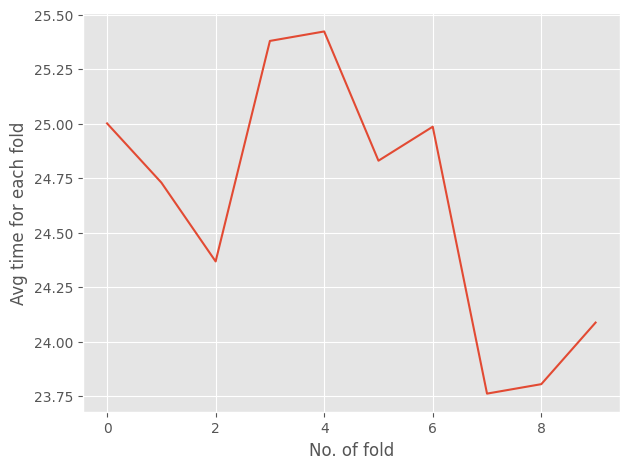

In [83]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [84]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [85]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

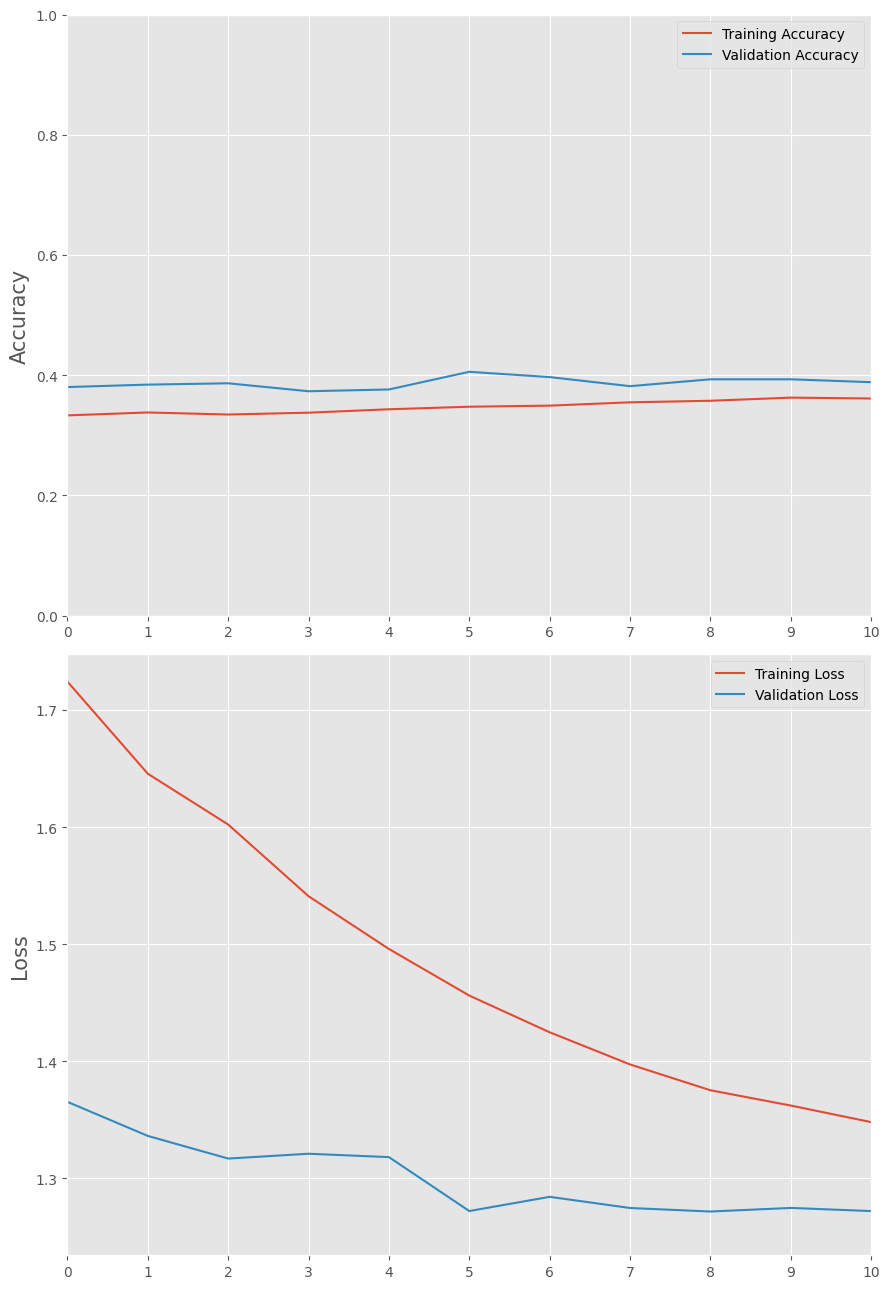

In [86]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [87]:
import gc
gc.collect()

23642

In [88]:
np.array(scores_birnn).shape

(10, 302, 4)

In [89]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [90]:
y_pred_birnn.shape

(10, 302)

In [91]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_birnn[i]))

In [92]:
acc_scores_birnn

[0.347682119205298,
 0.4470198675496689,
 0.4139072847682119,
 0.4105960264900662,
 0.4271523178807947,
 0.39403973509933776,
 0.32781456953642385,
 0.4271523178807947,
 0.4139072847682119,
 0.4205298013245033]

In [93]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [94]:
acc_birnn = np.mean(acc_scores_birnn)

In [95]:
acc_birnn

0.40298013245033115

In [96]:
y_test_all_n = np.array(y_test_all)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [97]:
import gc
gc.collect()

0

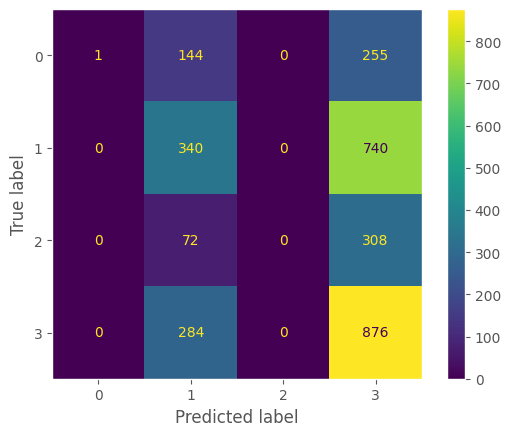

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [99]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       400
           1       0.40      0.31      0.35      1080
           2       0.00      0.00      0.00       380
           3       0.40      0.76      0.52      1160

    accuracy                           0.40      3020
   macro avg       0.45      0.27      0.22      3020
weighted avg       0.43      0.40      0.33      3020



C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DSAI\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MobileNetV2

In [107]:
import gc
gc.collect()

0

In [108]:
X,y = load_data(DATA_PATH)

Data succesfully loaded!


In [8]:
X.shape

(3020, 259, 100)

In [9]:
X = np.expand_dims(X, axis=-1)

In [10]:
X_n = np.concatenate([X,X,X], axis= -1)

In [11]:
X_n.shape

(3020, 259, 100, 3)

In [12]:
y.shape

(3020,)

In [13]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [15]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [16]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 4s 24ms/step - loss: 1.3799 - accuracy: 0.4170 - val_loss: 1.1659 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1285 - accuracy: 0.4918 - val_loss: 1.1524 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0991 - accuracy: 0.5139 - val_loss: 1.1176 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0510 - accuracy: 0.5298 - val_loss: 1.1475 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0116 - accuracy: 0.5548 - val_loss: 1.1353 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9867 - accuracy: 0.5720 - val_loss: 1.0940 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 30/100
77/77 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.8577
Epoch 30: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 30: 1.27 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.4300 - accuracy: 0.8577 - val_loss: 1.0976 - val_accuracy: 0.5588 - lr: 4.0000e-05
Epoch 31/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4249 - accuracy: 0.8594 - val_loss: 1.0988 - val_accuracy: 0.5588 - lr: 8.0000e-06
Epoch 32/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4291 - accuracy: 0.8618 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 8.0000e-06
Epoch 33/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4237 - accuracy: 0.8696 - val_loss: 1.1008 - val_accuracy: 0.5551 - lr: 8.0000e-06
Epoch 34/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4180 - accuracy: 0.8606 - val_loss: 1.1005 - val_accuracy: 0.5551 - lr: 8.0000e-06
Ep

Epoch 58/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4176 - accuracy: 0.8594 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4317 - accuracy: 0.8590 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 2.5600e-09
Epoch 60/100
74/77 [===========================>..] - ETA: 0s - loss: 0.4137 - accuracy: 0.8594
Epoch 60: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 60: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.4150 - accuracy: 0.8585 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4116 - accuracy: 0.8696 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 5.1200e-10
Epoch 62/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4252 - accuracy: 0.8577 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 5.1200e-10
Epoc

Epoch 86/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4258 - accuracy: 0.8577 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 1.6384e-13
Epoch 87/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4258 - accuracy: 0.8594 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 1.6384e-13
Epoch 88/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4282 - accuracy: 0.8573 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 1.6384e-13
Epoch 89/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4260 - accuracy: 0.8549 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 1.6384e-13
Epoch 90/100
74/77 [===========================>..] - ETA: 0s - loss: 0.4222 - accuracy: 0.8640
Epoch 90: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 90: 1.28 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.4239 - accuracy: 0.8618 - val_loss: 1.1008 - val_accuracy: 0.5515 - lr: 1.6384e-13
E

77/77 [==============================] - 1s 16ms/step - loss: 0.5893 - accuracy: 0.7776 - val_loss: 1.0546 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - 1s 16ms/step - loss: 0.5979 - accuracy: 0.7760 - val_loss: 1.0546 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 1s 16ms/step - loss: 0.5981 - accuracy: 0.7829 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 45/100
76/77 [============================>.] - ETA: 0s - loss: 0.5952 - accuracy: 0.7915
Epoch 45: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 45: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.5955 - accuracy: 0.7911 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 3.2000e-07
Epoch 46/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5949 - accuracy: 0.7866 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 6.4000e-08
Epoch 47/100
77

Epoch 70/100
76/77 [============================>.] - ETA: 0s - loss: 0.5923 - accuracy: 0.7899
Epoch 70: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 70: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.5915 - accuracy: 0.7903 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 1.0240e-10
Epoch 71/100
77/77 [==============================] - 1s 16ms/step - loss: 0.5903 - accuracy: 0.7841 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 2.0480e-11
Epoch 72/100
77/77 [==============================] - 1s 16ms/step - loss: 0.5895 - accuracy: 0.7825 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 2.0480e-11
Epoch 73/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6011 - accuracy: 0.7747 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 2.0480e-11
Epoch 74/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5910 - accuracy: 0.7862 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 2.0480e-11
E

Epoch 98/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5973 - accuracy: 0.7784 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 6.5536e-15
Epoch 99/100
77/77 [==============================] - 1s 16ms/step - loss: 0.5956 - accuracy: 0.7768 - val_loss: 1.0545 - val_accuracy: 0.5515 - lr: 6.5536e-15
Epoch 100/100
76/77 [============================>.] - ETA: 0s - loss: 0.5920 - accuracy: 0.7878
Epoch 100: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 100: 1.28 seconds
10/10 [==============================] - 0s 13ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 3s 22ms/step - loss: 1.3911 - accuracy: 0.4092 - val_loss: 1.1510 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1424 - accuracy: 0.4853 - val_loss: 1.1992 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 16ms/step - loss: 1.

Epoch 27/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3888 - accuracy: 0.8659 - val_loss: 1.1947 - val_accuracy: 0.5037 - lr: 4.0000e-05
Epoch 28/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3776 - accuracy: 0.8790 - val_loss: 1.1954 - val_accuracy: 0.5110 - lr: 4.0000e-05
Epoch 29/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3857 - accuracy: 0.8692 - val_loss: 1.2019 - val_accuracy: 0.5074 - lr: 4.0000e-05
Epoch 30/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3748 - accuracy: 0.8765 - val_loss: 1.2026 - val_accuracy: 0.5147 - lr: 4.0000e-05
Epoch 31/100
75/77 [============================>.] - ETA: 0s - loss: 0.3875 - accuracy: 0.8637
Epoch 31: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 31: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.3876 - accuracy: 0.8639 - val_loss: 1.2024 - val_accuracy: 0.5074 - lr: 4.0000e-05
Ep

Epoch 55/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3660 - accuracy: 0.8794 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 1.2800e-08
Epoch 56/100
74/77 [===========================>..] - ETA: 0s - loss: 0.3667 - accuracy: 0.8784
Epoch 56: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 56: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.3649 - accuracy: 0.8798 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3639 - accuracy: 0.8794 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 2.5600e-09
Epoch 58/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3694 - accuracy: 0.8774 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3612 - accuracy: 0.8827 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 2.5600e-09
E

Epoch 83/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3698 - accuracy: 0.8782 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 8.1920e-13
Epoch 84/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3620 - accuracy: 0.8814 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 8.1920e-13
Epoch 85/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3633 - accuracy: 0.8847 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 8.1920e-13
Epoch 86/100
76/77 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8923
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 86: 1.28 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.3569 - accuracy: 0.8908 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 8.1920e-13
Epoch 87/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3691 - accuracy: 0.8823 - val_loss: 1.2031 - val_accuracy: 0.5147 - lr: 1.6384e-13
E

Epoch 40/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3650 - accuracy: 0.8786 - val_loss: 1.1739 - val_accuracy: 0.5662 - lr: 1.6000e-06
Epoch 41/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3633 - accuracy: 0.8769 - val_loss: 1.1736 - val_accuracy: 0.5662 - lr: 1.6000e-06
Epoch 42/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3684 - accuracy: 0.8847 - val_loss: 1.1738 - val_accuracy: 0.5662 - lr: 1.6000e-06
Epoch 43/100
75/77 [============================>.] - ETA: 0s - loss: 0.3650 - accuracy: 0.8833
Epoch 43: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 43: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.3649 - accuracy: 0.8835 - val_loss: 1.1736 - val_accuracy: 0.5662 - lr: 1.6000e-06
Epoch 44/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3740 - accuracy: 0.8737 - val_loss: 1.1735 - val_accuracy: 0.5662 - lr: 3.2000e-07
Ep

Epoch 68/100
75/77 [============================>.] - ETA: 0s - loss: 0.3676 - accuracy: 0.8796
Epoch 68: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 68: 1.25 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.3679 - accuracy: 0.8806 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3619 - accuracy: 0.8814 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 1.0240e-10
Epoch 70/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3700 - accuracy: 0.8794 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 1.0240e-10
Epoch 71/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3725 - accuracy: 0.8696 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 1.0240e-10
Epoch 72/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3648 - accuracy: 0.8814 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 1.0240e-10
E

Epoch 96/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3663 - accuracy: 0.8855 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 3.2768e-14
Epoch 97/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3658 - accuracy: 0.8868 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 3.2768e-14
Epoch 98/100
76/77 [============================>.] - ETA: 0s - loss: 0.3647 - accuracy: 0.8803
Epoch 98: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 98: 1.25 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.3650 - accuracy: 0.8802 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 3.2768e-14
Epoch 99/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3747 - accuracy: 0.8700 - val_loss: 1.1736 - val_accuracy: 0.5625 - lr: 6.5536e-15
Epoch 100/100
10/10 [==============================] - 0s 14ms/step
Training on fold 5/10...
Epoch 1/100
77/77 [==============================] - 3s 22ms/step - l

Epoch 25/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4304 - accuracy: 0.8500 - val_loss: 1.2397 - val_accuracy: 0.5478 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4221 - accuracy: 0.8536 - val_loss: 1.2751 - val_accuracy: 0.5110 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4157 - accuracy: 0.8565 - val_loss: 1.2518 - val_accuracy: 0.5257 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4123 - accuracy: 0.8540 - val_loss: 1.2256 - val_accuracy: 0.5331 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4015 - accuracy: 0.8651 - val_loss: 1.2851 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 30/100
74/77 [===========================>..] - ETA: 0s - loss: 0.3988 - accuracy: 0.8615
Epoch 30: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 30: 1

Epoch 53/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3447 - accuracy: 0.8921 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 6.4000e-08
Epoch 54/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3601 - accuracy: 0.8851 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 6.4000e-08
Epoch 55/100
76/77 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.8873
Epoch 55: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 55: 1.28 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.3518 - accuracy: 0.8876 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 6.4000e-08
Epoch 56/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3459 - accuracy: 0.8872 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3547 - accuracy: 0.8863 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 1.2800e-08
E

Epoch 81/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3583 - accuracy: 0.8851 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 4.0960e-12
Epoch 82/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3565 - accuracy: 0.8827 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 4.0960e-12
Epoch 83/100
77/77 [==============================] - 1s 16ms/step - loss: 0.3538 - accuracy: 0.8847 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 4.0960e-12
Epoch 84/100
77/77 [==============================] - 1s 17ms/step - loss: 0.3528 - accuracy: 0.8831 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 4.0960e-12
Epoch 85/100
74/77 [===========================>..] - ETA: 0s - loss: 0.3455 - accuracy: 0.8948
Epoch 85: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 85: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.3488 - accuracy: 0.8929 - val_loss: 1.2780 - val_accuracy: 0.5147 - lr: 4.0960e-12
Ep

77/77 [==============================] - 1s 16ms/step - loss: 0.8956 - accuracy: 0.6255 - val_loss: 1.1012 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 16ms/step - loss: 0.8476 - accuracy: 0.6476 - val_loss: 1.0826 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 1s 16ms/step - loss: 0.8284 - accuracy: 0.6419 - val_loss: 1.1538 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 1s 16ms/step - loss: 0.8016 - accuracy: 0.6688 - val_loss: 1.0844 - val_accuracy: 0.5074 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7830 - accuracy: 0.6811 - val_loss: 1.1271 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7562 - accuracy: 0.6868 - val_loss: 1.1331 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 0.7375 

Epoch 65/100
74/77 [===========================>..] - ETA: 0s - loss: 0.4759 - accuracy: 0.8370
Epoch 65: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 65: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.4763 - accuracy: 0.8361 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4732 - accuracy: 0.8344 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 1.0240e-10
Epoch 67/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4769 - accuracy: 0.8303 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 1.0240e-10
Epoch 68/100
77/77 [==============================] - 1s 17ms/step - loss: 0.4768 - accuracy: 0.8307 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 1.0240e-10
Epoch 69/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4661 - accuracy: 0.8414 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 1.0240e-10
E

Epoch 93/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4617 - accuracy: 0.8455 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 3.2768e-14
Epoch 94/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4703 - accuracy: 0.8397 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 3.2768e-14
Epoch 95/100
75/77 [============================>.] - ETA: 0s - loss: 0.4726 - accuracy: 0.8296
Epoch 95: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 95: 1.28 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.4707 - accuracy: 0.8307 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 3.2768e-14
Epoch 96/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4540 - accuracy: 0.8496 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 6.5536e-15
Epoch 97/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4644 - accuracy: 0.8426 - val_loss: 1.0969 - val_accuracy: 0.5110 - lr: 6.5536e-15
Ep

Epoch 49/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6332 - accuracy: 0.7604 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 50/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6412 - accuracy: 0.7580 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 51/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6452 - accuracy: 0.7596 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 52/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6354 - accuracy: 0.7633 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoch 53/100
76/77 [============================>.] - ETA: 0s - loss: 0.6377 - accuracy: 0.7586
Epoch 53: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 53: 1.29 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.6383 - accuracy: 0.7588 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 2.5600e-09
Epoc

Epoch 77/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6393 - accuracy: 0.7682 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 8.1920e-13
Epoch 78/100
75/77 [============================>.] - ETA: 0s - loss: 0.6384 - accuracy: 0.7588
Epoch 78: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 78: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.6379 - accuracy: 0.7588 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 8.1920e-13
Epoch 79/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6481 - accuracy: 0.7559 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 1.6384e-13
Epoch 80/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6387 - accuracy: 0.7559 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 1.6384e-13
Epoch 81/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6346 - accuracy: 0.7674 - val_loss: 1.0673 - val_accuracy: 0.4926 - lr: 1.6384e-13
E

Epoch 5/100
77/77 [==============================] - 1s 16ms/step - loss: 1.0183 - accuracy: 0.5556 - val_loss: 1.1474 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 16ms/step - loss: 1.0090 - accuracy: 0.5687 - val_loss: 1.1494 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9619 - accuracy: 0.5769 - val_loss: 1.1341 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 1s 16ms/step - loss: 0.9389 - accuracy: 0.5961 - val_loss: 1.1198 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 1s 17ms/step - loss: 0.8797 - accuracy: 0.6288 - val_loss: 1.1841 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 1s 16ms/step - loss: 0.8733 - accuracy: 0.6353 - val_loss: 1.1354 - val_accuracy: 0.4963 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 1s 16ms/step - 

Epoch 34/100
75/77 [============================>.] - ETA: 0s - loss: 0.5998 - accuracy: 0.7850
Epoch 34: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 34: 1.28 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.5971 - accuracy: 0.7858 - val_loss: 1.1738 - val_accuracy: 0.5037 - lr: 8.0000e-06
Epoch 35/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6037 - accuracy: 0.7866 - val_loss: 1.1738 - val_accuracy: 0.5000 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6032 - accuracy: 0.7776 - val_loss: 1.1740 - val_accuracy: 0.5000 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6043 - accuracy: 0.7813 - val_loss: 1.1740 - val_accuracy: 0.5000 - lr: 1.6000e-06
Epoch 38/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5998 - accuracy: 0.7829 - val_loss: 1.1745 - val_accuracy: 0.5037 - lr: 1.6000e-06
E

Epoch 62/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5981 - accuracy: 0.7743 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 5.1200e-10
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6031 - accuracy: 0.7845 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 5.1200e-10
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 0.5950 - accuracy: 0.7903
Epoch 64: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 64: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.5941 - accuracy: 0.7907 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 5.1200e-10
Epoch 65/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6002 - accuracy: 0.7817 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 1.0240e-10
Epoch 66/100
77/77 [==============================] - 1s 16ms/step - loss: 0.5945 - accuracy: 0.7837 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 1.0240e-10
E

Epoch 90/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6013 - accuracy: 0.7772 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 3.2768e-14
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 0.5949 - accuracy: 0.7858 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 3.2768e-14
Epoch 92/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6051 - accuracy: 0.7702 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 3.2768e-14
Epoch 93/100
77/77 [==============================] - 1s 16ms/step - loss: 0.6021 - accuracy: 0.7805 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 3.2768e-14
Epoch 94/100
74/77 [===========================>..] - ETA: 0s - loss: 0.5986 - accuracy: 0.7922
Epoch 94: ReduceLROnPlateau reducing learning rate to 6.553600300244697e-15.
Time taken for epoch 94: 1.27 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.5989 - accuracy: 0.7915 - val_loss: 1.1741 - val_accuracy: 0.5000 - lr: 3.2768e-14
Ep

77/77 [==============================] - 1s 16ms/step - loss: 0.7382 - accuracy: 0.7097 - val_loss: 1.0436 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7342 - accuracy: 0.7183 - val_loss: 1.0339 - val_accuracy: 0.5515 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7335 - accuracy: 0.7261 - val_loss: 1.0369 - val_accuracy: 0.5478 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7313 - accuracy: 0.7224 - val_loss: 1.0359 - val_accuracy: 0.5551 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7342 - accuracy: 0.7285 - val_loss: 1.0427 - val_accuracy: 0.5625 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7169 - accuracy: 0.7269 - val_loss: 1.0360 - val_accuracy: 0.5515 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] -

Epoch 74/100
77/77 [==============================] - 1s 17ms/step - loss: 0.6973 - accuracy: 0.7383 - val_loss: 1.0384 - val_accuracy: 0.5588 - lr: 4.0960e-12
Epoch 75/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7074 - accuracy: 0.7273 - val_loss: 1.0384 - val_accuracy: 0.5588 - lr: 4.0960e-12
Epoch 76/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7095 - accuracy: 0.7318 - val_loss: 1.0384 - val_accuracy: 0.5588 - lr: 4.0960e-12
Epoch 77/100
75/77 [============================>.] - ETA: 0s - loss: 0.7110 - accuracy: 0.7142
Epoch 77: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 77: 1.25 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.7108 - accuracy: 0.7146 - val_loss: 1.0384 - val_accuracy: 0.5588 - lr: 4.0960e-12
Epoch 78/100
77/77 [==============================] - 1s 16ms/step - loss: 0.7067 - accuracy: 0.7289 - val_loss: 1.0384 - val_accuracy: 0.5588 - lr: 8.1920e-13
Ep

Epoch 2/100
77/77 [==============================] - 1s 17ms/step - loss: 1.1449 - accuracy: 0.4836 - val_loss: 1.1958 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0895 - accuracy: 0.5184 - val_loss: 1.1755 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0628 - accuracy: 0.5270 - val_loss: 1.2176 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 1s 17ms/step - loss: 1.0331 - accuracy: 0.5425 - val_loss: 1.2265 - val_accuracy: 0.4338 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 1s 16ms/step - loss: 1.0094 - accuracy: 0.5650 - val_loss: 1.1448 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 1s 17ms/step - loss: 0.9543 - accuracy: 0.5842 - val_loss: 1.1573 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 1s 16ms/step - lo

Epoch 59/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2786 - accuracy: 0.9182 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 60/100
75/77 [============================>.] - ETA: 0s - loss: 0.2878 - accuracy: 0.9175
Epoch 60: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 60: 1.27 seconds
77/77 [==============================] - 1s 17ms/step - loss: 0.2866 - accuracy: 0.9182 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 1.2800e-08
Epoch 61/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2875 - accuracy: 0.9137 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2819 - accuracy: 0.9158 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2776 - accuracy: 0.9174 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 2.5600e-09
E

Epoch 87/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2788 - accuracy: 0.9174 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 8.1920e-13
Epoch 88/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2772 - accuracy: 0.9162 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 8.1920e-13
Epoch 89/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2825 - accuracy: 0.9125 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 8.1920e-13
Epoch 90/100
77/77 [==============================] - ETA: 0s - loss: 0.2798 - accuracy: 0.9146
Epoch 90: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 90: 1.27 seconds
77/77 [==============================] - 1s 16ms/step - loss: 0.2798 - accuracy: 0.9146 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 8.1920e-13
Epoch 91/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2803 - accuracy: 0.9146 - val_loss: 1.2327 - val_accuracy: 0.5257 - lr: 1.6384e-13
E

In [18]:
import gc
gc.collect()

0

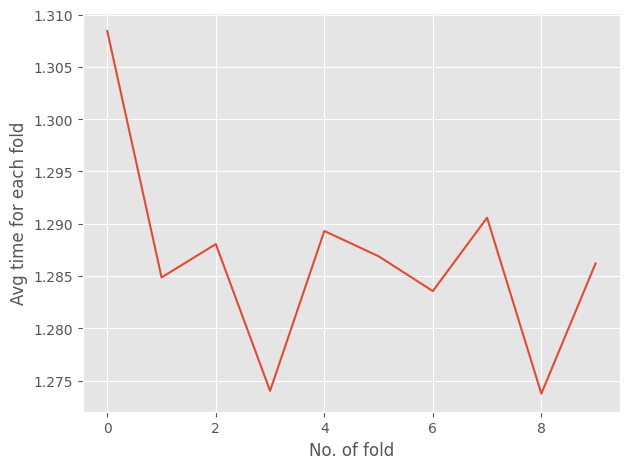

In [19]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [20]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [21]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [22]:
train_acc_mnv2_n

0     0.410425
1     0.484137
2     0.509403
3     0.533974
4     0.553352
        ...   
95    0.832747
96    0.833115
97    0.829518
98    0.831153
99    0.833074
Name: 0, Length: 100, dtype: float64

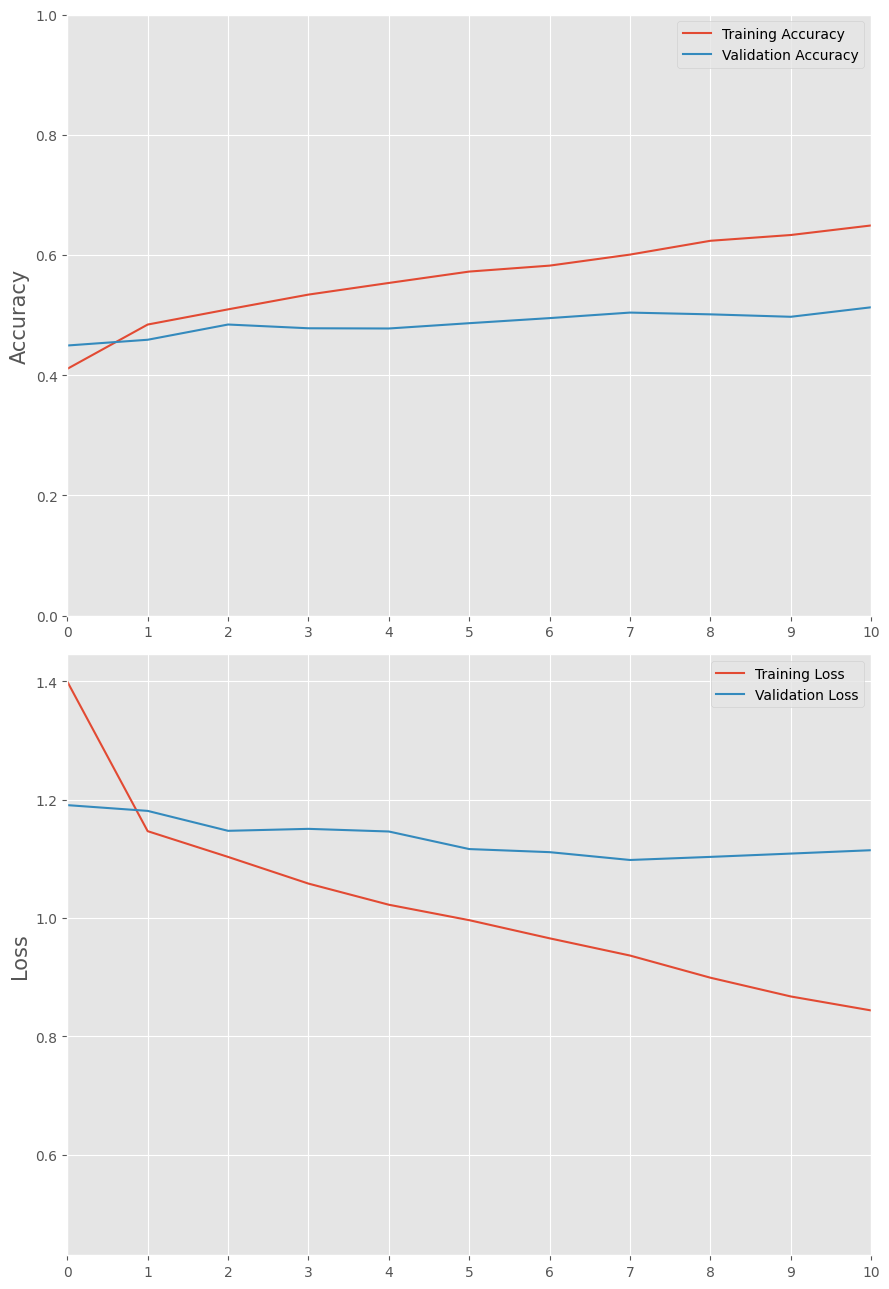

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [24]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [25]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [26]:
y_pred_mnv2.shape

(10, 302)

In [27]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_mnv2[i]))

In [28]:
import gc
gc.collect()

3532

In [29]:
acc_scores_mnv2

[0.5397350993377483,
 0.5529801324503312,
 0.5695364238410596,
 0.5662251655629139,
 0.5364238410596026,
 0.5827814569536424,
 0.5629139072847682,
 0.5562913907284768,
 0.543046357615894,
 0.5364238410596026]

In [30]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [31]:
y_test_all_n = np.array(y_test_all)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

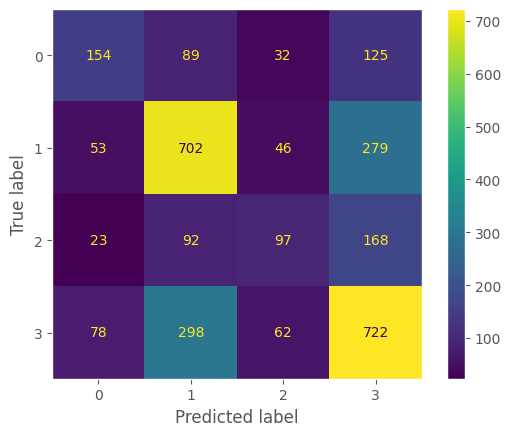

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [33]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.50      0.39      0.44       400
           1       0.59      0.65      0.62      1080
           2       0.41      0.26      0.31       380
           3       0.56      0.62      0.59      1160

    accuracy                           0.55      3020
   macro avg       0.52      0.48      0.49      3020
weighted avg       0.54      0.55      0.55      3020



# XceptionV3

In [34]:
import gc
gc.collect()

15

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [36]:
import gc
gc.collect()

5

In [37]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [38]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 5s 46ms/step - loss: 1.4055 - accuracy: 0.2837 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4087 - accuracy: 0.2764 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4104 - accuracy: 0.2899 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4013 - accuracy: 0.2952 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4062 - accuracy: 0.2768 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4034 - accuracy: 0.2805 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.4064 - accuracy: 0.2817 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 1.3967 - accuracy: 0.2817 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4042 - accuracy: 0.2854 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4059 - accuracy: 0.2788 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4026 - accuracy: 0.2764 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4040 - accuracy: 0.2817 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4033 - accuracy: 0.2915 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4065 - accuracy: 0.2657 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 41ms/step - loss: 1.4001 - accuracy: 0.2784 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4087 - accuracy: 0.2821 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4021 - accuracy: 0.2899 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4020 - accuracy: 0.2743 - val_loss: 1.3885 - val_accuracy: 0.2684 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.5984 - accuracy: 0.2697
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.5976 - accuracy: 0.2706 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5959 - accuracy: 0.2751 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5928 - accuracy: 0.2776 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6042 - accuracy: 0.2760 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5992 - accuracy: 0.2809 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.5909 - accuracy: 0.2841
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.5909 - accuracy: 0.2854 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5905 - accuracy: 0.2747 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5937 - accuracy: 0.2813 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6025 - accuracy: 0.2661 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5957 - accuracy: 0.2899 - val_loss: 1.5183 - val_accuracy: 0.3088 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 40ms/step - loss: 1.5064 - accuracy: 0.1770 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5100 - accuracy: 0.1787 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 29/100
75/77 [============================>.] - ETA: 0s - loss: 1.5050 - accuracy: 0.1896
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.5054 - accuracy: 0.1905 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5086 - accuracy: 0.1746 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5043 - accuracy: 0.1836 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 40ms/step - loss: 1.5079 - accuracy: 0.1717 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5013 - accuracy: 0.1795 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.5054 - accuracy: 0.1787
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.11 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.5054 - accuracy: 0.1787 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5030 - accuracy: 0.1758 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5048 - accuracy: 0.1860 - val_loss: 1.4914 - val_accuracy: 0.1581 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 40ms/step - loss: 1.5389 - accuracy: 0.1729 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5474 - accuracy: 0.1668 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5454 - accuracy: 0.1705 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5466 - accuracy: 0.1705 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.5429 - accuracy: 0.1875
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.09 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.5429 - accuracy: 0.1868 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 40ms/step - loss: 1.5427 - accuracy: 0.1815 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5391 - accuracy: 0.1738 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5371 - accuracy: 0.1742 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5478 - accuracy: 0.1738 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 1.5525 - accuracy: 0.1669
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.5534 - accuracy: 0.1660 - val_loss: 1.5201 - val_accuracy: 0.1471 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 40ms/step - loss: 1.5797 - accuracy: 0.2285 - val_loss: 1.5775 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5776 - accuracy: 0.2285 - val_loss: 1.5775 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5812 - accuracy: 0.2355 - val_loss: 1.5775 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 1.5700 - accuracy: 0.2314 - val_loss: 1.5775 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5715 - accuracy: 0.2310 - val_loss: 1.5775 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 1.5739 - accuracy: 0.2302 - val_loss: 1.5775 - val_accuracy: 0.2059 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [75]:
np.array(y_test_all).shape

(10, 302)

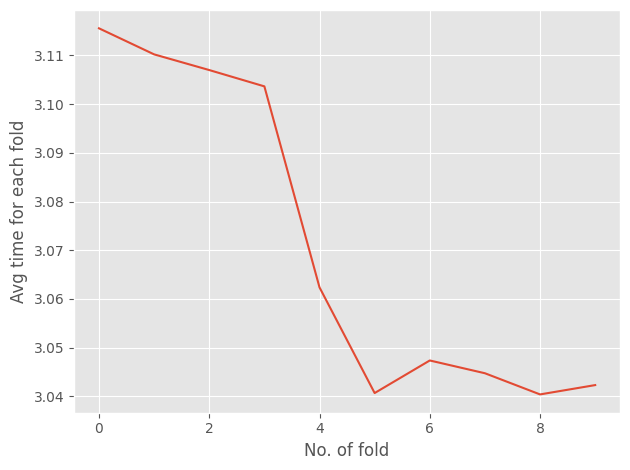

In [76]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [77]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [78]:
import gc
gc.collect()

10147

In [79]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [80]:
train_acc_xv3_n

0     0.239452
1     0.236713
2     0.238880
3     0.238062
4     0.237694
        ...   
95    0.236999
96    0.237163
97    0.238716
98    0.237694
99    0.237244
Name: 0, Length: 100, dtype: float64

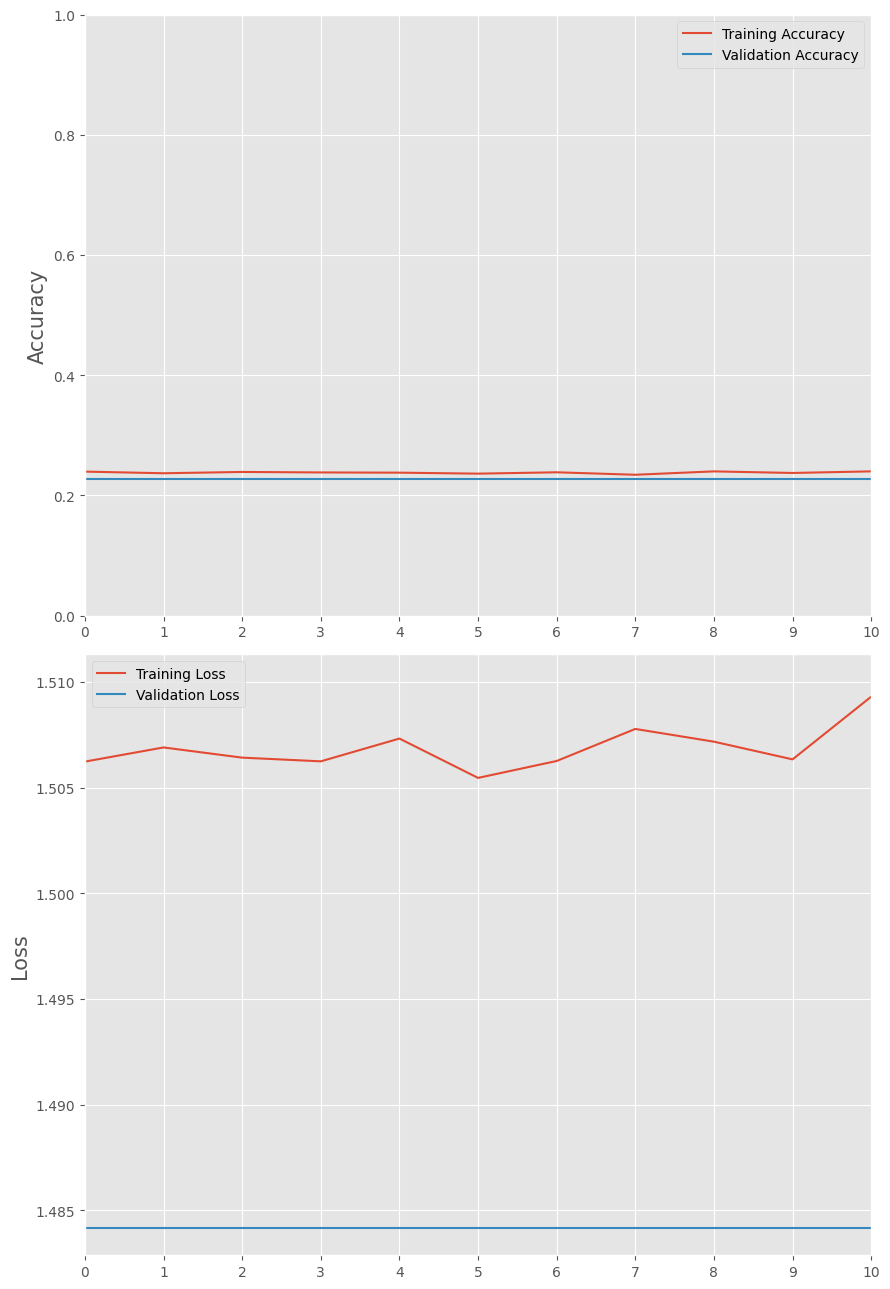

In [81]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [82]:
np.array(scores_xv3).shape

(10, 302, 4)

In [83]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [84]:
y_pred_xv3.shape

(10, 302)

In [85]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_xv3[i]))

In [86]:
import gc
gc.collect()

24091

In [87]:
acc_scores_xv3

[0.2913907284768212,
 0.2947019867549669,
 0.17218543046357615,
 0.15894039735099338,
 0.24834437086092714,
 0.31456953642384106,
 0.18211920529801323,
 0.17880794701986755,
 0.27483443708609273,
 0.31788079470198677]

In [88]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [89]:
y_test_all_n = np.array(y_test_all)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

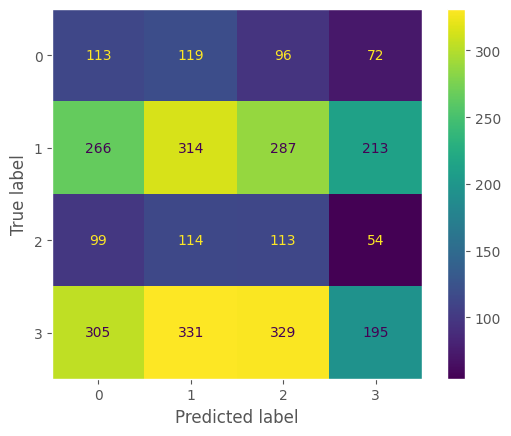

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [91]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.28      0.19       400
           1       0.36      0.29      0.32      1080
           2       0.14      0.30      0.19       380
           3       0.37      0.17      0.23      1160

    accuracy                           0.24      3020
   macro avg       0.25      0.26      0.23      3020
weighted avg       0.30      0.24      0.25      3020



# EfficientNetV2L

In [55]:
import gc
gc.collect()

In [56]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [57]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [58]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

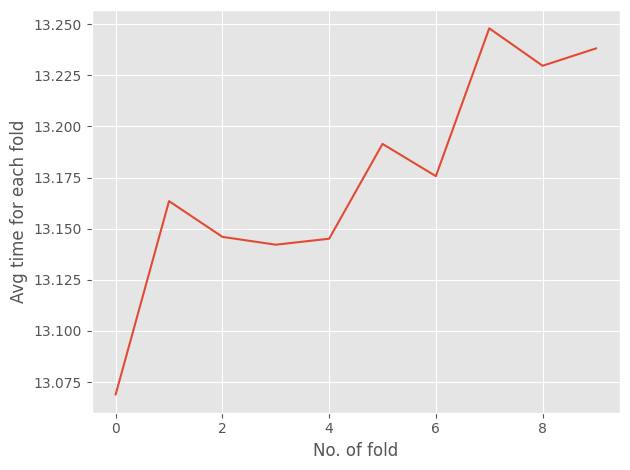

In [92]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [93]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [94]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [95]:
train_acc_env2l_n

0     0.241987
1     0.241987
2     0.244685
3     0.244808
4     0.244685
        ...   
95    0.247547
96    0.247056
97    0.245748
98    0.244440
99    0.248078
Name: 0, Length: 100, dtype: float64

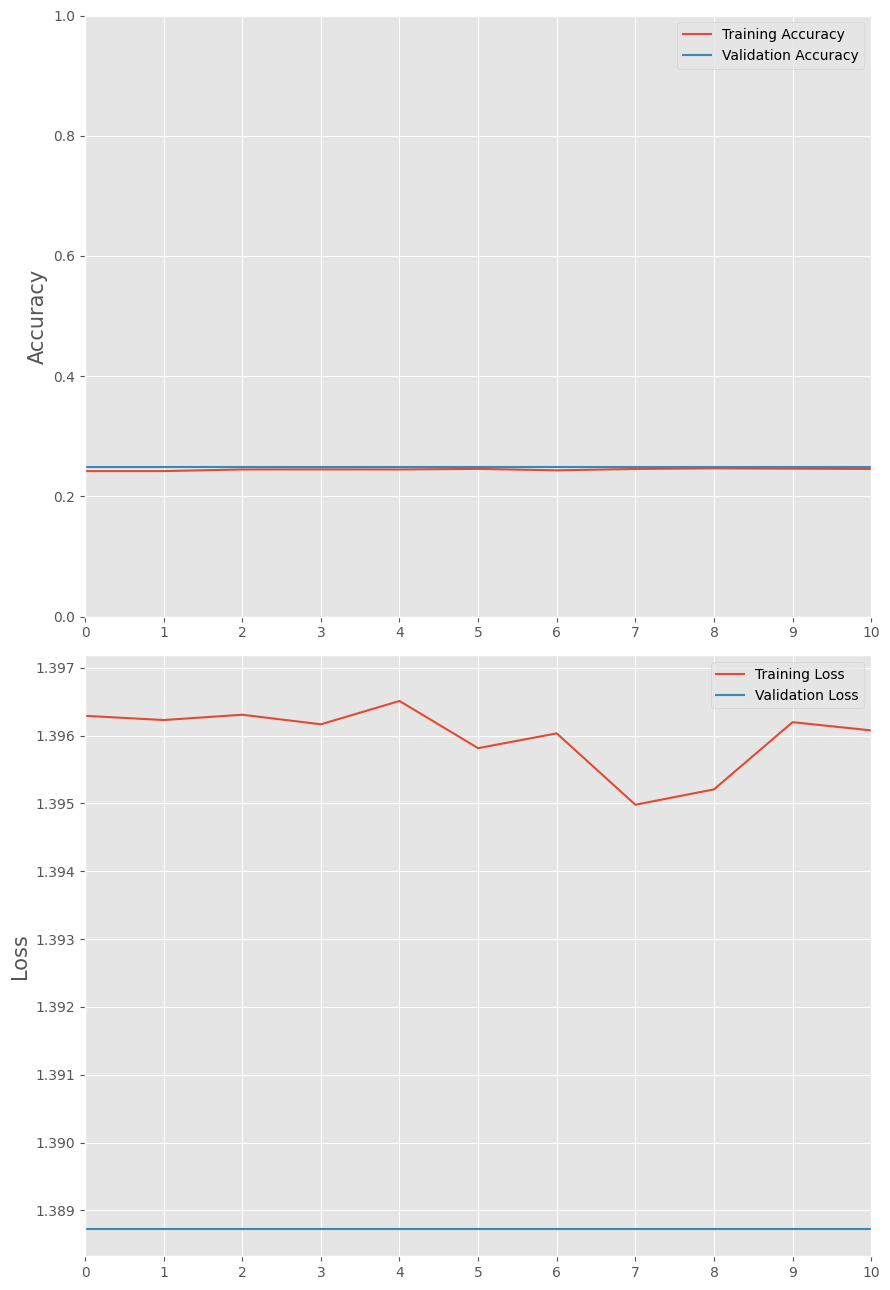

In [96]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [97]:
np.array(scores_env2l).shape

(10, 302, 4)

In [98]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [99]:
y_pred_env2l.shape

(10, 302)

In [100]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_env2l[i]))

In [101]:
import gc
gc.collect()

30174

In [102]:
acc_scores_env2l

[0.1357615894039735,
 0.22847682119205298,
 0.1291390728476821,
 0.3443708609271523,
 0.15894039735099338,
 0.3841059602649007,
 0.13245033112582782,
 0.1456953642384106,
 0.3443708609271523,
 0.3841059602649007]

In [103]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [104]:
y_test_all_n = np.array(y_test_all)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

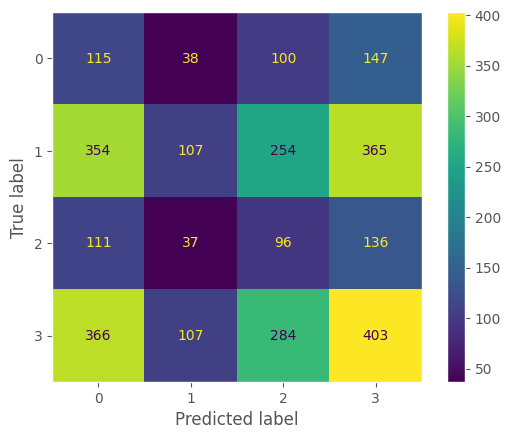

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [106]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.29      0.17       400
           1       0.37      0.10      0.16      1080
           2       0.13      0.25      0.17       380
           3       0.38      0.35      0.36      1160

    accuracy                           0.24      3020
   macro avg       0.25      0.25      0.22      3020
weighted avg       0.31      0.24      0.24      3020



# NasNetLarge

In [130]:
import gc
gc.collect()

24402

In [132]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [133]:
import gc
gc.collect()

22

In [134]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [135]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 22s 190ms/step - loss: 1.5178 - accuracy: 0.1746 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 157ms/step - loss: 1.5169 - accuracy: 0.1811 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 12s 158ms/step - loss: 1.5256 - accuracy: 0.1660 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 12s 158ms/step - loss: 1.5239 - accuracy: 0.1795 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 12s 158ms/step - loss: 1.5187 - accuracy: 0.1819 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 158ms/step - loss: 1.5114 - accuracy: 0.1905 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.5250 - accuracy: 0.1643
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.45 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.5250 - accuracy: 0.1643 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5202 - accuracy: 0.1827 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5164 - accuracy: 0.1938 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5291 - accuracy: 0.1668 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5275 - accuracy: 0.1815 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.5137 - accuracy: 0.1778
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.42 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5137 - accuracy: 0.1778 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5183 - accuracy: 0.1811 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5154 - accuracy: 0.1889 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5222 - accuracy: 0.1664 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 12s 162ms/step - loss: 1.5188 - accuracy: 0.1791 - val_loss: 1.4853 - val_accuracy: 0.1618 - lr: 4.

Epoch 13/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4121 - accuracy: 0.2747 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4122 - accuracy: 0.2796 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4160 - accuracy: 0.2809
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.48 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4160 - accuracy: 0.2809 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4053 - accuracy: 0.2788 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4094 - accuracy: 0.2784 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 4

Epoch 41/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4164 - accuracy: 0.2772 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4014 - accuracy: 0.2870 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4078 - accuracy: 0.2952
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.44 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4078 - accuracy: 0.2952 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4112 - accuracy: 0.2821 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4117 - accuracy: 0.2850 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 6.

Epoch 69/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4065 - accuracy: 0.2854 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4077 - accuracy: 0.2837 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4061 - accuracy: 0.2915
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.48 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4061 - accuracy: 0.2915 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4146 - accuracy: 0.2768 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4075 - accuracy: 0.2841 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 1

Epoch 97/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4076 - accuracy: 0.2809 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4080 - accuracy: 0.2829 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4078 - accuracy: 0.2760
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.44 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4078 - accuracy: 0.2760 - val_loss: 1.3760 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 138ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 22s 192ms/step - loss: 1.4274 - accuracy: 0.2412 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 159ms/

Epoch 25/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4246 - accuracy: 0.2437 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4267 - accuracy: 0.2449 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4215 - accuracy: 0.2453 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4227 - accuracy: 0.2572 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4246 - accuracy: 0.2531
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.45 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4246 - accuracy: 0.2531 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 8

Epoch 53/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4291 - accuracy: 0.2453 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4274 - accuracy: 0.2424 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4274 - accuracy: 0.2273 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4309 - accuracy: 0.2375 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4351 - accuracy: 0.2257
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.44 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4351 - accuracy: 0.2257 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 1

Epoch 81/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4231 - accuracy: 0.2371 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4340 - accuracy: 0.2473 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4299 - accuracy: 0.2478 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4293 - accuracy: 0.2375 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4282 - accuracy: 0.2441
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.45 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4282 - accuracy: 0.2441 - val_loss: 1.4127 - val_accuracy: 0.2500 - lr: 2.

Epoch 9/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4489 - accuracy: 0.2126 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4396 - accuracy: 0.2134 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4448 - accuracy: 0.2052 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4403 - accuracy: 0.2122 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4510 - accuracy: 0.2020 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4502 - accuracy: 0.2052 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4531 - accuracy: 0.2101 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4441 - accuracy: 0.2073 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4528 - accuracy: 0.2073 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4469 - accuracy: 0.2077 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4458 - accuracy: 0.2085 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4491 - accuracy: 0.2093 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4534 - accuracy: 0.2020 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4543 - accuracy: 0.2044 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4435 - accuracy: 0.2089 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4448 - accuracy: 0.2097 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4471 - accuracy: 0.2065 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4449 - accuracy: 0.2114 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4440 - accuracy: 0.2105 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4525 - accuracy: 0.1942 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4404 - accuracy: 0.2175 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4440 - accuracy: 0.2126 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4558 - accuracy: 0.1877 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4511 - accuracy: 0.2048 - val_loss: 1.4394 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 13s 163ms/step - loss: 1.4112 - accuracy: 0.2756 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.4107 - accuracy: 0.2756
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 12.68 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.4107 - accuracy: 0.2756 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4041 - accuracy: 0.2813 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4044 - accuracy: 0.2751 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4066 - accuracy: 0.2739 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4060 - accuracy: 0.2886 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4054 - accuracy: 0.2674
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 12.51 seconds
77/77 [==============================] - 13s 163ms/step - loss: 1.4054 - accuracy: 0.2674 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4071 - accuracy: 0.2772 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4102 - accuracy: 0.2641 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4074 - accuracy: 0.2915 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 1

Epoch 77/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4139 - accuracy: 0.2711 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4062 - accuracy: 0.2833
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 12.66 seconds
77/77 [==============================] - 13s 165ms/step - loss: 1.4062 - accuracy: 0.2833 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 12s 162ms/step - loss: 1.3998 - accuracy: 0.2829 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3993 - accuracy: 0.2731 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4119 - accuracy: 0.2625 - val_loss: 1.3981 - val_accuracy: 0.3272 - lr: 2

Epoch 5/100
77/77 [==============================] - 12s 160ms/step - loss: 1.5353 - accuracy: 0.1754 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5338 - accuracy: 0.1664 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5303 - accuracy: 0.1713 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.5332 - accuracy: 0.1811
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 12.40 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5332 - accuracy: 0.1811 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5312 - accuracy: 0.1652 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5181 - accuracy: 0.1872 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5323 - accuracy: 0.1758 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5316 - accuracy: 0.1713 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.5258 - accuracy: 0.1754
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 12.37 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5258 - accuracy: 0.1754 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5325 - accuracy: 0.1738 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 3.

Epoch 61/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5283 - accuracy: 0.1799 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5276 - accuracy: 0.1770 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5291 - accuracy: 0.1860 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.5326 - accuracy: 0.1672
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 12.38 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5326 - accuracy: 0.1672 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5258 - accuracy: 0.1803 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5298 - accuracy: 0.1721 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5265 - accuracy: 0.1705 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5350 - accuracy: 0.1778 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.5309 - accuracy: 0.1754
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 12.37 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5309 - accuracy: 0.1754 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5232 - accuracy: 0.1766 - val_loss: 1.5060 - val_accuracy: 0.1471 - lr: 8.

Epoch 17/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4162 - accuracy: 0.3496 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4105 - accuracy: 0.3500 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4091 - accuracy: 0.3516 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4048 - accuracy: 0.3610 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 13s 163ms/step - loss: 1.4126 - accuracy: 0.3536 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3986 - accuracy: 0.3491
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4019 - accuracy: 0.3528 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4130 - accuracy: 0.3549 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4114 - accuracy: 0.3528 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4061 - accuracy: 0.3561 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4086 - accuracy: 0.3565 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4016 - accuracy: 0.3540
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4086 - accuracy: 0.3528 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4027 - accuracy: 0.3536 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4111 - accuracy: 0.3504 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4095 - accuracy: 0.3487 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4133 - accuracy: 0.3471 - val_loss: 1.4141 - val_accuracy: 0.3125 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4132 - accuracy: 0.3463
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 4s 139ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 22s 193ms/step - loss: 1.4609 - accuracy: 0.2923 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 160ms/step - loss: 1.4611 - accuracy: 0.2960 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 12s 160ms/step - loss: 1.4582 - accuracy: 0.2939 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 12s 160ms/step - loss: 1.4562 - accuracy: 0.2866 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4655 - accuracy: 0.2993 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4544 - accuracy: 0.2956 - val_loss: 1.4252 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.4583 - accuracy: 0.2882
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.44 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4583 - accuracy: 0.2882 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4608 - accuracy: 0.3046 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4616 - accuracy: 0.2919 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4601 - accuracy: 0.2989 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4619 - accuracy: 0.2956 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4571 - accuracy: 0.2899
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.42 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4571 - accuracy: 0.2899 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4659 - accuracy: 0.2989 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4553 - accuracy: 0.2972 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4627 - accuracy: 0.2923 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4610 - accuracy: 0.2850 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4574 - accuracy: 0.2939
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.40 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4574 - accuracy: 0.2939 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4611 - accuracy: 0.2903 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4628 - accuracy: 0.2813 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4580 - accuracy: 0.2899 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4586 - accuracy: 0.2952 - val_loss: 1.4252 - val_accuracy: 0.3309 - lr: 4.

Epoch 13/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4368 - accuracy: 0.2584 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4329 - accuracy: 0.2735 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4357 - accuracy: 0.2719
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.47 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4357 - accuracy: 0.2719 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4331 - accuracy: 0.2678 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4351 - accuracy: 0.2674 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 4

Epoch 41/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4262 - accuracy: 0.2739 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4350 - accuracy: 0.2800 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4355 - accuracy: 0.2657
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.40 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4355 - accuracy: 0.2657 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4400 - accuracy: 0.2482 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4365 - accuracy: 0.2768 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 6.

Epoch 69/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4389 - accuracy: 0.2576 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4293 - accuracy: 0.2772 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4365 - accuracy: 0.2649
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.41 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4365 - accuracy: 0.2649 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4372 - accuracy: 0.2572 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4413 - accuracy: 0.2657 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 1

Epoch 97/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4333 - accuracy: 0.2645 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4345 - accuracy: 0.2727 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4341 - accuracy: 0.2604
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.39 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4341 - accuracy: 0.2604 - val_loss: 1.4186 - val_accuracy: 0.2647 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 140ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 22s 193ms/step - loss: 1.4774 - accuracy: 0.1476 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 159ms

Epoch 25/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4769 - accuracy: 0.1472 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4803 - accuracy: 0.1521 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4844 - accuracy: 0.1480 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4819 - accuracy: 0.1455 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4851 - accuracy: 0.1468
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.48 seconds
77/77 [==============================] - 12s 162ms/step - loss: 1.4851 - accuracy: 0.1468 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 8

Epoch 53/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4787 - accuracy: 0.1566 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4786 - accuracy: 0.1488 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4818 - accuracy: 0.1488 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4852 - accuracy: 0.1443 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4711 - accuracy: 0.1537
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.42 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4711 - accuracy: 0.1537 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 1

Epoch 81/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4789 - accuracy: 0.1484 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4811 - accuracy: 0.1468 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4838 - accuracy: 0.1464 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 12s 162ms/step - loss: 1.4879 - accuracy: 0.1451 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4780 - accuracy: 0.1525
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.42 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.4780 - accuracy: 0.1525 - val_loss: 1.4480 - val_accuracy: 0.1434 - lr: 2.

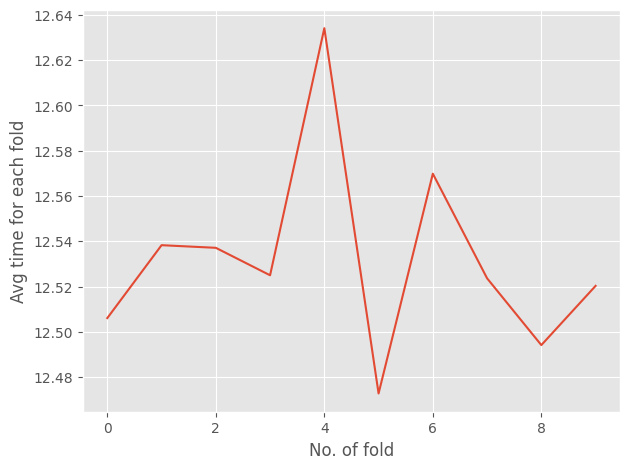

In [136]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [137]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [138]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

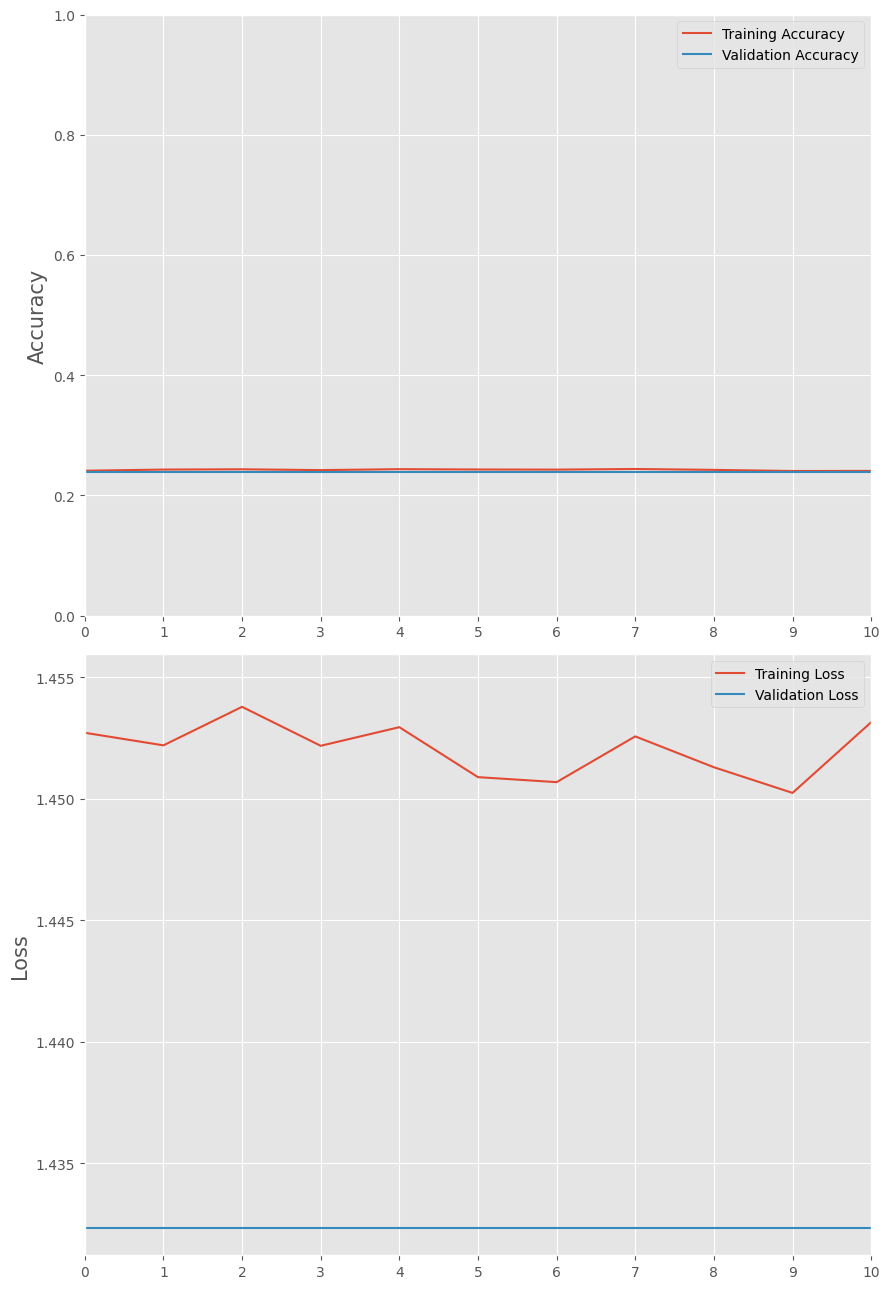

In [139]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [140]:
import gc
gc.collect()

23753

In [141]:
np.array(scores_nnl).shape

(10, 302, 4)

In [142]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [143]:
y_pred_nnl.shape

(10, 302)

In [144]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_nnl[i]))

In [145]:
acc_scores_nnl

[0.18543046357615894,
 0.347682119205298,
 0.2185430463576159,
 0.20860927152317882,
 0.2980132450331126,
 0.18874172185430463,
 0.3543046357615894,
 0.32450331125827814,
 0.28807947019867547,
 0.1423841059602649]

In [146]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [147]:
y_test_all_n = np.array(y_test_all)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

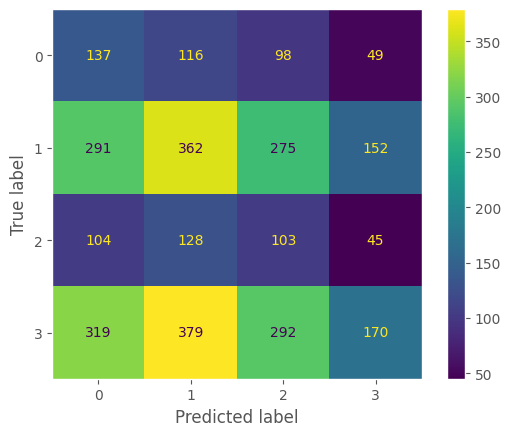

In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [149]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.16      0.34      0.22       400
           1       0.37      0.34      0.35      1080
           2       0.13      0.27      0.18       380
           3       0.41      0.15      0.22      1160

    accuracy                           0.26      3020
   macro avg       0.27      0.27      0.24      3020
weighted avg       0.33      0.26      0.26      3020



# NasNetMobile

In [107]:
import gc
gc.collect()

6122

In [108]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [109]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [110]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 60ms/step - loss: 1.4196 - accuracy: 0.3532 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4183 - accuracy: 0.3528 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4220 - accuracy: 0.3561 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4163 - accuracy: 0.3471 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4252 - accuracy: 0.3508 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4192 - accuracy: 0.3545 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 2.76 seconds
77/77 [==============================] - 3s 36ms/step - loss: 1.4183 - accuracy: 0.3524 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4211 - accuracy: 0.3422 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4097 - accuracy: 0.3565 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4236 - accuracy: 0.3545 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4071 - accuracy: 0.3508 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4183 - accuracy: 0.3520 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4191 - accuracy: 0.3496 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4247 - accuracy: 0.3512 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4225 - accuracy: 0.3463 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4148 - accuracy: 0.3532 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4173 - accuracy: 0.3496 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4091 - accuracy: 0.3532 - val_loss: 1.3594 - val_accuracy: 0.4081 - lr: 2.5600e-09
Epoch 64/100
77/77 [====================

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3849 - accuracy: 0.3471
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 2.73 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.3849 - accuracy: 0.3471 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3847 - accuracy: 0.3393 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3903 - accuracy: 0.3426 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 35ms/step - loss: 1.3807 - accuracy: 0.3369 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 35ms/step - loss: 1.3823 - accuracy: 0.3406 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 4.0000e-05
E

77/77 [==============================] - ETA: 0s - loss: 1.3675 - accuracy: 0.3438
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 2.72 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.3675 - accuracy: 0.3438 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 35ms/step - loss: 1.3911 - accuracy: 0.3275 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3938 - accuracy: 0.3238 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 35ms/step - loss: 1.3793 - accuracy: 0.3373 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 36ms/step - loss: 1.3688 - accuracy: 0.3426 - val_loss: 1.3180 - val_accuracy: 0.3713 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 35ms/step - loss: 1.4270 - accuracy: 0.3545 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4181 - accuracy: 0.3573 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.4351 - accuracy: 0.3422
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.71 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.4351 - accuracy: 0.3422 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4353 - accuracy: 0.3442 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4302 - accuracy: 0.3401 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 35ms/step - loss: 1.4244 - accuracy: 0.3430 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4265 - accuracy: 0.3483 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4378 - accuracy: 0.3442
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.72 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.4378 - accuracy: 0.3442 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4278 - accuracy: 0.3451 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4334 - accuracy: 0.3357 - val_loss: 1.4182 - val_accuracy: 0.3529 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 35ms/step - loss: 1.5899 - accuracy: 0.2216 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 36ms/step - loss: 1.6340 - accuracy: 0.2061 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6029 - accuracy: 0.2261 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 36ms/step - loss: 1.6080 - accuracy: 0.2077 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.6032 - accuracy: 0.2146
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 2.72 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.6032 - accuracy: 0.2146 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 35ms/step - loss: 1.6114 - accuracy: 0.2150 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6011 - accuracy: 0.2114 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6122 - accuracy: 0.2167 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 35ms/step - loss: 1.6043 - accuracy: 0.2065 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.6140 - accuracy: 0.2097
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 2.73 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.6140 - accuracy: 0.2097 - val_loss: 1.5585 - val_accuracy: 0.2390 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 35ms/step - loss: 1.4596 - accuracy: 0.2645 - val_loss: 1.4207 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4503 - accuracy: 0.2731 - val_loss: 1.4207 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4502 - accuracy: 0.2604 - val_loss: 1.4207 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4444 - accuracy: 0.2698 - val_loss: 1.4207 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 36ms/step - loss: 1.4565 - accuracy: 0.2723 - val_loss: 1.4207 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4539 - accuracy: 0.2694 - val_loss: 1.4207 - val_accuracy: 0.2721 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] -

77/77 [==============================] - 3s 34ms/step - loss: 1.5366 - accuracy: 0.1979 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.5361 - accuracy: 0.2101
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.67 seconds
77/77 [==============================] - 3s 34ms/step - loss: 1.5361 - accuracy: 0.2101 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 34ms/step - loss: 1.5356 - accuracy: 0.2085 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 34ms/step - loss: 1.5387 - accuracy: 0.1987 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5142 - accuracy: 0.2138 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 35ms/step - loss: 1.5223 - accuracy: 0.2232 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.5288 - accuracy: 0.2109
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 2.70 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.5280 - accuracy: 0.2118 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5280 - accuracy: 0.2061 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5361 - accuracy: 0.2089 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5231 - accuracy: 0.2220 - val_loss: 1.4978 - val_accuracy: 0.1912 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 3s 35ms/step - loss: 1.8539 - accuracy: 0.1394 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 35ms/step - loss: 1.8603 - accuracy: 0.1365 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 35ms/step - loss: 1.8642 - accuracy: 0.1361 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.8727 - accuracy: 0.1325
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 2.69 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.8727 - accuracy: 0.1325 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 35ms/step - loss: 1.8430 - accuracy: 0.1410 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 3s 35ms/step - loss: 1.8685 - accuracy: 0.1353 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 35ms/step - loss: 1.8759 - accuracy: 0.1382 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 35ms/step - loss: 1.8593 - accuracy: 0.1415 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.8615 - accuracy: 0.1361
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 2.67 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.8620 - accuracy: 0.1361 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 35ms/step - loss: 1.8682 - accuracy: 0.1349 - val_loss: 1.7305 - val_accuracy: 0.1691 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5143 - accuracy: 0.3479 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5255 - accuracy: 0.3324 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5251 - accuracy: 0.3414 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5176 - accuracy: 0.3479 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5238 - accuracy: 0.3271 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.5173 - accuracy: 0.3454
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 2.66 seconds
77/77 [=========

77/77 [==============================] - 3s 35ms/step - loss: 1.5075 - accuracy: 0.3459 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5221 - accuracy: 0.3299 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5295 - accuracy: 0.3393 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5073 - accuracy: 0.3446 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5225 - accuracy: 0.3365 - val_loss: 1.3621 - val_accuracy: 0.4191 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.5326 - accuracy: 0.3307
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 2.68 seconds
77/7

Time taken for epoch 15: 2.68 seconds
77/77 [==============================] - 3s 35ms/step - loss: 1.4939 - accuracy: 0.2657 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4872 - accuracy: 0.2743 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4946 - accuracy: 0.2698 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4964 - accuracy: 0.2706 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 35ms/step - loss: 1.5039 - accuracy: 0.2756 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 35ms/step - loss: 1.4943 - accuracy: 0.2682 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 3s 33ms/step - loss: 1.4970 - accuracy: 0.2764 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 33ms/step - loss: 1.4906 - accuracy: 0.2645 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 33ms/step - loss: 1.4876 - accuracy: 0.2784 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 34ms/step - loss: 1.4895 - accuracy: 0.2735 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 33ms/step - loss: 1.4927 - accuracy: 0.2813 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 33ms/step - loss: 1.4847 - accuracy: 0.2711 - val_loss: 1.4913 - val_accuracy: 0.2426 - lr: 6.4000e-08
Epoch 50/100
76/77 [====================

10/10 [==============================] - 2s 26ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 10s 56ms/step - loss: 1.4403 - accuracy: 0.2964 - val_loss: 1.3471 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 32ms/step - loss: 1.4518 - accuracy: 0.2870 - val_loss: 1.3471 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 32ms/step - loss: 1.4362 - accuracy: 0.2993 - val_loss: 1.3471 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 33ms/step - loss: 1.4434 - accuracy: 0.3046 - val_loss: 1.3471 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 32ms/step - loss: 1.4339 - accuracy: 0.3099 - val_loss: 1.3471 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 32ms/step - loss: 1.4326 - accuracy: 0.3029 - val_loss: 1.3471 - val_accuracy: 0.3566 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [151]:
import gc
gc.collect()

6323

In [152]:
np.array(y_test_all).shape

(10, 302)

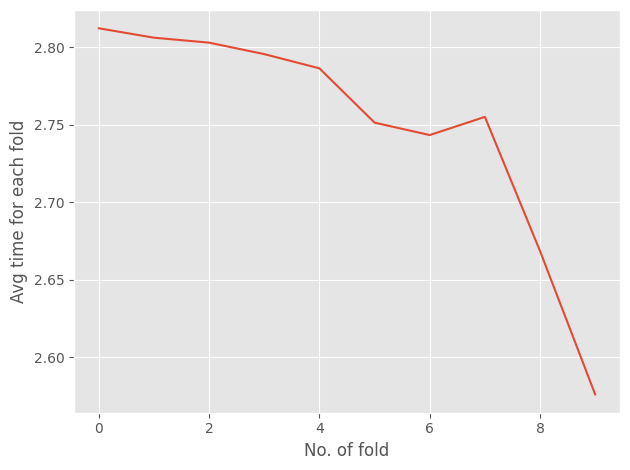

In [153]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [154]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [155]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

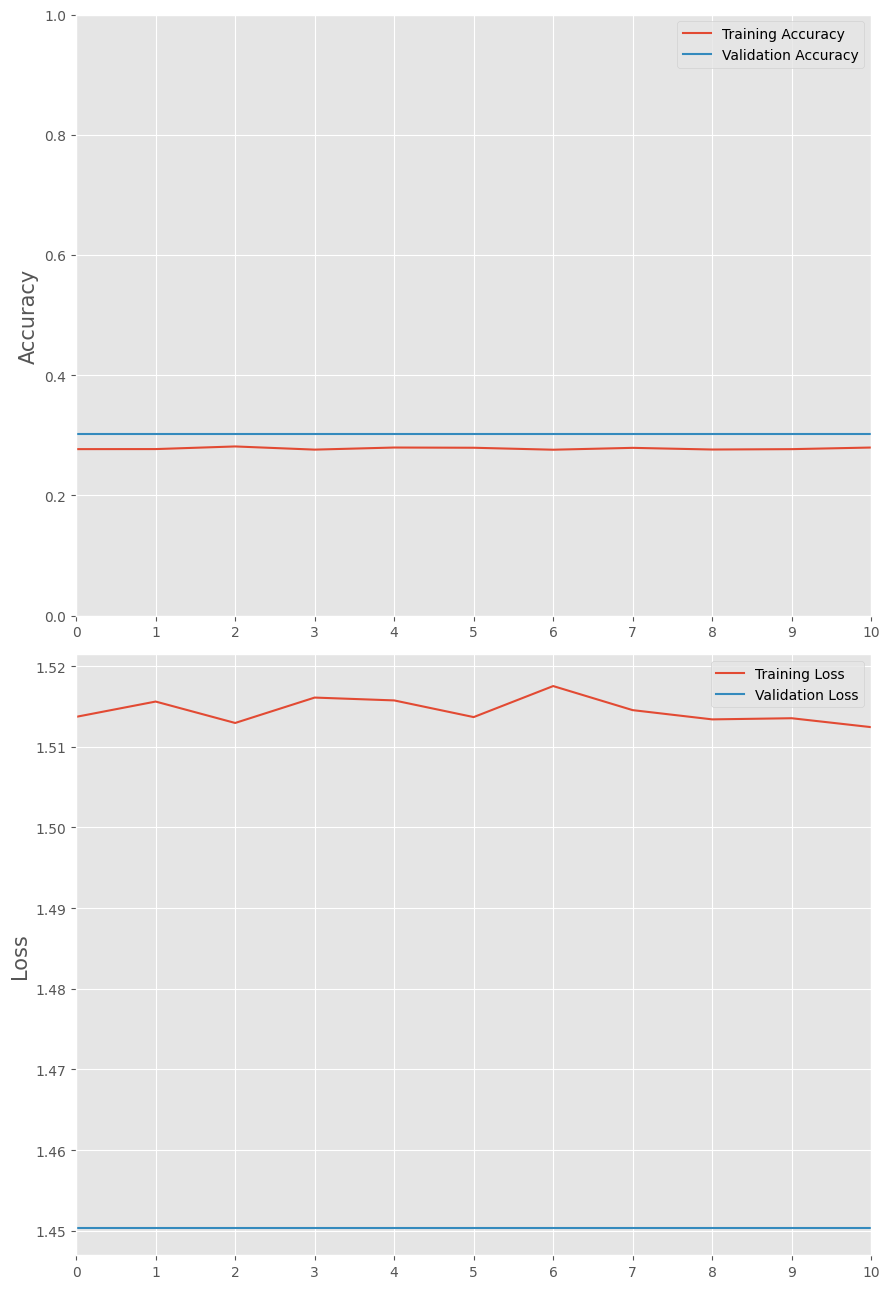

In [156]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [157]:
np.array(scores_nnb).shape

(10, 302, 4)

In [158]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [159]:
y_pred_nnb.shape

(10, 302)

In [160]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_nnb[i]))

In [161]:
import gc
gc.collect()

24056

In [162]:
acc_scores_nnb

[0.36423841059602646,
 0.3675496688741722,
 0.36423841059602646,
 0.19536423841059603,
 0.2913907284768212,
 0.19536423841059603,
 0.1291390728476821,
 0.3708609271523179,
 0.26158940397350994,
 0.31788079470198677]

In [163]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [164]:
y_test_all_n = np.array(y_test_all)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

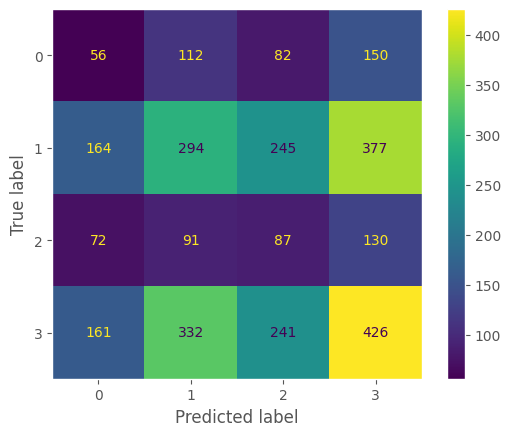

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [166]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.14      0.13       400
           1       0.35      0.27      0.31      1080
           2       0.13      0.23      0.17       380
           3       0.39      0.37      0.38      1160

    accuracy                           0.29      3020
   macro avg       0.25      0.25      0.25      3020
weighted avg       0.31      0.29      0.29      3020



# AlexNet

In [13]:
import gc
gc.collect()

0

In [14]:
X.shape

(3020, 259, 100, 1)

In [15]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [16]:
X_tl.shape

(3020, 259, 100, 3)

In [171]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [172]:
import gc
gc.collect()

5

In [173]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [174]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [175]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 2s 26ms/step - loss: 1.4142 - accuracy: 0.3720 - val_loss: 1.2922 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2664 - accuracy: 0.3790 - val_loss: 1.2889 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2681 - accuracy: 0.3716 - val_loss: 1.2970 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2643 - accuracy: 0.3880 - val_loss: 1.2902 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2652 - accuracy: 0.3851 - val_loss: 1.2908 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2682 - accuracy: 0.3855 - val_loss: 1.2872 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 7/100
76/77 [==========================

77/77 [==============================] - 2s 24ms/step - loss: 1.2622 - accuracy: 0.3872 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 29/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2624 - accuracy: 0.3859 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 30/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2627 - accuracy: 0.3859 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 31/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2616 - accuracy: 0.3863 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 32/100
76/77 [============================>.] - ETA: 0s - loss: 1.2635 - accuracy: 0.3849
Epoch 32: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 32: 1.85 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2627 - accuracy: 0.3863 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 3.2000e-07
Epoch 33/100
77

Epoch 56/100
77/77 [==============================] - 2s 23ms/step - loss: 1.2618 - accuracy: 0.3884 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.2618 - accuracy: 0.3877
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 57: 1.82 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2628 - accuracy: 0.3876 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 1.0240e-10
Epoch 58/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2609 - accuracy: 0.3868 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 59/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2619 - accuracy: 0.3843 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 2.0480e-11
Epoch 60/100
77/77 [==============================] - 2s 23ms/step - loss: 1.2610 - accuracy: 0.3896 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 2.0480e-11
E

Epoch 84/100
77/77 [==============================] - 2s 23ms/step - loss: 1.2608 - accuracy: 0.3908 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 6.5536e-15
Epoch 85/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2637 - accuracy: 0.3896 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 6.5536e-15
Epoch 86/100
77/77 [==============================] - 2s 23ms/step - loss: 1.2617 - accuracy: 0.3843 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 6.5536e-15
Epoch 87/100
76/77 [============================>.] - ETA: 0s - loss: 1.2626 - accuracy: 0.3865
Epoch 87: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 87: 1.81 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2631 - accuracy: 0.3872 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 6.5536e-15
Epoch 88/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2618 - accuracy: 0.3876 - val_loss: 1.2881 - val_accuracy: 0.3493 - lr: 1.3107e-15
E

Epoch 39/100
76/77 [============================>.] - ETA: 0s - loss: 1.2688 - accuracy: 0.3840
Epoch 39: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 39: 1.84 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2703 - accuracy: 0.3831 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 40/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2687 - accuracy: 0.3810 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 41/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2684 - accuracy: 0.3835 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 42/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2697 - accuracy: 0.3835 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 43/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2695 - accuracy: 0.3786 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 1.2800e-08
E

Epoch 67/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2682 - accuracy: 0.3794 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 68/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2687 - accuracy: 0.3782 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 69/100
76/77 [============================>.] - ETA: 0s - loss: 1.2691 - accuracy: 0.3803
Epoch 69: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 69: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2698 - accuracy: 0.3798 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 70/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2689 - accuracy: 0.3827 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 8.1920e-13
Epoch 71/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2693 - accuracy: 0.3798 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 8.1920e-13
Ep

Epoch 95/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2675 - accuracy: 0.3806 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 96/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2681 - accuracy: 0.3818 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 97/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2696 - accuracy: 0.3786 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 98/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2681 - accuracy: 0.3790 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.2679 - accuracy: 0.3753
Epoch 99: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Time taken for epoch 99: 1.84 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2679 - accuracy: 0.3753 - val_loss: 1.2299 - val_accuracy: 0.4044 - lr: 2.6214e-16
E

Epoch 23/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0286 - accuracy: 0.9935 - val_loss: 3.2427 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0156 - accuracy: 0.9971 - val_loss: 3.6374 - val_accuracy: 0.5294 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0083 - accuracy: 0.9988 - val_loss: 3.9213 - val_accuracy: 0.5551 - lr: 2.0000e-04
Epoch 26/100
75/77 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 26: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 26: 1.81 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 4.2695 - val_accuracy: 0.5441 - lr: 2.0000e-04
Epoch 27/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 4.3518 - val_accuracy: 0.5404 - lr: 4.0000e-05
E

Epoch 51/100
77/77 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 51: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 51: 1.81 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.6562 - val_accuracy: 0.5404 - lr: 6.4000e-08
Epoch 52/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.6559 - val_accuracy: 0.5404 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.6562 - val_accuracy: 0.5404 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.6565 - val_accuracy: 0.5404 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 4.6561 - val_accuracy: 0.5404 - lr: 1.2800e-08
E

Epoch 79/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.6550 - val_accuracy: 0.5404 - lr: 4.0960e-12
Epoch 80/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.6550 - val_accuracy: 0.5404 - lr: 4.0960e-12
Epoch 81/100
77/77 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 81: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 81: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.6550 - val_accuracy: 0.5404 - lr: 4.0960e-12
Epoch 82/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 4.6550 - val_accuracy: 0.5404 - lr: 8.1920e-13
Epoch 83/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.6550 - val_accuracy: 0.5404 - lr: 8.1920e-13
Ep

Epoch 34/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2675 - accuracy: 0.3778 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 6.4000e-08
Epoch 35/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2670 - accuracy: 0.3814 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 6.4000e-08
Epoch 36/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2675 - accuracy: 0.3786 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 6.4000e-08
Epoch 37/100
77/77 [==============================] - ETA: 0s - loss: 1.2676 - accuracy: 0.3790
Epoch 37: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 37: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2676 - accuracy: 0.3790 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 6.4000e-08
Epoch 38/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2679 - accuracy: 0.3863 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 1.2800e-08
E

Epoch 62/100
76/77 [============================>.] - ETA: 0s - loss: 1.2689 - accuracy: 0.3808
Epoch 62: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 62: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2681 - accuracy: 0.3802 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 2.0480e-11
Epoch 63/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2679 - accuracy: 0.3757 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 64/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2682 - accuracy: 0.3802 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 65/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2682 - accuracy: 0.3745 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 4.0960e-12
Epoch 66/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2668 - accuracy: 0.3798 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 4.0960e-12
Ep

Epoch 90/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2692 - accuracy: 0.3782 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 1.3107e-15
Epoch 91/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2672 - accuracy: 0.3802 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 1.3107e-15
Epoch 92/100
75/77 [============================>.] - ETA: 0s - loss: 1.2651 - accuracy: 0.3796
Epoch 92: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 92: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2675 - accuracy: 0.3778 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 1.3107e-15
Epoch 93/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2685 - accuracy: 0.3765 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 2.6214e-16
Epoch 94/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2685 - accuracy: 0.3810 - val_loss: 1.2354 - val_accuracy: 0.4154 - lr: 2.6214e-16
E

Epoch 18/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4285 - accuracy: 0.8324 - val_loss: 1.9142 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 2s 23ms/step - loss: 0.3506 - accuracy: 0.8749 - val_loss: 2.1159 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 2s 24ms/step - loss: 0.2981 - accuracy: 0.8876 - val_loss: 2.4671 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 2s 24ms/step - loss: 0.2255 - accuracy: 0.9207 - val_loss: 2.8581 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.9091
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 22: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.2358 - accuracy: 0.9092 - val_loss: 2.9391 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 23/100
77/77 [=

Epoch 46/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.3382 - val_accuracy: 0.4559 - lr: 3.2000e-07
Epoch 47/100
77/77 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9996
Epoch 47: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 47: 1.84 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 4.3379 - val_accuracy: 0.4559 - lr: 3.2000e-07
Epoch 48/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.3385 - val_accuracy: 0.4559 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.3384 - val_accuracy: 0.4559 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 4.3392 - val_accuracy: 0.4559 - lr: 6.4000e-08
Ep

Epoch 74/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.3388 - val_accuracy: 0.4559 - lr: 2.0480e-11
Epoch 75/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 4.3388 - val_accuracy: 0.4559 - lr: 2.0480e-11
Epoch 76/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.3388 - val_accuracy: 0.4559 - lr: 2.0480e-11
Epoch 77/100
75/77 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 77: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 77: 1.82 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.3388 - val_accuracy: 0.4559 - lr: 2.0480e-11
Epoch 78/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 4.3388 - val_accuracy: 0.4559 - lr: 4.0960e-12
Ep

77/77 [==============================] - 2s 25ms/step - loss: 1.3610 - accuracy: 0.3749 - val_loss: 1.2501 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 23ms/step - loss: 1.2690 - accuracy: 0.3745 - val_loss: 1.2536 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2729 - accuracy: 0.3671 - val_loss: 1.2544 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2703 - accuracy: 0.3741 - val_loss: 1.2513 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2713 - accuracy: 0.3774 - val_loss: 1.2575 - val_accuracy: 0.3897 - lr: 0.0010
Epoch 6/100
75/77 [============================>.] - ETA: 0s - loss: 1.2687 - accuracy: 0.3833
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 1.83 seconds
77/77 [=====================

Epoch 57/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2660 - accuracy: 0.3806 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 58/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2658 - accuracy: 0.3863 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 59/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2655 - accuracy: 0.3868 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 60/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2646 - accuracy: 0.3843 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 2.0480e-11
Epoch 61/100
75/77 [============================>.] - ETA: 0s - loss: 1.2650 - accuracy: 0.3858
Epoch 61: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 61: 1.84 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2669 - accuracy: 0.3835 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 2.0480e-11
Ep

Epoch 85/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2658 - accuracy: 0.3782 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 6.5536e-15
Epoch 86/100
77/77 [==============================] - ETA: 0s - loss: 1.2657 - accuracy: 0.3835
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.3107200431082805e-15.
Time taken for epoch 86: 1.85 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2657 - accuracy: 0.3835 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 6.5536e-15
Epoch 87/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2664 - accuracy: 0.3794 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 1.3107e-15
Epoch 88/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2671 - accuracy: 0.3818 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 1.3107e-15
Epoch 89/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2657 - accuracy: 0.3859 - val_loss: 1.2517 - val_accuracy: 0.3897 - lr: 1.3107e-15
E

Epoch 40/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0607 - accuracy: 0.4971 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 41/100
75/77 [============================>.] - ETA: 0s - loss: 1.0616 - accuracy: 0.5017
Epoch 41: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 41: 1.81 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.0580 - accuracy: 0.5049 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 6.4000e-08
Epoch 42/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0567 - accuracy: 0.5045 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 1.2800e-08
Epoch 43/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0579 - accuracy: 0.5070 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 1.2800e-08
Epoch 44/100
77/77 [==============================] - 2s 23ms/step - loss: 1.0573 - accuracy: 0.5049 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 1.2800e-08
E

Epoch 68/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0591 - accuracy: 0.5065 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 69/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0583 - accuracy: 0.4963 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 70/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0609 - accuracy: 0.5041 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 71/100
75/77 [============================>.] - ETA: 0s - loss: 1.0579 - accuracy: 0.5054
Epoch 71: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 71: 1.81 seconds
77/77 [==============================] - 2s 23ms/step - loss: 1.0586 - accuracy: 0.5037 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 4.0960e-12
Epoch 72/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0595 - accuracy: 0.5094 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 8.1920e-13
Ep

Epoch 96/100
77/77 [==============================] - ETA: 0s - loss: 1.0606 - accuracy: 0.5037
Epoch 96: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 96: 1.81 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.0606 - accuracy: 0.5037 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 1.3107e-15
Epoch 97/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0597 - accuracy: 0.5008 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 2.6214e-16
Epoch 98/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0598 - accuracy: 0.5000 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 2.6214e-16
Epoch 99/100
77/77 [==============================] - 2s 24ms/step - loss: 1.0559 - accuracy: 0.5049 - val_loss: 1.2381 - val_accuracy: 0.3676 - lr: 2.6214e-16
Epoch 100/100
10/10 [==============================] - 0s 7ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 2s 26ms/step - l

Epoch 52/100
77/77 [==============================] - 2s 24ms/step - loss: 7.2589e-04 - accuracy: 1.0000 - val_loss: 4.0753 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 53/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.0762 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 54/100
77/77 [==============================] - 2s 24ms/step - loss: 8.1334e-04 - accuracy: 1.0000 - val_loss: 4.0761 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 55/100
77/77 [==============================] - 2s 24ms/step - loss: 7.8386e-04 - accuracy: 1.0000 - val_loss: 4.0765 - val_accuracy: 0.4926 - lr: 3.2000e-07
Epoch 56/100
77/77 [==============================] - ETA: 0s - loss: 7.1141e-04 - accuracy: 1.0000
Epoch 56: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 56: 1.85 seconds
77/77 [==============================] - 2s 24ms/step - loss: 7.1141e-04 - accuracy: 1.0000 - val_loss: 4.0771 - val_accuracy: 0.4926

Epoch 6/100
77/77 [==============================] - ETA: 0s - loss: 1.2676 - accuracy: 0.3737
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 6: 1.82 seconds
77/77 [==============================] - 2s 23ms/step - loss: 1.2676 - accuracy: 0.3737 - val_loss: 1.2689 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2672 - accuracy: 0.3823 - val_loss: 1.2675 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 8/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2648 - accuracy: 0.3827 - val_loss: 1.2677 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 9/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2653 - accuracy: 0.3720 - val_loss: 1.2677 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2653 - accuracy: 0.3847 - val_loss: 1.2679 - val_accuracy: 0.4044 - lr: 2.0000e-04
Epoch 11/10

Epoch 34/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2650 - accuracy: 0.3794 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 35/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2642 - accuracy: 0.3778 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 36/100
76/77 [============================>.] - ETA: 0s - loss: 1.2635 - accuracy: 0.3808
Epoch 36: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 36: 1.83 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2642 - accuracy: 0.3794 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 6.4000e-08
Epoch 37/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2636 - accuracy: 0.3720 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 1.2800e-08
Epoch 38/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2623 - accuracy: 0.3847 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 1.2800e-08
E

Epoch 62/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2636 - accuracy: 0.3802 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 63/100
77/77 [==============================] - 2s 23ms/step - loss: 1.2639 - accuracy: 0.3823 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 64/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2642 - accuracy: 0.3814 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 65/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2635 - accuracy: 0.3778 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 4.0960e-12
Epoch 66/100
77/77 [==============================] - ETA: 0s - loss: 1.2639 - accuracy: 0.3757
Epoch 66: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 66: 1.82 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2639 - accuracy: 0.3757 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 4.0960e-12
Ep

Epoch 90/100
77/77 [==============================] - 2s 23ms/step - loss: 1.2655 - accuracy: 0.3855 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 1.3107e-15
Epoch 91/100
77/77 [==============================] - ETA: 0s - loss: 1.2635 - accuracy: 0.3769
Epoch 91: ReduceLROnPlateau reducing learning rate to 2.6214401285682084e-16.
Time taken for epoch 91: 1.82 seconds
77/77 [==============================] - 2s 24ms/step - loss: 1.2635 - accuracy: 0.3769 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 1.3107e-15
Epoch 92/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2643 - accuracy: 0.3810 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 93/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2648 - accuracy: 0.3831 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 2.6214e-16
Epoch 94/100
77/77 [==============================] - 2s 24ms/step - loss: 1.2640 - accuracy: 0.3769 - val_loss: 1.2678 - val_accuracy: 0.4044 - lr: 2.6214e-16
E

Epoch 19/100
77/77 [==============================] - 2s 24ms/step - loss: 0.7975 - accuracy: 0.6529 - val_loss: 1.2868 - val_accuracy: 0.4449 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - 2s 24ms/step - loss: 0.6986 - accuracy: 0.7020 - val_loss: 1.3359 - val_accuracy: 0.4816 - lr: 2.0000e-04
Epoch 21/100
77/77 [==============================] - 2s 24ms/step - loss: 0.5818 - accuracy: 0.7604 - val_loss: 1.4956 - val_accuracy: 0.4706 - lr: 2.0000e-04
Epoch 22/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4943 - accuracy: 0.8070 - val_loss: 1.5221 - val_accuracy: 0.5074 - lr: 2.0000e-04
Epoch 23/100
77/77 [==============================] - 2s 24ms/step - loss: 0.3795 - accuracy: 0.8561 - val_loss: 1.7262 - val_accuracy: 0.4926 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 2s 23ms/step - loss: 0.2680 - accuracy: 0.9035 - val_loss: 2.0509 - val_accuracy: 0.5037 - lr: 2.0000e-04
Epoch 25/100
77/77 [====================

Epoch 75/100
75/77 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 75: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 75: 1.85 seconds
77/77 [==============================] - 2s 24ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.7326 - val_accuracy: 0.5147 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.7326 - val_accuracy: 0.5147 - lr: 2.0480e-11
Epoch 77/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.7326 - val_accuracy: 0.5147 - lr: 2.0480e-11
Epoch 78/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.7326 - val_accuracy: 0.5147 - lr: 2.0480e-11
Epoch 79/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.7326 - val_accuracy: 0.5147 - lr: 2.0480e-11
E

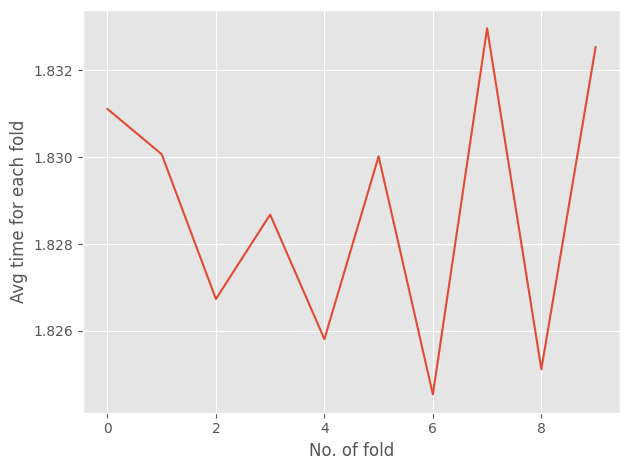

In [176]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [177]:
times_axn_n_n

array([1.83111209, 1.83006956, 1.82673453, 1.828679  , 1.82581079,
       1.83002051, 1.82453686, 1.83296977, 1.82511712, 1.83253544])

In [178]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [179]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

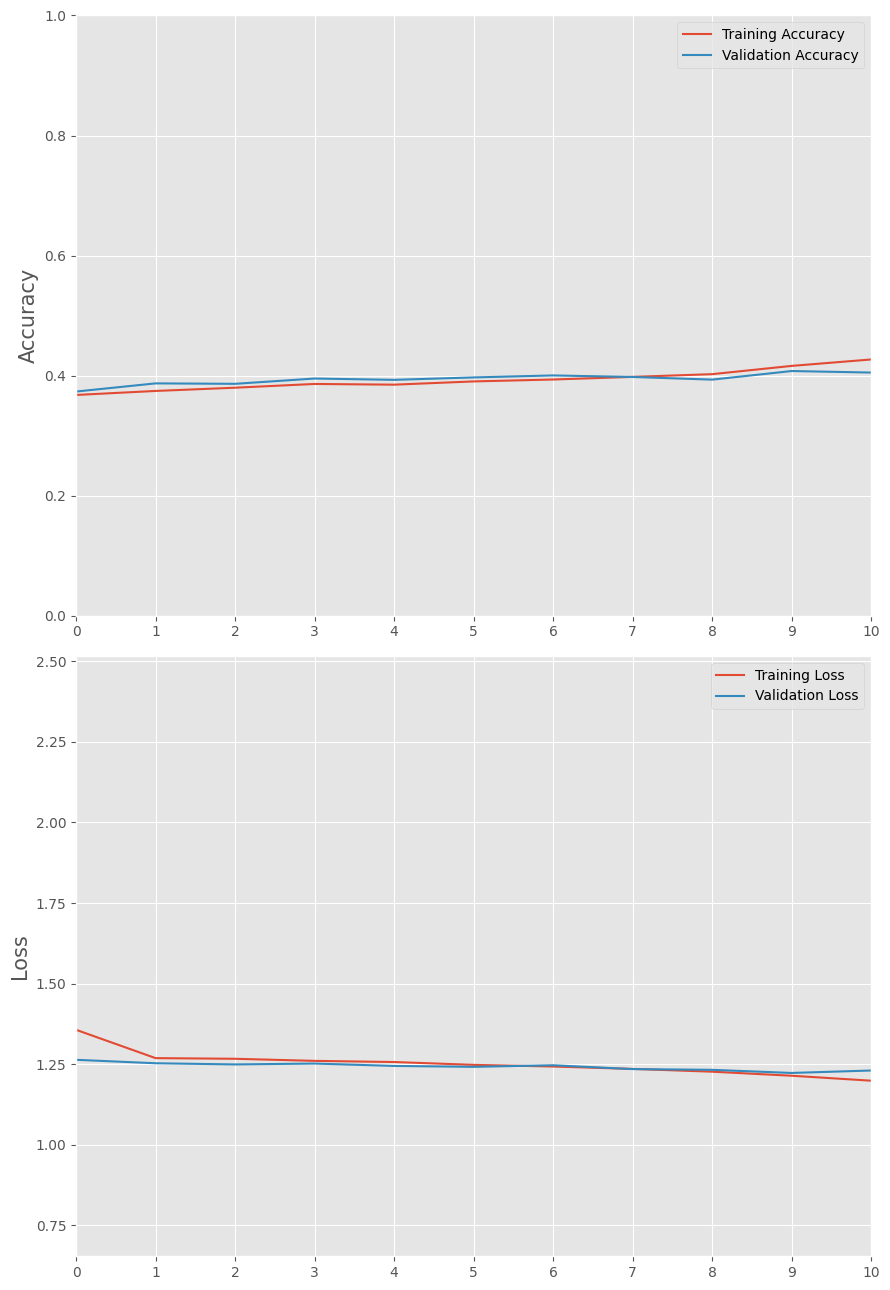

In [180]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [181]:
import gc
gc.collect()

23945

In [182]:
np.array(scores_axn).shape

(10, 302, 4)

In [183]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [184]:
y_pred_axn.shape

(10, 302)

In [185]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_axn[i]))

In [186]:
acc_scores_axn

[0.3841059602649007,
 0.3841059602649007,
 0.4768211920529801,
 0.3841059602649007,
 0.5298013245033113,
 0.3841059602649007,
 0.44370860927152317,
 0.5132450331125827,
 0.3841059602649007,
 0.5]

In [187]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [188]:
y_test_all_n = np.array(y_test_all)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

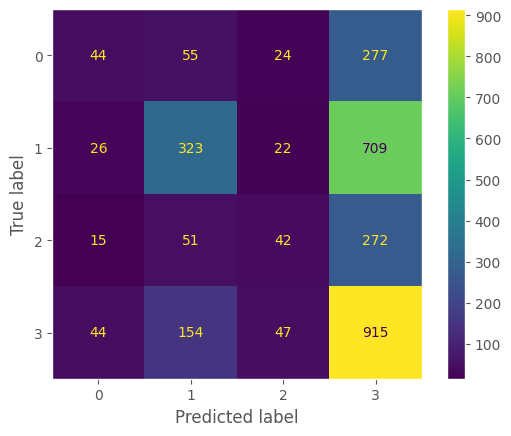

In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [190]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.34      0.11      0.17       400
           1       0.55      0.30      0.39      1080
           2       0.31      0.11      0.16       380
           3       0.42      0.79      0.55      1160

    accuracy                           0.44      3020
   macro avg       0.41      0.33      0.32      3020
weighted avg       0.44      0.44      0.39      3020



# EfficientNetB7

In [191]:
import gc
gc.collect()

6328

In [192]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [193]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 23s 188ms/step - loss: 1.3504 - accuracy: 0.3475 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 159ms/step - loss: 1.3461 - accuracy: 0.3626 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 12s 159ms/step - loss: 1.3446 - accuracy: 0.3614 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 12s 159ms/step - loss: 1.3450 - accuracy: 0.3532 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 12s 159ms/step - loss: 1.3475 - accuracy: 0.3602 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 12s 159ms/step - loss: 1.3511 - accuracy: 0.3618 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3598 - accuracy: 0.3479
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.31 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3598 - accuracy: 0.3479 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3485 - accuracy: 0.3569 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3492 - accuracy: 0.3475 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3481 - accuracy: 0.3483 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3519 - accuracy: 0.3516 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3469 - accuracy: 0.3524
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.31 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3469 - accuracy: 0.3524 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3492 - accuracy: 0.3516 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3413 - accuracy: 0.3532 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3507 - accuracy: 0.3528 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3500 - accuracy: 0.3561 - val_loss: 1.3764 - val_accuracy: 0.2941 - lr: 4.

Epoch 13/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3583 - accuracy: 0.3467 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3664 - accuracy: 0.3414 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3620 - accuracy: 0.3422
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.33 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3620 - accuracy: 0.3422 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3594 - accuracy: 0.3496 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3666 - accuracy: 0.3536 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 4

Epoch 41/100
77/77 [==============================] - 13s 163ms/step - loss: 1.3662 - accuracy: 0.3385 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3679 - accuracy: 0.3455 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3524 - accuracy: 0.3463
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 12.30 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3524 - accuracy: 0.3463 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3637 - accuracy: 0.3385 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3645 - accuracy: 0.3479 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 6.

Epoch 69/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3556 - accuracy: 0.3659 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3616 - accuracy: 0.3520 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3662 - accuracy: 0.3422
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 12.28 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3662 - accuracy: 0.3422 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3694 - accuracy: 0.3377 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3602 - accuracy: 0.3451 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 1

Epoch 97/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3590 - accuracy: 0.3520 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3629 - accuracy: 0.3455 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3695 - accuracy: 0.3430
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 12.31 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3695 - accuracy: 0.3430 - val_loss: 1.3296 - val_accuracy: 0.4191 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 3s 135ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 22s 187ms/step - loss: 1.3286 - accuracy: 0.3528 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 12s 159ms/

Epoch 25/100
77/77 [==============================] - 12s 161ms/step - loss: 1.3364 - accuracy: 0.3483 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3231 - accuracy: 0.3606 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3288 - accuracy: 0.3675 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 12s 161ms/step - loss: 1.3364 - accuracy: 0.3859 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3370 - accuracy: 0.3463
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 12.35 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.3370 - accuracy: 0.3463 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 8

Epoch 53/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3384 - accuracy: 0.3679 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3315 - accuracy: 0.3712 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3356 - accuracy: 0.3749 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3366 - accuracy: 0.3647 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3421 - accuracy: 0.3524
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 12.31 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3421 - accuracy: 0.3524 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 1

Epoch 81/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3447 - accuracy: 0.3585 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3346 - accuracy: 0.3557 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3292 - accuracy: 0.3700 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 12s 160ms/step - loss: 1.3242 - accuracy: 0.3708 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3461 - accuracy: 0.3536
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 12.32 seconds
77/77 [==============================] - 12s 160ms/step - loss: 1.3461 - accuracy: 0.3536 - val_loss: 1.2250 - val_accuracy: 0.4154 - lr: 2.

Epoch 9/100
77/77 [==============================] - 12s 159ms/step - loss: 1.4198 - accuracy: 0.3238 - val_loss: 1.3951 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 12s 159ms/step - loss: 1.4255 - accuracy: 0.3115 - val_loss: 1.3951 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 12s 159ms/step - loss: 1.4187 - accuracy: 0.3123 - val_loss: 1.3951 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 12s 159ms/step - loss: 1.4157 - accuracy: 0.3254 - val_loss: 1.3951 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 12s 159ms/step - loss: 1.4207 - accuracy: 0.3234 - val_loss: 1.3951 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 12s 159ms/step - loss: 1.4239 - accuracy: 0.3185 - val_loss: 1.3951 - val_accuracy: 0.3897 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



77/77 [==============================] - 13s 163ms/step - loss: 1.4638 - accuracy: 0.2453 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4586 - accuracy: 0.2465 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4680 - accuracy: 0.2375 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 13s 166ms/step - loss: 1.4670 - accuracy: 0.2285 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 13s 164ms/step - loss: 1.4735 - accuracy: 0.2343 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.4629 - accuracy: 0.2379
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 12.34 s

Epoch 87/100
77/77 [==============================] - 12s 160ms/step - loss: 1.4625 - accuracy: 0.2330 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 12s 160ms/step - loss: 1.4723 - accuracy: 0.2392 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 12s 161ms/step - loss: 1.4721 - accuracy: 0.2363 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 12s 160ms/step - loss: 1.4689 - accuracy: 0.2240 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 12s 160ms/step - loss: 1.4721 - accuracy: 0.2355 - val_loss: 1.4221 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.4673 - accuracy: 0.2351
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for ep

77/77 [==============================] - ETA: 0s - loss: 1.5987 - accuracy: 0.1795
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 12.41 seconds
77/77 [==============================] - 12s 161ms/step - loss: 1.5987 - accuracy: 0.1795 - val_loss: 1.6552 - val_accuracy: 0.0809 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 12s 161ms/step - loss: 1.6011 - accuracy: 0.1836 - val_loss: 1.6552 - val_accuracy: 0.0809 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5894 - accuracy: 0.1803 - val_loss: 1.6552 - val_accuracy: 0.0809 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5889 - accuracy: 0.1889 - val_loss: 1.6552 - val_accuracy: 0.0809 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 12s 161ms/step - loss: 1.5921 - accuracy: 0.1852 - val_loss: 1.6552 - val_accuracy: 0.0809 - lr: 4.0000e-05
Epo

In [ ]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

In [ ]:
import gc
gc.collect()

In [ ]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [ ]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [ ]:
test_loss_enb7_n

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [ ]:
np.array(scores_enb7).shape

In [ ]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [ ]:
y_pred_enb7.shape

In [ ]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_enb7[i]))

In [ ]:
acc_scores_enb7

In [ ]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [ ]:
y_test_all_n = np.array(y_test_all)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [ ]:
import gc
gc.collect()

In [ ]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

# ResNetV2

In [17]:
import gc
gc.collect()

0

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [19]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [20]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 52ms/step - loss: 1.8692 - accuracy: 0.1738 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8676 - accuracy: 0.1787 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8535 - accuracy: 0.1958 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8638 - accuracy: 0.1913 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8691 - accuracy: 0.1938 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8666 - accuracy: 0.1897 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 3.05 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.8626 - accuracy: 0.1889 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8743 - accuracy: 0.2007 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8593 - accuracy: 0.2003 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8563 - accuracy: 0.1913 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8544 - accuracy: 0.1889 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8750 - accuracy: 0.1954 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8518 - accuracy: 0.1877 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8494 - accuracy: 0.1975 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8480 - accuracy: 0.1922 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8877 - accuracy: 0.1827 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8628 - accuracy: 0.1934 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8723 - accuracy: 0.1868 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 2.5600e-09
Epoch 64/100
77/77 [====================

77/77 [==============================] - 3s 39ms/step - loss: 1.8589 - accuracy: 0.1922 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8719 - accuracy: 0.1926 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8513 - accuracy: 0.2024 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8764 - accuracy: 0.1979 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8757 - accuracy: 0.1877 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8716 - accuracy: 0.1926 - val_loss: 1.7574 - val_accuracy: 0.1654 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] -

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.9079 - accuracy: 0.1455
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.08 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.9079 - accuracy: 0.1455 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9290 - accuracy: 0.1464 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9201 - accuracy: 0.1537 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9037 - accuracy: 0.1533 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9152 - accuracy: 0.1541 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 4.0000e-05
E

77/77 [==============================] - ETA: 0s - loss: 1.9272 - accuracy: 0.1545
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.9272 - accuracy: 0.1545 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8943 - accuracy: 0.1562 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9040 - accuracy: 0.1586 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9054 - accuracy: 0.1648 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9171 - accuracy: 0.1525 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 6.4000e-08
Epoch 48/100
77

77/77 [==============================] - ETA: 0s - loss: 1.9041 - accuracy: 0.1509
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.04 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.9041 - accuracy: 0.1509 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9113 - accuracy: 0.1484 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9229 - accuracy: 0.1488 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9246 - accuracy: 0.1500 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9100 - accuracy: 0.1402 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - ETA: 0s - loss: 1.9153 - accuracy: 0.1472
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.9153 - accuracy: 0.1472 - val_loss: 1.8752 - val_accuracy: 0.1544 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 34ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 47ms/step - loss: 1.9768 - accuracy: 0.3050 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9971 - accuracy: 0.3009 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9712 - accuracy: 0.3099 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9941 - accuracy: 0.3

77/77 [==============================] - 3s 40ms/step - loss: 1.9931 - accuracy: 0.3021 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 2.0129 - accuracy: 0.2948 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 2.0014 - accuracy: 0.2923
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 2.0014 - accuracy: 0.2923 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9890 - accuracy: 0.3005 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 40ms/step - loss: 2.0015 - accuracy: 0.3005 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 39ms/step - loss: 2.0045 - accuracy: 0.3054 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 2.0032 - accuracy: 0.3029 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.9902 - accuracy: 0.3013
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.9902 - accuracy: 0.3013 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9815 - accuracy: 0.3034 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9949 - accuracy: 0.3091 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.9754 - accuracy: 0.3029 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9814 - accuracy: 0.2984 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 2.0039 - accuracy: 0.2984
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.04 seconds
77/77 [==============================] - 3s 40ms/step - loss: 2.0039 - accuracy: 0.2984 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9946 - accuracy: 0.2952 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9943 - accuracy: 0.2993 - val_loss: 1.8256 - val_accuracy: 0.3309 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 40ms/step - loss: 1.6656 - accuracy: 0.2298 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6560 - accuracy: 0.2302 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6627 - accuracy: 0.2396 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6690 - accuracy: 0.2339 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.6550 - accuracy: 0.2535
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.6550 - accuracy: 0.2535 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 3s 40ms/step - loss: 1.6598 - accuracy: 0.2441 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6678 - accuracy: 0.2330 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6573 - accuracy: 0.2388 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6653 - accuracy: 0.2367 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.6583 - accuracy: 0.2371
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.6583 - accuracy: 0.2371 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 41ms/step - loss: 1.6510 - accuracy: 0.2482 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6494 - accuracy: 0.2445 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 3s 39ms/step - loss: 1.6660 - accuracy: 0.2453 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6566 - accuracy: 0.2428 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.6531 - accuracy: 0.2510
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.6531 - accuracy: 0.2510 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.6610 - accuracy: 0.2416 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6636 - accuracy: 0.2424 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6731 - accuracy: 0.2379 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: 1.6536 - accuracy: 0.2461 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.6709 - accuracy: 0.2347
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.03 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.6709 - accuracy: 0.2347 - val_loss: 1.5950 - val_accuracy: 0.2316 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 3s 39ms/step - loss: 1.8494 - accuracy: 0.3769 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8520 - accuracy: 0.3688 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8622 - accuracy: 0.3757 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8547 - accuracy: 0.3798 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8637 - accuracy: 0.3733 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8593 - accuracy: 0.3782 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] -

77/77 [==============================] - 3s 40ms/step - loss: 1.8630 - accuracy: 0.3749 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8536 - accuracy: 0.3790 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8603 - accuracy: 0.3782 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8550 - accuracy: 0.3769 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8661 - accuracy: 0.3716 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8627 - accuracy: 0.3667 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] -

77/77 [==============================] - 3s 40ms/step - loss: 1.8580 - accuracy: 0.3733 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 3s 41ms/step - loss: 1.8538 - accuracy: 0.3757 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 3s 41ms/step - loss: 1.8517 - accuracy: 0.3757 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8459 - accuracy: 0.3737 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8473 - accuracy: 0.3814 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8501 - accuracy: 0.3765 - val_loss: 1.8483 - val_accuracy: 0.3750 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] -

77/77 [==============================] - 3s 40ms/step - loss: 1.8005 - accuracy: 0.1868 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.7989 - accuracy: 0.1868
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.04 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.7989 - accuracy: 0.1868 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7998 - accuracy: 0.1713 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8111 - accuracy: 0.1738 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8067 - accuracy: 0.1827 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 3s 39ms/step - loss: 1.7989 - accuracy: 0.1872 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.8035 - accuracy: 0.1836
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.05 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.8035 - accuracy: 0.1836 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7980 - accuracy: 0.1762 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7786 - accuracy: 0.1803 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8025 - accuracy: 0.1774 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 3.2000e-07
Epoch 40/100
77

77/77 [==============================] - 3s 40ms/step - loss: 1.8071 - accuracy: 0.1885 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.8082 - accuracy: 0.1872
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.05 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.8082 - accuracy: 0.1872 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8010 - accuracy: 0.1917 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7786 - accuracy: 0.1950 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8109 - accuracy: 0.1807 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 3s 39ms/step - loss: 1.8100 - accuracy: 0.1807 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.8108 - accuracy: 0.1819
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.8108 - accuracy: 0.1819 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8120 - accuracy: 0.1815 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8002 - accuracy: 0.1840 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8130 - accuracy: 0.1758 - val_loss: 1.7710 - val_accuracy: 0.1875 - lr: 8.1920e-13
Epoch 96/100
77

77/77 [==============================] - 3s 39ms/step - loss: 2.1301 - accuracy: 0.1533 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1251 - accuracy: 0.1680 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1503 - accuracy: 0.1582 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 2.1404 - accuracy: 0.1447
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.1404 - accuracy: 0.1447 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1318 - accuracy: 0.1509 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 3s 39ms/step - loss: 2.1279 - accuracy: 0.1488 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1412 - accuracy: 0.1468 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1348 - accuracy: 0.1504 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 2.1358 - accuracy: 0.1427
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.1358 - accuracy: 0.1427 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1375 - accuracy: 0.1558 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 1.2800e-08
Epoch 52/100
7

77/77 [==============================] - 3s 39ms/step - loss: 2.1532 - accuracy: 0.1451 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1492 - accuracy: 0.1513 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1503 - accuracy: 0.1480 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 2.1499 - accuracy: 0.1521
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.02 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.1499 - accuracy: 0.1521 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1370 - accuracy: 0.1545 - val_loss: 2.0412 - val_accuracy: 0.1471 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4507 - accuracy: 0.3557 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4707 - accuracy: 0.3536 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4628 - accuracy: 0.3446 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4495 - accuracy: 0.3536 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4464 - accuracy: 0.3602 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.4652 - accuracy: 0.3422
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.03 seconds
77/77 [=========

77/77 [==============================] - 3s 40ms/step - loss: 1.4384 - accuracy: 0.3712 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4484 - accuracy: 0.3598 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4661 - accuracy: 0.3455 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4535 - accuracy: 0.3467 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4535 - accuracy: 0.3602 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.4537 - accuracy: 0.3536
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 3.07 seconds
77

77/77 [==============================] - 3s 40ms/step - loss: 1.4469 - accuracy: 0.3479 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4560 - accuracy: 0.3606 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4573 - accuracy: 0.3475 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4506 - accuracy: 0.3610 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4454 - accuracy: 0.3655 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.4424 - accuracy: 0.3573
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.07 seconds
77/7

77/77 [==============================] - 3s 40ms/step - loss: 1.4431 - accuracy: 0.3635 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4484 - accuracy: 0.3508 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4642 - accuracy: 0.3614 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 3s 40ms/step - loss: 1.4652 - accuracy: 0.3557 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 3s 39ms/step - loss: 1.4404 - accuracy: 0.3528 - val_loss: 1.3615 - val_accuracy: 0.3566 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.4417 - accuracy: 0.3549
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 3.10 seconds
77

Time taken for epoch 15: 3.04 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.9034 - accuracy: 0.1872 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8979 - accuracy: 0.1827 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 40ms/step - loss: 1.8972 - accuracy: 0.1881 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9031 - accuracy: 0.1823 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8784 - accuracy: 0.1860 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9017 - accuracy: 0.1901 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9005 - accuracy: 0.1791 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8806 - accuracy: 0.1926 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9062 - accuracy: 0.1701 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8669 - accuracy: 0.1856 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8914 - accuracy: 0.1881 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8823 - accuracy: 0.1819 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 6.4000e-08
Epoch 50/100
77/77 [====================

77/77 [==============================] - 3s 39ms/step - loss: 1.9027 - accuracy: 0.1856 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9049 - accuracy: 0.1774 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8970 - accuracy: 0.1856 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9077 - accuracy: 0.1811 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8878 - accuracy: 0.1934 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9024 - accuracy: 0.1791 - val_loss: 1.8287 - val_accuracy: 0.1324 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] -

10/10 [==============================] - 1s 33ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 5s 45ms/step - loss: 2.1883 - accuracy: 0.1378 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 38ms/step - loss: 2.1723 - accuracy: 0.1455 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1824 - accuracy: 0.1431 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1932 - accuracy: 0.1353 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1585 - accuracy: 0.1521 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2003 - accuracy: 0.1386 - val_loss: 2.1403 - val_accuracy: 0.1176 - l

Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 2.1910 - accuracy: 0.1345
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 2.97 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.1910 - accuracy: 0.1345 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1723 - accuracy: 0.1476 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1807 - accuracy: 0.1419 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1865 - accuracy: 0.1357 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1657 - accuracy: 0.1439 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 1.6000e-06
E

77/77 [==============================] - ETA: 0s - loss: 2.1777 - accuracy: 0.1455
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.1777 - accuracy: 0.1455 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1718 - accuracy: 0.1410 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1635 - accuracy: 0.1484 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1695 - accuracy: 0.1435 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1748 - accuracy: 0.1419 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 2.5600e-09
Epoch 62/100
7

77/77 [==============================] - ETA: 0s - loss: 2.1728 - accuracy: 0.1476
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.98 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.1728 - accuracy: 0.1476 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1599 - accuracy: 0.1423 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1700 - accuracy: 0.1451 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1875 - accuracy: 0.1480 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 3s 39ms/step - loss: 2.1718 - accuracy: 0.1504 - val_loss: 2.1403 - val_accuracy: 0.1176 - lr: 4.0960e-12
Epoch 90/100
77

In [21]:
import gc
gc.collect()

0

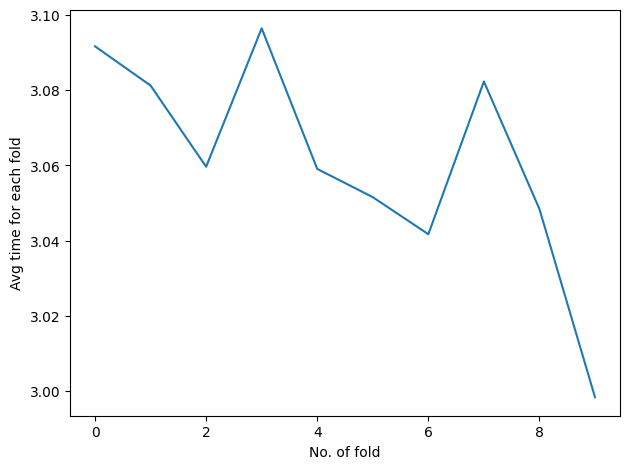

In [22]:
import matplotlib.pyplot as plt

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

In [23]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [24]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [25]:
train_acc_rnv2_n

0     0.225143
1     0.226370
2     0.229926
3     0.223753
4     0.226697
        ...   
95    0.227351
96    0.227065
97    0.227841
98    0.229191
99    0.226165
Name: 0, Length: 100, dtype: float64

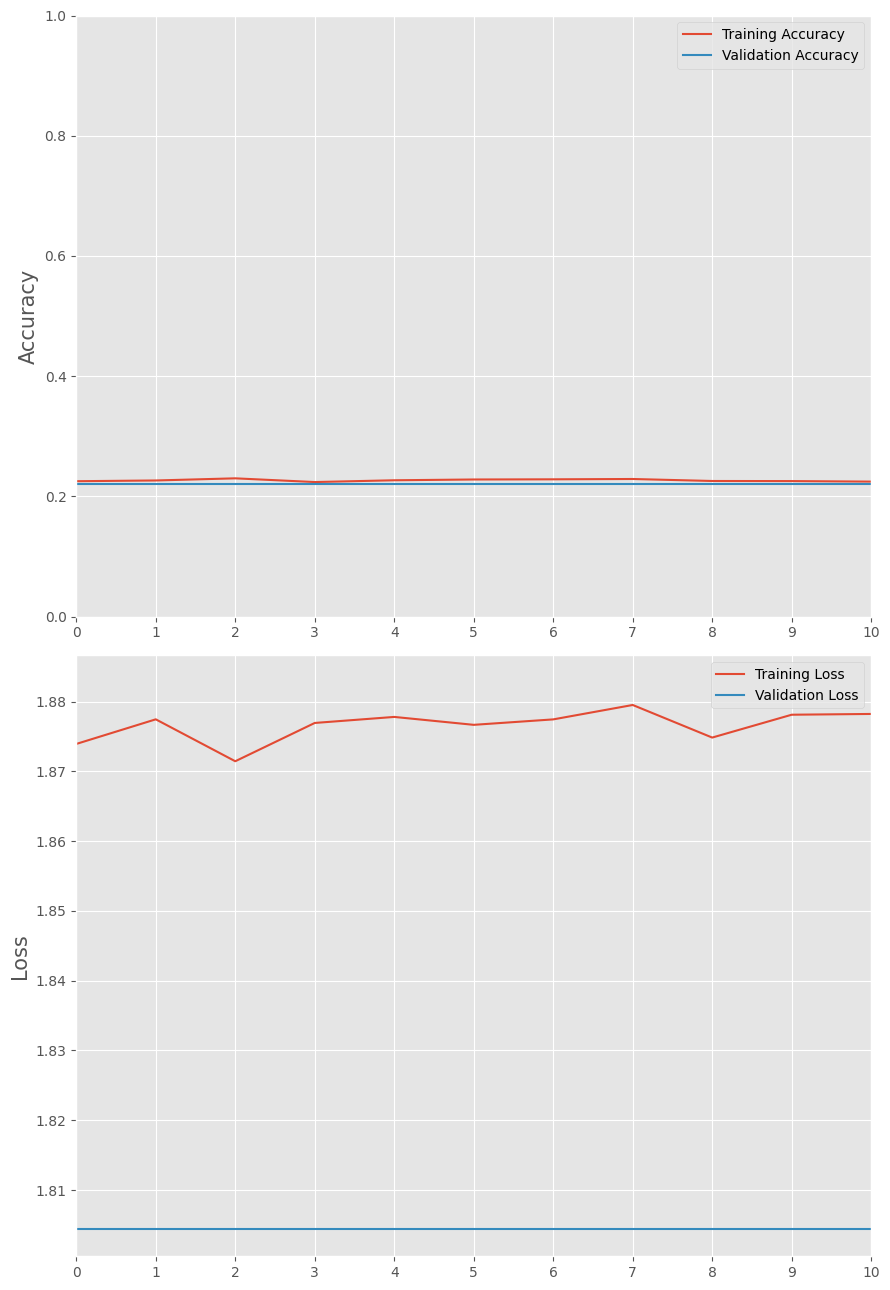

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [27]:
np.array(scores_rnv2).shape

(10, 302, 4)

In [28]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [29]:
y_pred_rnv2.shape

(10, 302)

In [30]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_rnv2[i]))

In [31]:
import gc
gc.collect()

3217

In [32]:
acc_scores_rnv2

[0.2119205298013245,
 0.12582781456953643,
 0.31456953642384106,
 0.23841059602649006,
 0.38741721854304634,
 0.18211920529801323,
 0.1490066225165563,
 0.347682119205298,
 0.16225165562913907,
 0.11920529801324503]

In [33]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [34]:
y_test_all_n = np.array(y_test_all)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

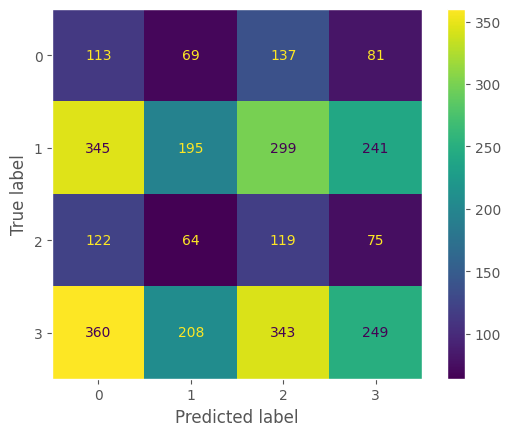

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [36]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.12      0.28      0.17       400
           1       0.36      0.18      0.24      1080
           2       0.13      0.31      0.19       380
           3       0.39      0.21      0.28      1160

    accuracy                           0.22      3020
   macro avg       0.25      0.25      0.22      3020
weighted avg       0.31      0.22      0.24      3020



# VGG16

In [37]:
import gc
gc.collect()

15

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [39]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [40]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 90ms/step - loss: 1.4140 - accuracy: 0.3173 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3984 - accuracy: 0.3291 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4138 - accuracy: 0.3177 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4247 - accuracy: 0.3083 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4113 - accuracy: 0.3213 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4157 - accuracy: 0.3283 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 4.35 seconds
77/77 [==============================] - 4s 57ms/step - loss: 1.4099 - accuracy: 0.3250 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4018 - accuracy: 0.3132 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4089 - accuracy: 0.3197 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4126 - accuracy: 0.3140 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4046 - accuracy: 0.3168 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4061 - accuracy: 0.3316 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4043 - accuracy: 0.3279 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4167 - accuracy: 0.3111 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4113 - accuracy: 0.3246 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4070 - accuracy: 0.3205 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4121 - accuracy: 0.3181 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4033 - accuracy: 0.3287 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

77/77 [==============================] - 4s 56ms/step - loss: 1.4016 - accuracy: 0.3369 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4220 - accuracy: 0.3185 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4083 - accuracy: 0.3205 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4099 - accuracy: 0.3287 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3978 - accuracy: 0.3348 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4163 - accuracy: 0.3083 - val_loss: 1.3378 - val_accuracy: 0.4301 - lr: 4.0960e-12
Epoch 92/100
76/77 [============================>.] -

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.4826 - accuracy: 0.3331
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.33 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.4834 - accuracy: 0.3328 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4909 - accuracy: 0.3352 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4883 - accuracy: 0.3271 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4931 - accuracy: 0.3320 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4970 - accuracy: 0.3312 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.4884 - accuracy: 0.3224
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.33 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.4890 - accuracy: 0.3217 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 4s 57ms/step - loss: 1.4908 - accuracy: 0.3230 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4858 - accuracy: 0.3234 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4935 - accuracy: 0.3365 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4885 - accuracy: 0.3357 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 6.4000e-08
Epoch 48/100
77

76/77 [============================>.] - ETA: 0s - loss: 1.4898 - accuracy: 0.3141
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.30 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.4907 - accuracy: 0.3132 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4873 - accuracy: 0.3352 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4897 - accuracy: 0.3279 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4915 - accuracy: 0.3275 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4840 - accuracy: 0.3226 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 1.0240e-10
Epoch 76/100
7

76/77 [============================>.] - ETA: 0s - loss: 1.4970 - accuracy: 0.3257
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.4960 - accuracy: 0.3258 - val_loss: 1.4986 - val_accuracy: 0.3787 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 48ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 5s 58ms/step - loss: 1.8267 - accuracy: 0.1435 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8145 - accuracy: 0.1513 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8142 - accuracy: 0.1517 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8185 - accuracy: 0.1

77/77 [==============================] - 4s 56ms/step - loss: 1.8115 - accuracy: 0.1468 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8030 - accuracy: 0.1586 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.8165 - accuracy: 0.1546
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.33 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8153 - accuracy: 0.1541 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8139 - accuracy: 0.1582 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8158 - accuracy: 0.1533 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 4s 56ms/step - loss: 1.8132 - accuracy: 0.1484 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8153 - accuracy: 0.1513 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.8161 - accuracy: 0.1382
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 4.34 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8179 - accuracy: 0.1382 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8084 - accuracy: 0.1549 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8061 - accuracy: 0.1521 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 60/100
7

77/77 [==============================] - 4s 56ms/step - loss: 1.8143 - accuracy: 0.1455 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8167 - accuracy: 0.1480 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.8194 - accuracy: 0.1509
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 4.32 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8198 - accuracy: 0.1509 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8026 - accuracy: 0.1562 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 56ms/step - loss: 1.7913 - accuracy: 0.1504 - val_loss: 1.7508 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 4s 56ms/step - loss: 1.7989 - accuracy: 0.2764 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8111 - accuracy: 0.2780 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8194 - accuracy: 0.2612 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8213 - accuracy: 0.2674 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.8221 - accuracy: 0.2738
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 4.27 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8226 - accuracy: 0.2735 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 2.0000e-04
Epoch 16/100
7

77/77 [==============================] - 4s 56ms/step - loss: 1.8092 - accuracy: 0.2592 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8118 - accuracy: 0.2604 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8190 - accuracy: 0.2547 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 4s 56ms/step - loss: 1.8210 - accuracy: 0.2625 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.8058 - accuracy: 0.2611
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.31 seconds
77/77 [==============================] - 4s 56ms/step - loss: 1.8065 - accuracy: 0.2600 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 4s 55ms/step - loss: 1.8151 - accuracy: 0.2608 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 4s 55ms/step - loss: 1.8101 - accuracy: 0.2584 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 4s 55ms/step - loss: 1.8081 - accuracy: 0.2727 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 4s 55ms/step - loss: 1.8175 - accuracy: 0.2702 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.8012 - accuracy: 0.2792
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 4.24 seconds
77/77 [==============================] - 4s 55ms/step - loss: 1.8012 - accuracy: 0.2792 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 5.1200e-10
Epoch 72/100
7

77/77 [==============================] - 4s 55ms/step - loss: 1.8069 - accuracy: 0.2678 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 4s 55ms/step - loss: 1.8043 - accuracy: 0.2850 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 4s 55ms/step - loss: 1.8187 - accuracy: 0.2567 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 4s 55ms/step - loss: 1.8142 - accuracy: 0.2702 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 1.8068 - accuracy: 0.2763
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 4.26 seconds
77/77 [==============================] - 4s 55ms/step - loss: 1.8049 - accuracy: 0.2768 - val_loss: 1.8365 - val_accuracy: 0.2978 - lr: 8.1920e-13
Epoch 100/100


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
import gc
gc.collect()

In [42]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [43]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [44]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

In [45]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [46]:
np.array(scores_vgg16).shape

In [47]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [48]:
y_pred_vgg16.shape

In [49]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_vgg16[i]))

In [50]:
acc_scores_vgg16

In [51]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [52]:
y_test_all_n = np.array(y_test_all)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [54]:
import gc
gc.collect()

In [55]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

# VGG19

In [56]:
import gc
gc.collect()

In [57]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [58]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [59]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

Time taken for epoch 84: 5.10 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.9030 - accuracy: 0.1267 - val_loss: 1.8259 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.9124 - accuracy: 0.1283
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.14 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.9124 - accuracy: 0.1280 - val_loss: 1.8259 - val_accuracy: 0.1507 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 5s 68ms/step - loss: 1.8995 - accuracy: 0.1345 - val_loss: 1.8259 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 5s 68ms/step - loss: 1.8999 - accuracy: 0.1276 - val_loss: 1.8259 - val_accuracy: 0.1507 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 5s 69ms/step - loss: 1.9285 - accuracy: 0.1226 - val_loss: 1.8259 - val_accuracy: 0

Epoch 13/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8771 - accuracy: 0.3500 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8863 - accuracy: 0.3508 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.8815 - accuracy: 0.3524
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 5.08 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.8848 - accuracy: 0.3512 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8867 - accuracy: 0.3504 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8816 - accuracy: 0.3508 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 4.0000e-05
E

77/77 [==============================] - 5s 66ms/step - loss: 1.8929 - accuracy: 0.3545 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8888 - accuracy: 0.3524 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 1.9026 - accuracy: 0.3507
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.08 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.8996 - accuracy: 0.3524 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8812 - accuracy: 0.3508 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8951 - accuracy: 0.3491 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 6.4000e-08
Epoch 46/100
77

77/77 [==============================] - 5s 67ms/step - loss: 1.8805 - accuracy: 0.3512 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 5s 67ms/step - loss: 1.8985 - accuracy: 0.3500 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 5.1200e-10
Epoch 71/100
76/77 [============================>.] - ETA: 0s - loss: 1.8969 - accuracy: 0.3507
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 5.12 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.8968 - accuracy: 0.3508 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8703 - accuracy: 0.3516 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8677 - accuracy: 0.3508 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 74/100
7

77/77 [==============================] - 5s 66ms/step - loss: 1.8739 - accuracy: 0.3508 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 5s 66ms/step - loss: 1.8750 - accuracy: 0.3516 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 1.8859 - accuracy: 0.3516
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.12 seconds
77/77 [==============================] - 5s 67ms/step - loss: 1.8810 - accuracy: 0.3536 - val_loss: 1.7300 - val_accuracy: 0.3934 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 1s 59ms/step
Training on fold 9/10...
Epoch 1/100
77/77 [==============================] - 6s 68ms/step - loss: 1.6632 - accuracy: 0.1341 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6457 - acc

77/77 [==============================] - 5s 65ms/step - loss: 1.6473 - accuracy: 0.1394 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 5s 65ms/step - loss: 1.6471 - accuracy: 0.1370 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6406 - accuracy: 0.1402 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6407 - accuracy: 0.1382 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.6511 - accuracy: 0.1349
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.08 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.6514 - accuracy: 0.1349 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 8.0000e-06
Epoch 30/100
7

77/77 [==============================] - 5s 66ms/step - loss: 1.6486 - accuracy: 0.1382 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6419 - accuracy: 0.1390 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6466 - accuracy: 0.1349 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 5s 66ms/step - loss: 1.6526 - accuracy: 0.1349 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 1.6411 - accuracy: 0.1332
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 5.09 seconds
77/77 [==============================] - 5s 66ms/step - loss: 1.6403 - accuracy: 0.1333 - val_loss: 1.6395 - val_accuracy: 0.0993 - lr: 1.2800e-08
Epoch 58/100
4

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
times_vgg19

In [61]:
import gc
gc.collect()

In [62]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

In [63]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [64]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

In [65]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [66]:
np.array(scores_vgg19).shape

In [67]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [68]:
y_pred_vgg19.shape

In [69]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all[i],y_pred = y_pred_vgg19[i]))

In [70]:
acc_scores_vgg19

In [71]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [72]:
y_test_all_n = np.array(y_test_all)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [73]:
import gc
gc.collect()

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [75]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

#  Performance Metrics

## accuracy_score Metrics

In [76]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

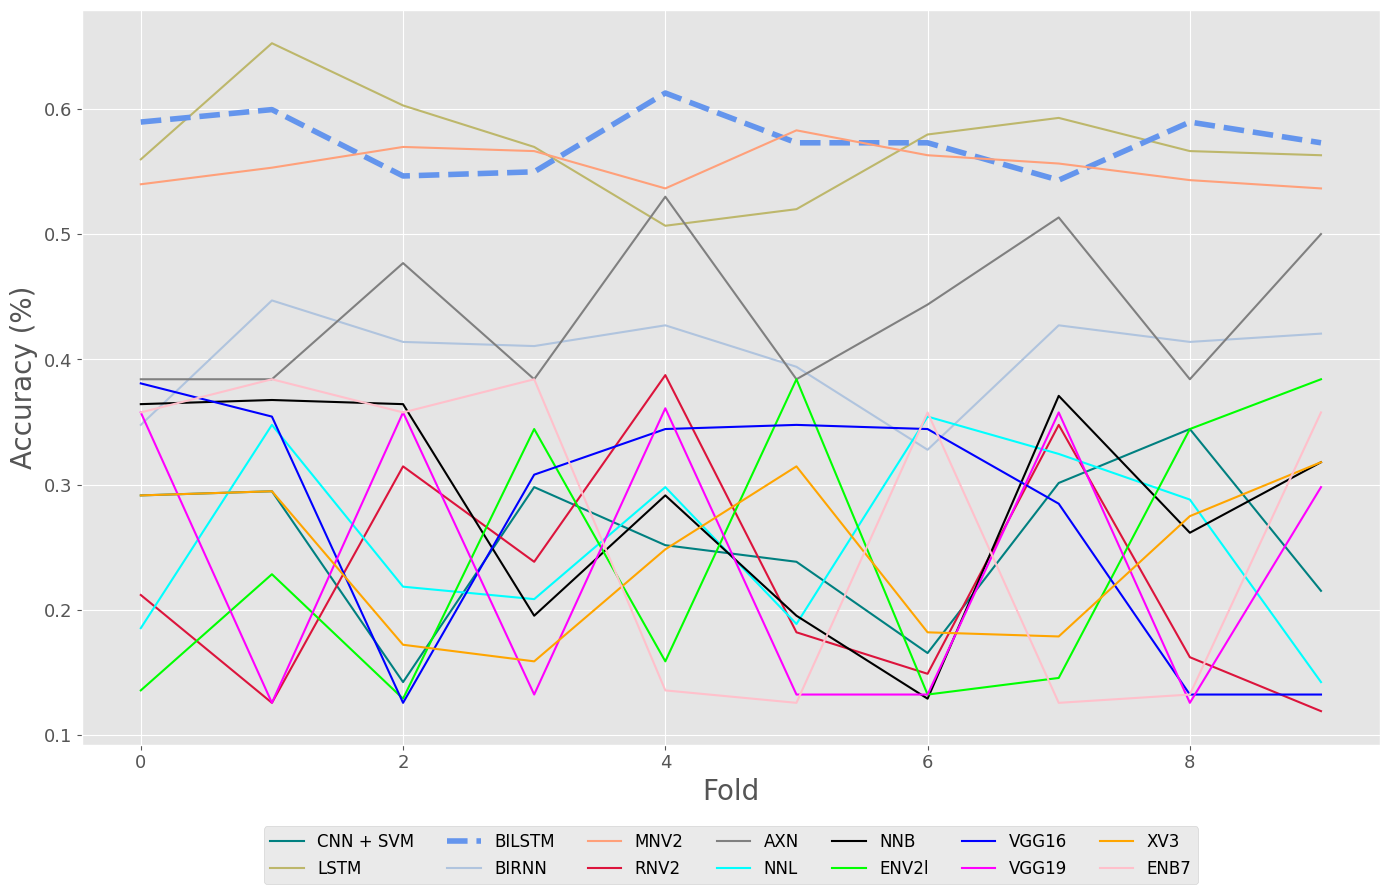

In [86]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [95]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [96]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1400x900 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


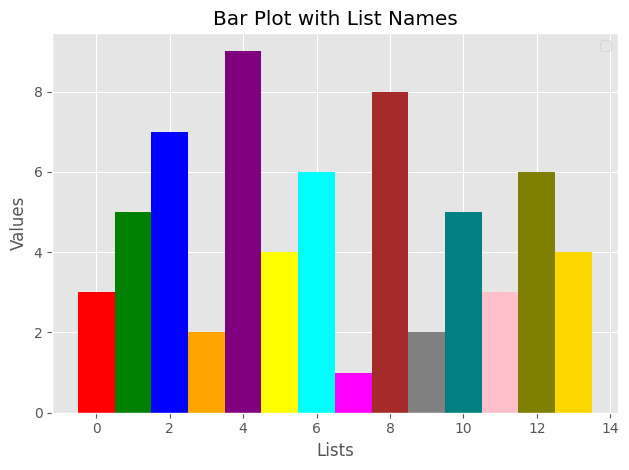

In [114]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [81]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

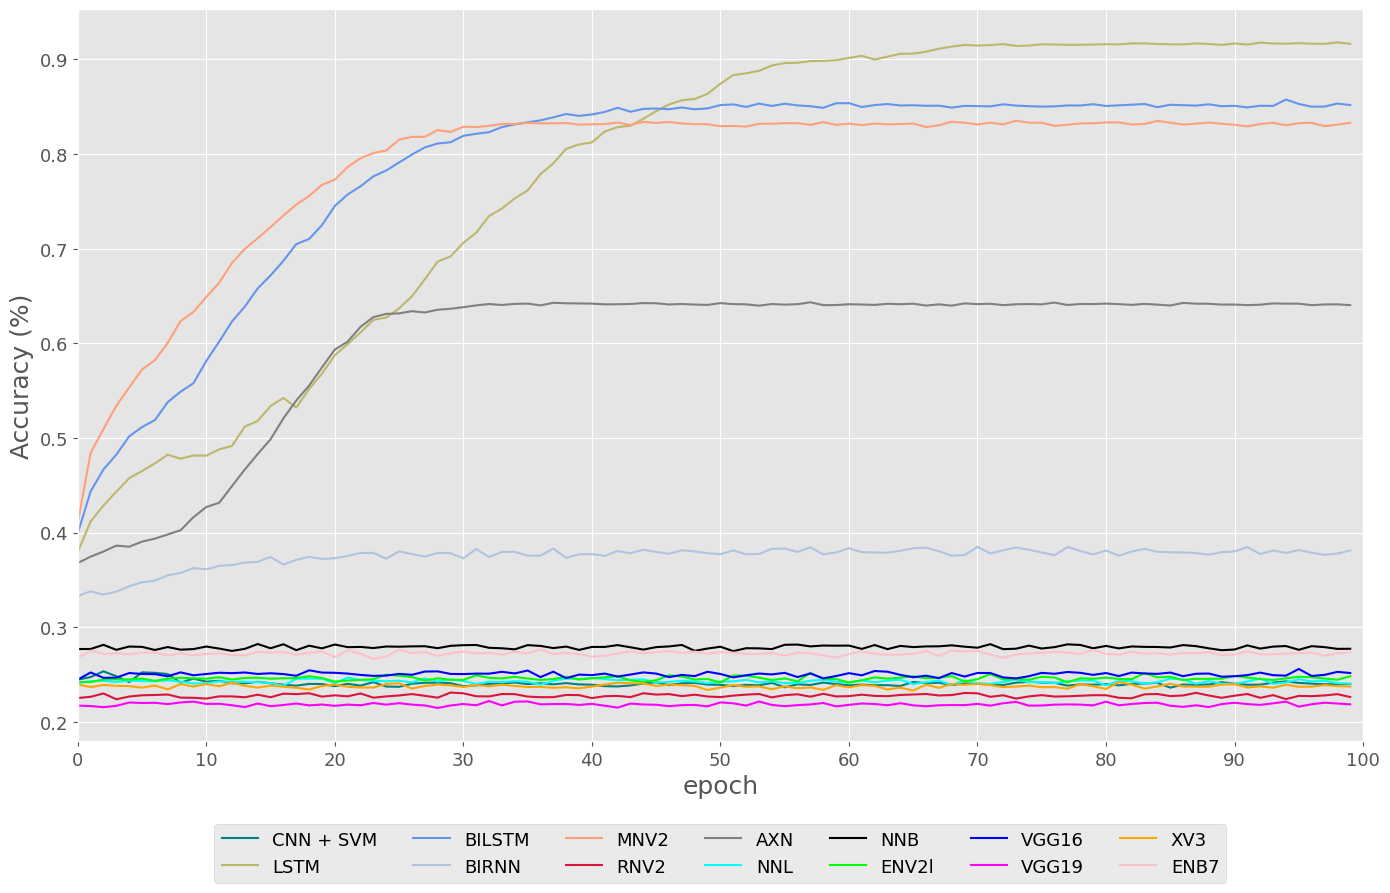

In [82]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

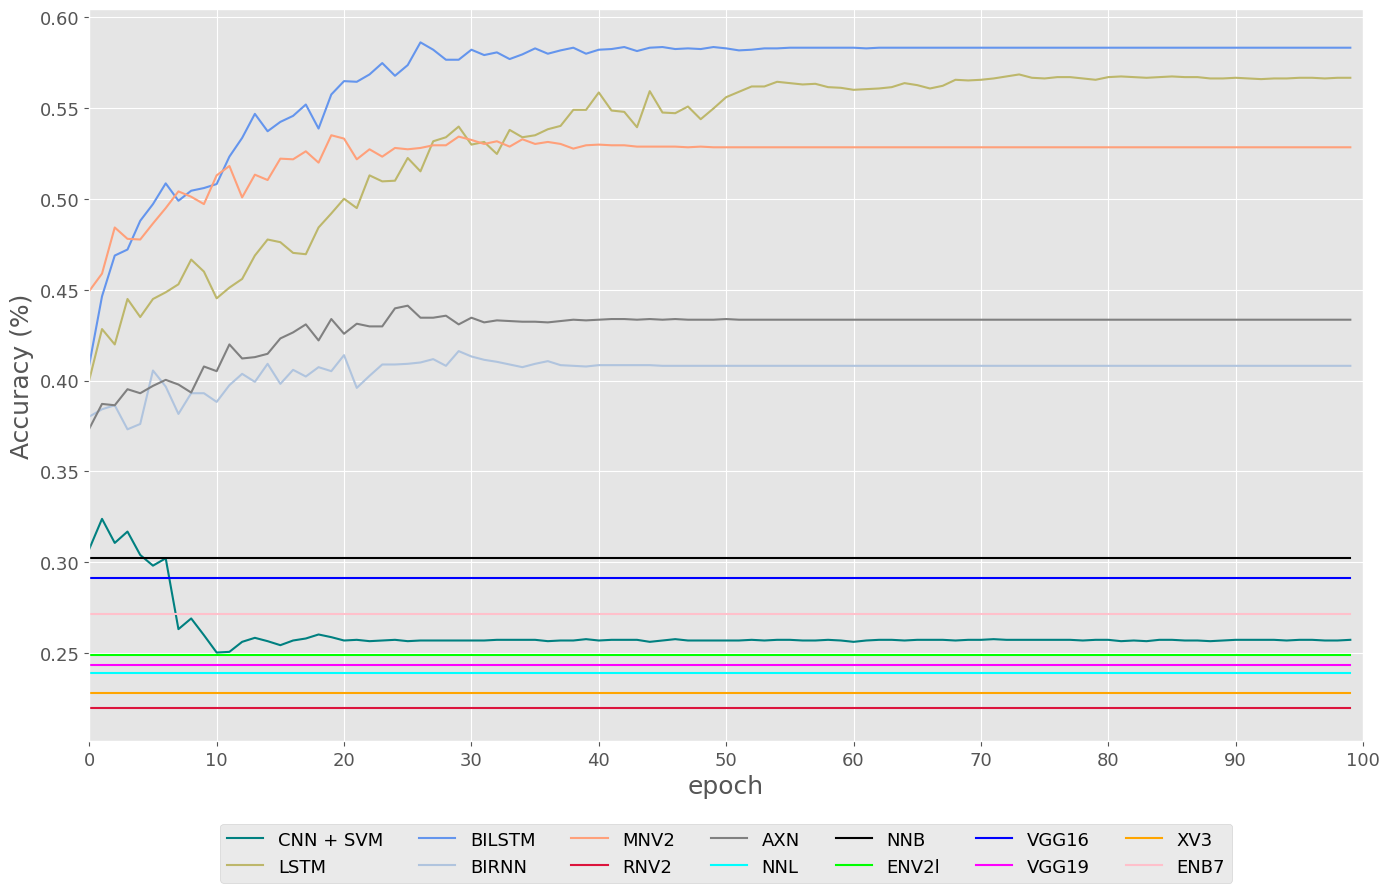

In [83]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

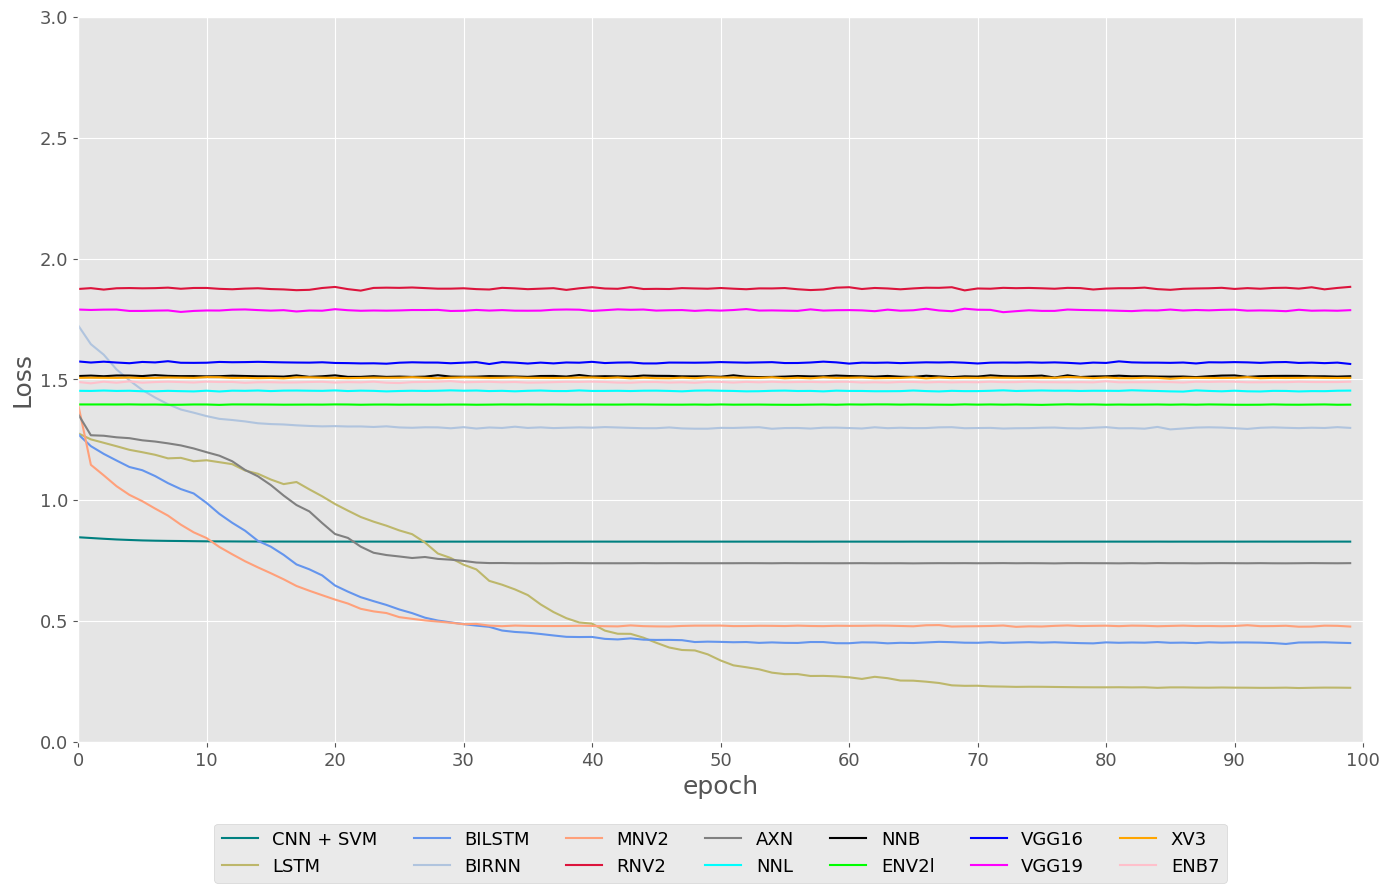

In [84]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

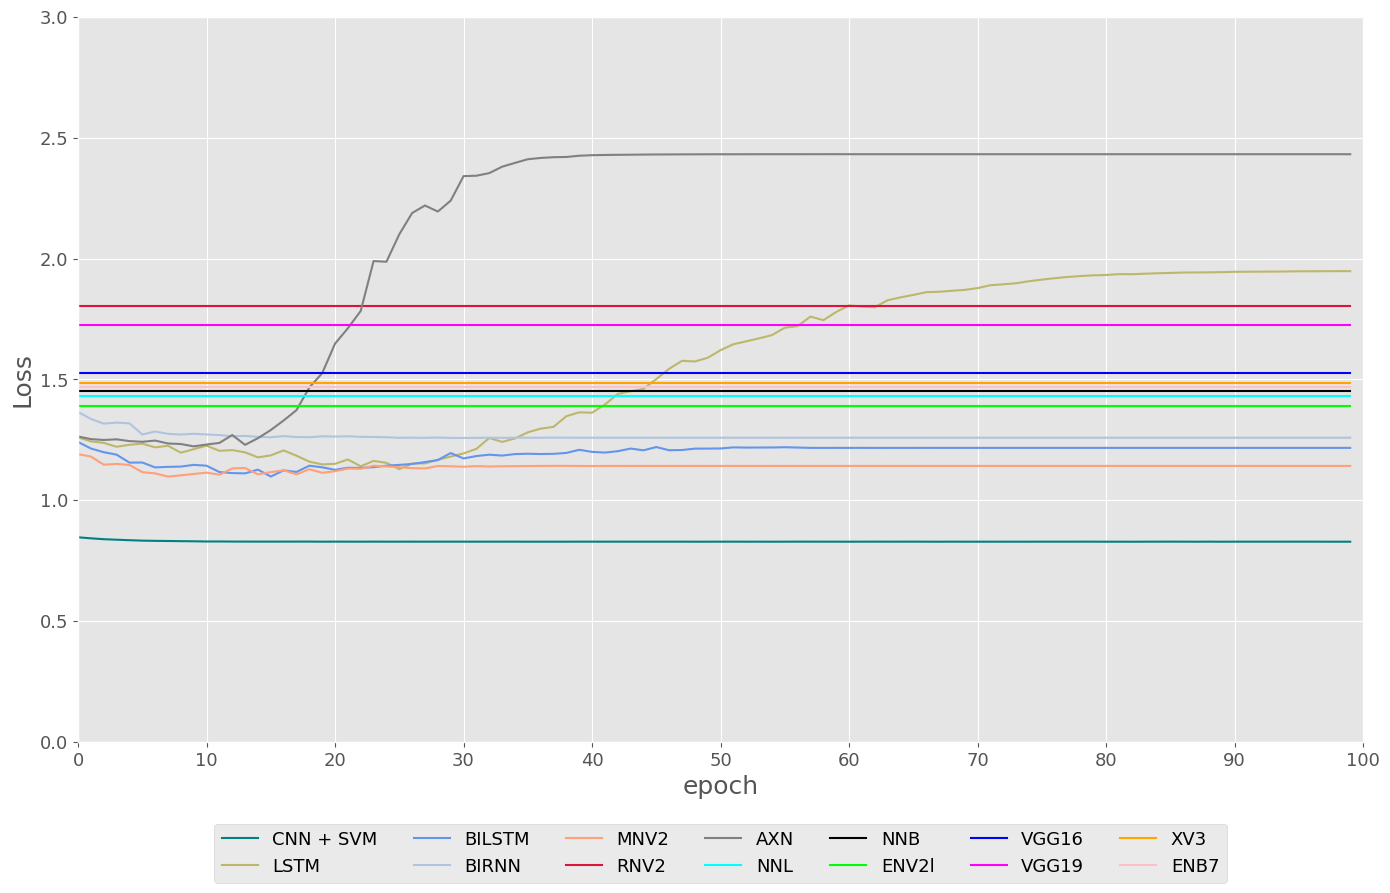

In [85]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()